In [58]:
#install.packages("corrplot", repos = "https://cloud.r-project.org/")
library(party)
library(corrplot)
library (ggplot2)
library (reshape2)
library (scales)

In [59]:
dataset=read.csv("dataset.csv",sep=";");str(dataset)
dic_dat=read.csv("var_type.csv",sep=";");str(dic_dat)

'data.frame':	55002 obs. of  35 variables:
 $ id                : int  1 2 3 4 5 6 7 8 9 10 ...
 $ dataset           : Factor w/ 2 levels "test","train": 2 2 2 2 2 2 2 2 2 2 ...
 $ fech_exped        : Factor w/ 4024 levels "1/02/2007","1/02/2008",..: 3344 1133 3808 1839 606 2360 741 1805 359 775 ...
 $ cancelacion       : Factor w/ 40 levels "","AMPARADA- NO LE HAN ENTREGADO LA TARJETA",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ gestionable       : Factor w/ 6 levels "","Gestionable",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ retencion         : Factor w/ 6 levels "","Efectiva",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ tipo_tarj         : Factor w/ 3 levels "","AMPARO","CUPO": 1 1 1 1 1 1 1 1 1 1 ...
 $ fech_intenc_cancel: int  NA NA NA NA NA NA NA NA NA NA ...
 $ TARGET            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ fech_proceso      : Factor w/ 16 levels "1/01/2017","1/02/2017",..: 7 7 7 7 7 7 7 7 7 7 ...
 $ disp_avan         : num  1050000 1180000 150000 680000 3307500 ...
 $ lim_avances       : num  1050000 1180000 15

In [60]:
dataset$fech_exped=strptime(dataset$fech_exped, "%d/%m/%Y")
#dataset$fech_intenc_cancel=strptime(as.character(dataset$fech_intenc_cancel), "%Y%m")
dataset$fech_proceso=strptime(dataset$fech_proceso, "%d/%m/%Y")
dataset$TARGET=factor(dataset$TARGET)
dataset$tip_contrato=factor(dataset$tip_contrato, labels=c("Fijo","Indefinido","Prestación de servicios","Independiente"))
dataset$cuota_monetaria=factor(dataset$cuota_monetaria)

dataset$cuota_monetaria=factor(dataset$cuota_monetaria)
dataset$sub_vivenda=factor(dataset$sub_vivenda)
dataset$bono_lonchera=factor(dataset$bono_lonchera)
dataset$estrato=factor(dataset$estrato)

X_dic_dat=dic_dat[(dic_dat$procesar==1),1:6]
X_train=dataset[dataset$dataset=="train",dic_dat$procesar==1]
y_train=dataset$TARGET[dataset$dataset=="train"]
X_test=dataset[dataset$dataset=="test",dic_dat$procesar==1]

In [61]:
str(X_train)

'data.frame':	50001 obs. of  27 variables:
 $ fech_exped     : POSIXlt, format: "2006-11-04" "2007-08-17" ...
 $ fech_proceso   : POSIXlt, format: "2018-04-01" "2018-04-01" ...
 $ disp_avan      : num  1050000 1180000 150000 680000 3307500 ...
 $ lim_avances    : num  1050000 1180000 150000 680000 3307500 ...
 $ tot_intereses  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ sald_ms_nt     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ pg_ms_nt       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ cons_ms_nt     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ dias_mora      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ cup_lim        : num  2625000 2950000 500000 1700000 6615000 ...
 $ pag_ms_nt      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ pag_min        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ val_mora       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ val_cuot_man   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ sald_disp      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ cuota_monetaria: Factor w/ 2 levels "0","1": 1 1 2 1 1 2 2 2 2 2 ...
 $ sub_vivenda    : Factor w/ 2 levels "0","1": 1 1 1 1 1 1

In [62]:
head(X_train)

,fech_exped,fech_proceso,disp_avan,lim_avances,tot_intereses,sald_ms_nt,pg_ms_nt,cons_ms_nt,dias_mora,cup_lim,...,bono_lonchera,cat_afil,seg_pobl,edad,nivel_educativo,estado_civil,genero,pers_a_cargo,tip_contrato,estrato
1,2006-11-04,2018-04-01,1050000,1050000,0,0,0,0,0,2625000,...,0,B,Segmento_Medio,31,tecnico_tecnologico,soltero,F,1,Independiente,NA
2,2007-08-17,2018-04-01,1180000,1180000,0,0,0,0,0,2950000,...,0,C,Segmento_Medio,38,tecnico_tecnologico,soltero,M,1,Fijo,NA
3,2008-05-08,2018-04-01,150000,150000,0,0,0,0,0,5e+05,...,1,A,Segemnto_Basico,42,primaria,soltero,M,3,Prestación de servicios,NA
4,2006-12-21,2018-04-01,680000,680000,0,0,0,0,0,1700000,...,0,B,Segmento_Medio,60,tecnico_tecnologico,soltero,M,1,Independiente,NA
5,2007-09-13,2018-04-01,3307500,3307500,0,0,0,0,0,6615000,...,0,C,Segmento_Alto,27,tecnico_tecnologico,separado,M,1,Fijo,NA
6,2006-11-25,2018-04-01,165000,165000,0,0,0,0,0,550000,...,1,A,Segemnto_Basico,31,primaria,casado,F,3,Indefinido,NA


In [63]:
X_dic_dat

,nm_var,dic_var,text_var,base_source,Identificación.Única,dat_type
3,fech_exped,Fecha.Expedicion,Fecha Expedición,train_test,Fecha expedición del cupo,date
10,fech_proceso,Fecha.Proceso,Fecha Proceso,train_test,Fecha análisis de la base,date
11,disp_avan,Disponible.Avances,Disponible Avances,train_test,Saldo disponible para avances de efectivo,num
12,lim_avances,Limite.Avances,Límite Avances,train_test,Saldo limite para avances de efectivo,num
13,tot_intereses,Total.Intereses,Total Intereses,train_test,Total intereses pagados mes análisis,num
14,sald_ms_nt,Saldos.Mes.Ant,Saldos Mes Ant,train_test,Saldo del mes anterior,num
15,pg_ms_nt,Pagos.Mes.Ant,Pagos Mes Ant,train_test,Valor en COP de los pagos del mes anterior,num
16,cons_ms_nt,Vtas.Mes.Ant,Vtas Mes Ant,train_test,Consumo mes anterior,num
17,dias_mora,Edad.Mora,Edad Mora,train_test,Días en mora,num
18,cup_lim,Limite.Cupo,Límite Cupo,train_test,Cupo limite,num


# 1 Exploración de datos
## 1.1 Distribuciones de variables en Train

Para la visualización de las distribuciones de las variables, se identifican si son continuas (fechas y valores numéricos) o si son categóricas. Las variables numéricas se visualizaron con histogramas apilados para las clases y con función de densidad para cada una de las clases y el total de los datos.
Las variables categóricas se visualizaron con gráficos de barras de las tablas de frecuencia para los valores de la variable y las clases del target. También se visualizaron las tablas de proporciones para identificar observar diferencias respecto al porcentaje en cada factor de la variable. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


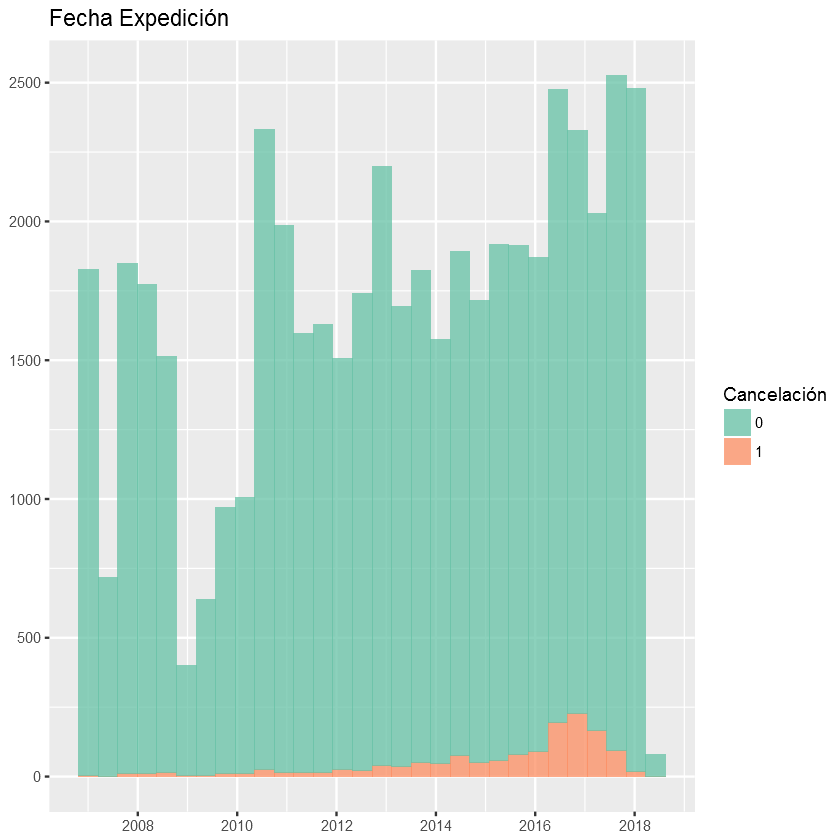

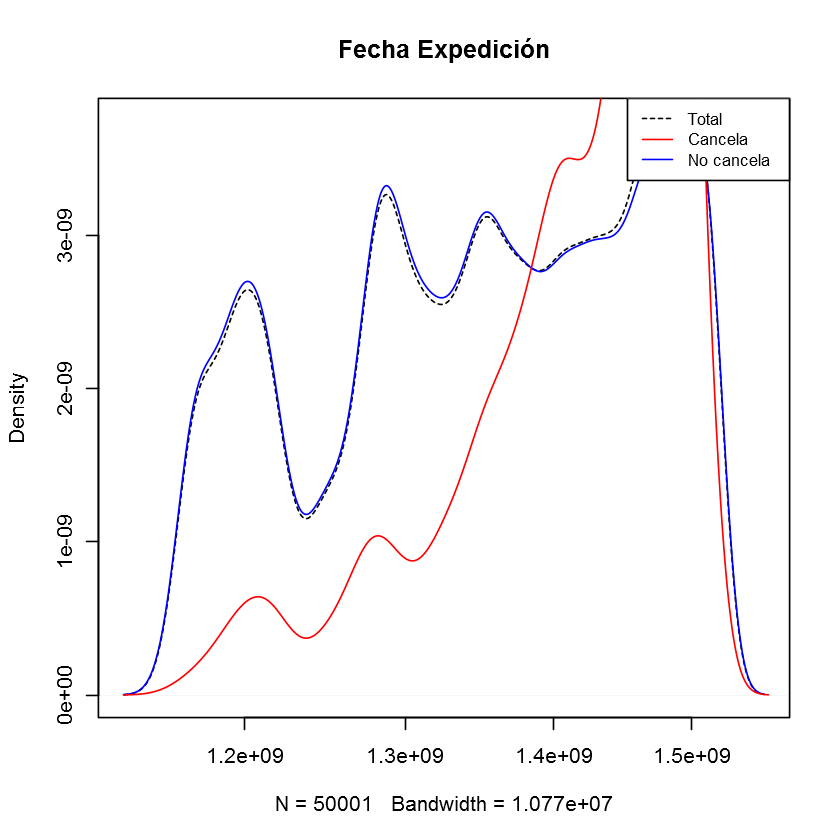

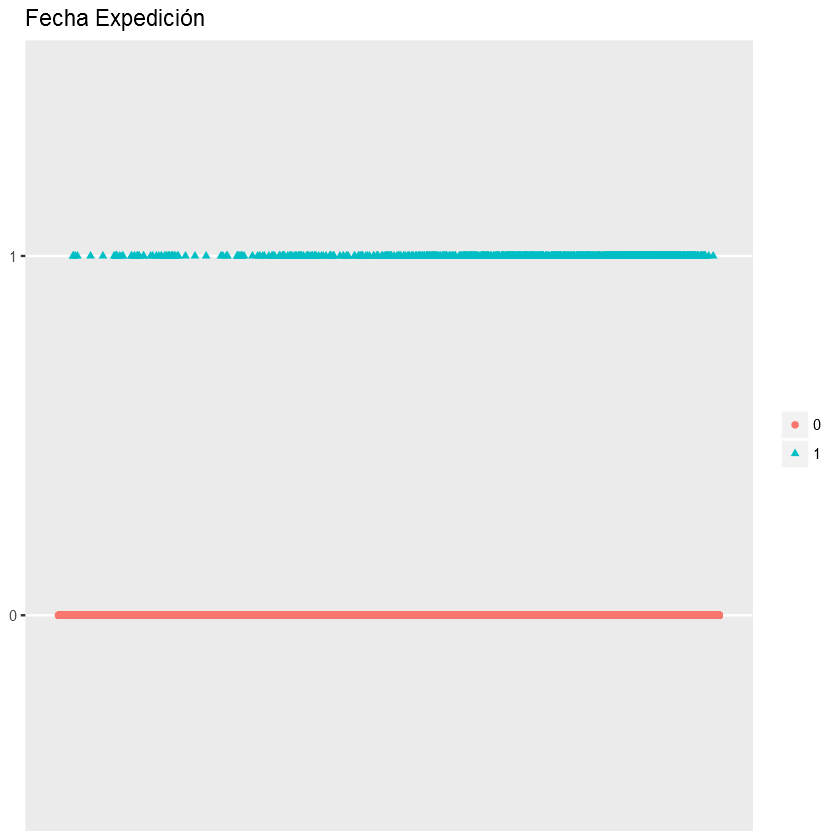

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


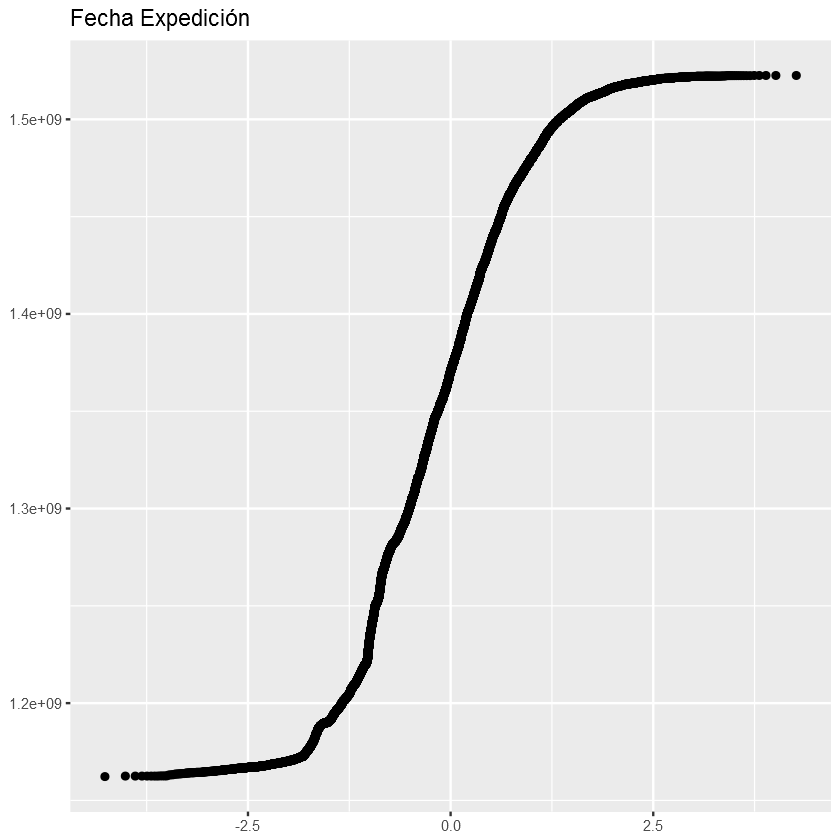

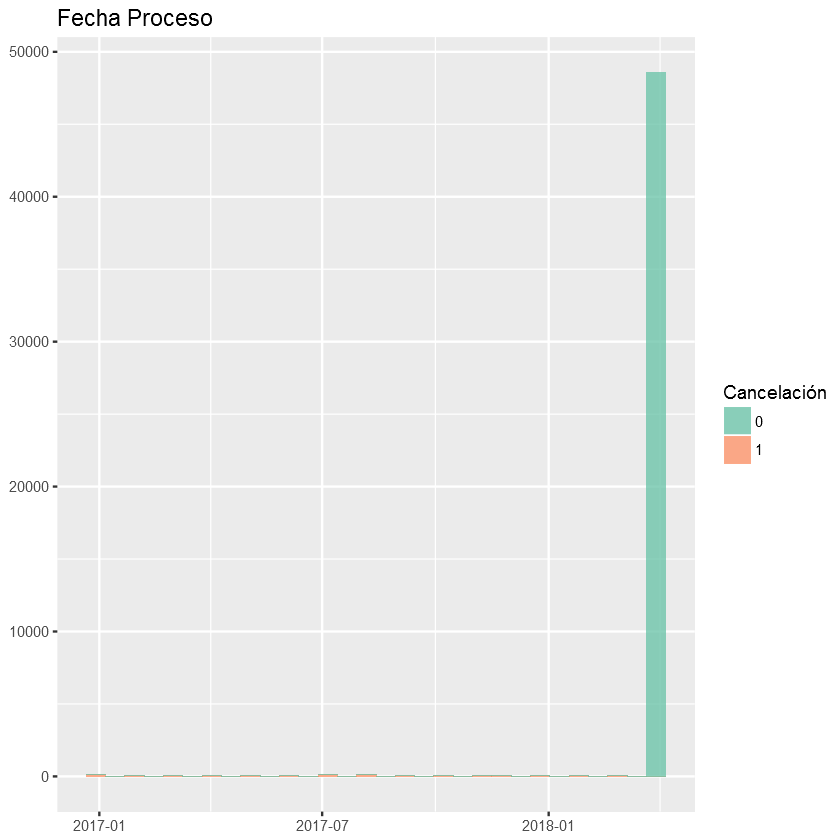

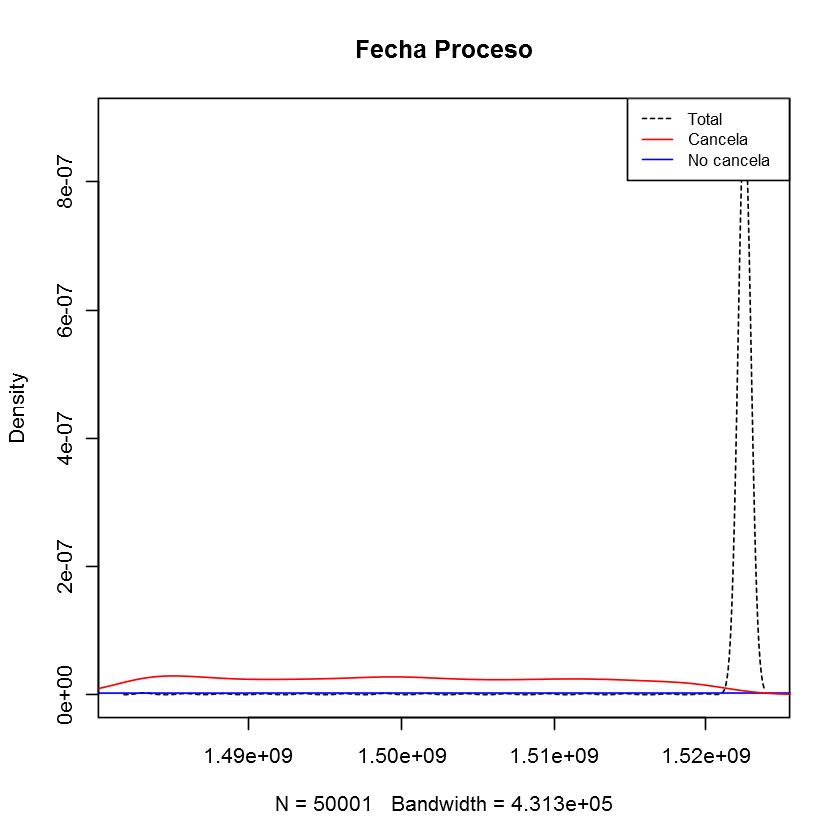

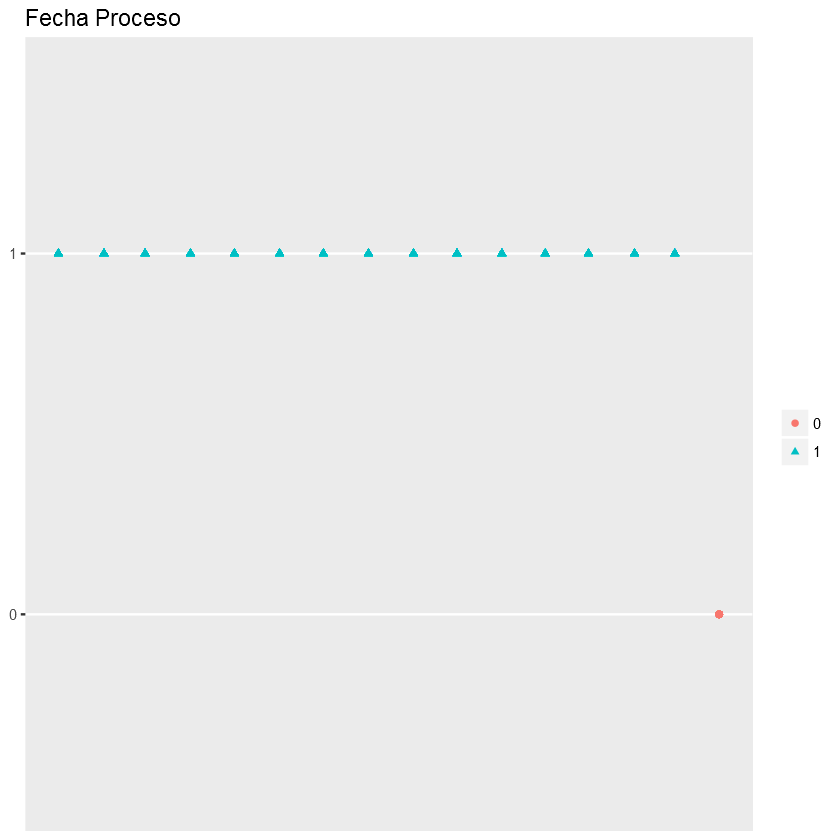

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
In xy.coords(x, y, xlabel, ylabel, log): 3 x values <= 0 omitted from logarithmic plot

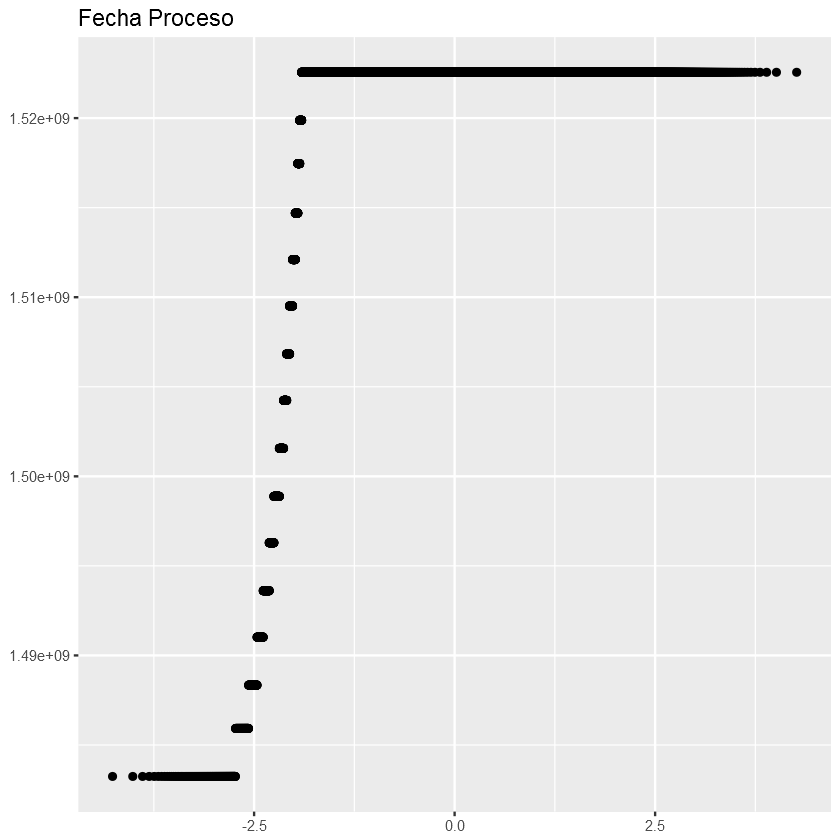

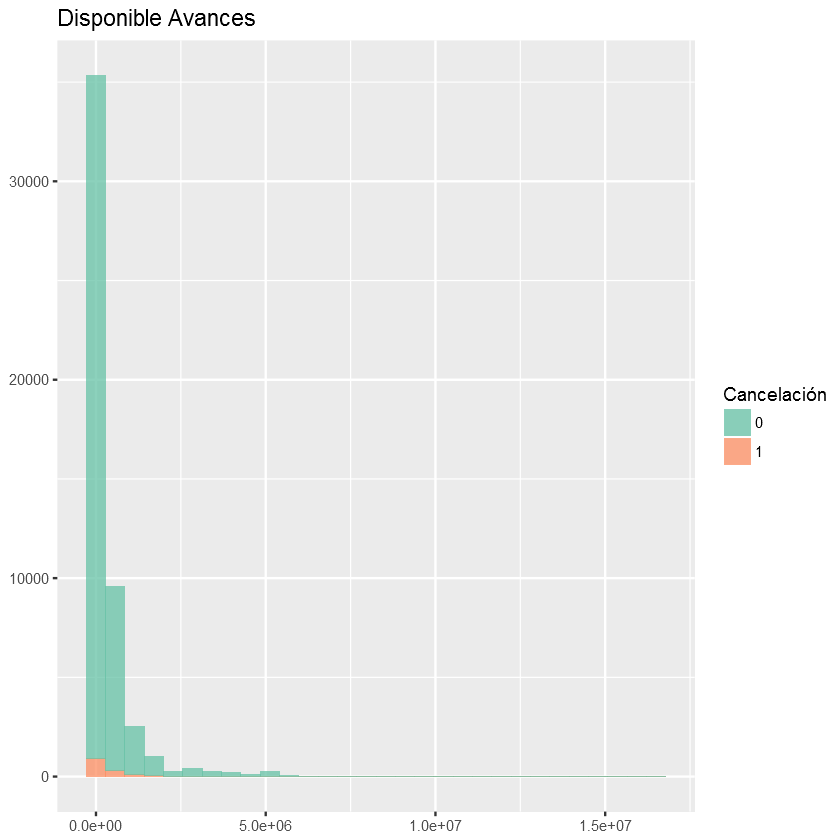

Warning message:
: Transformation introduced infinite values in continuous x-axis

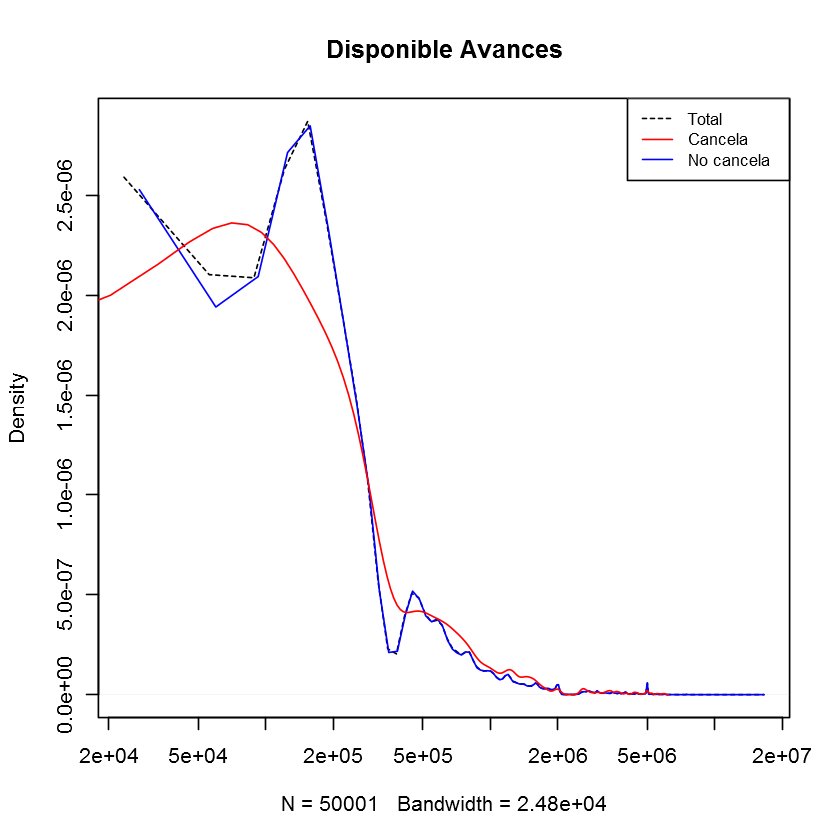

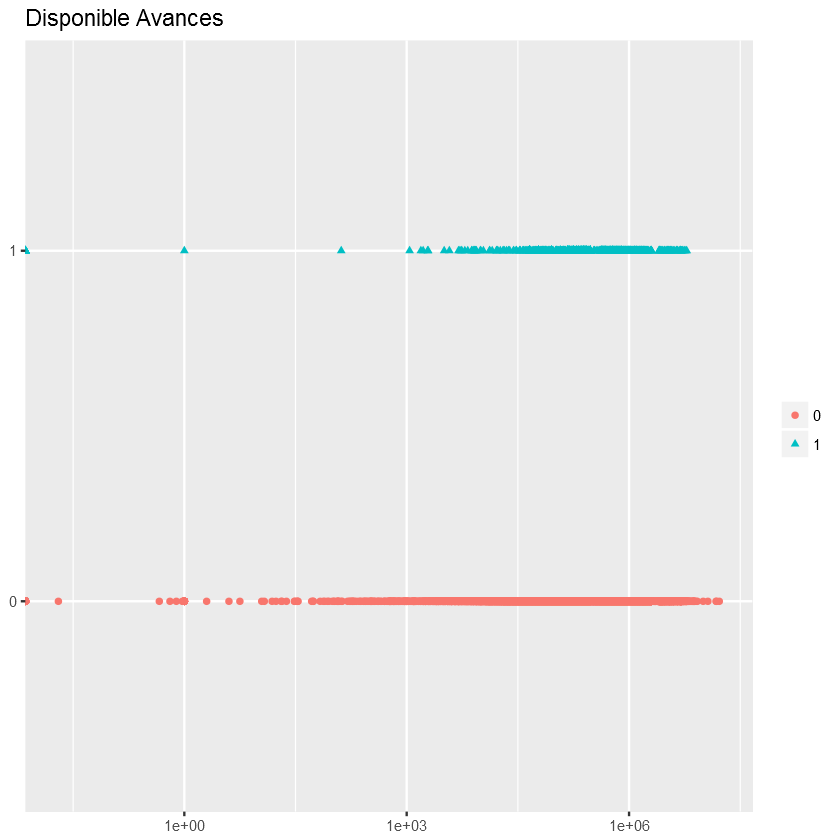

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
In xy.coords(x, y, xlabel, ylabel, log): 2 x values <= 0 omitted from logarithmic plot

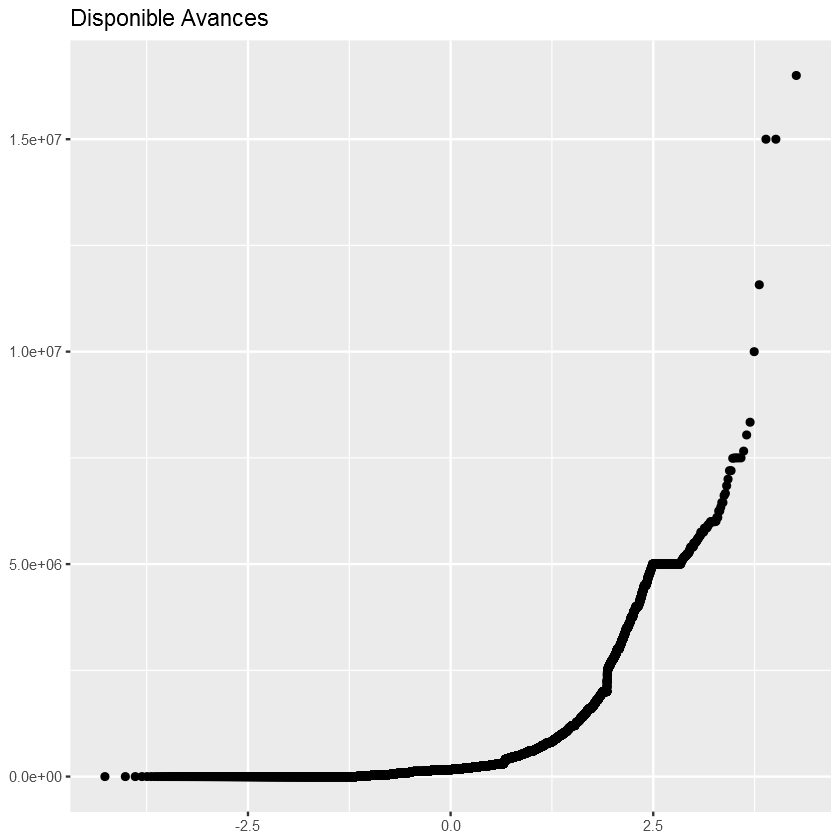

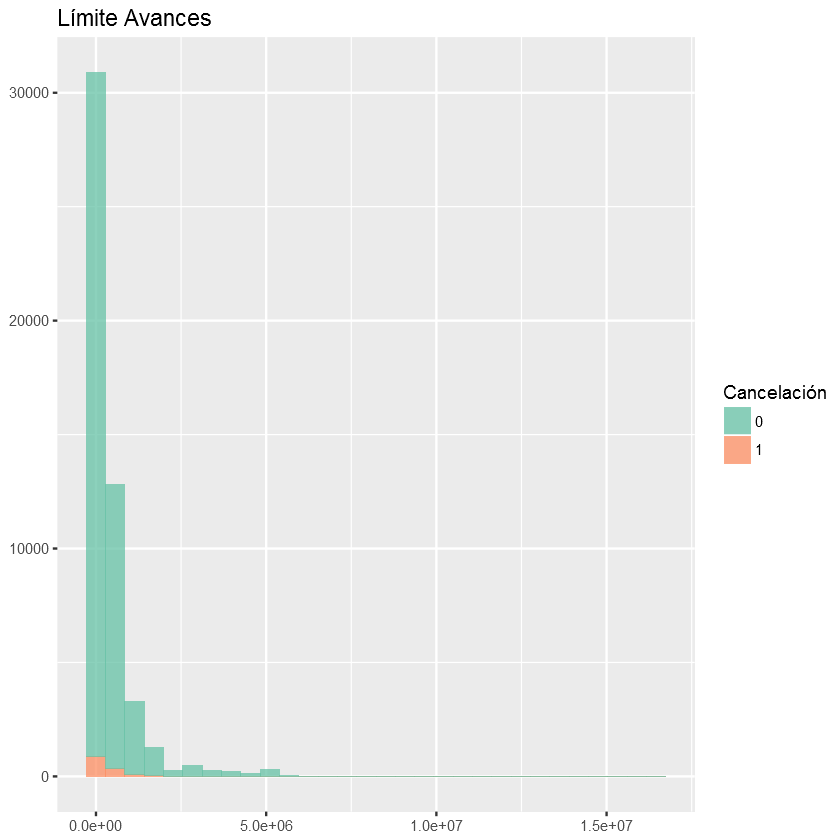

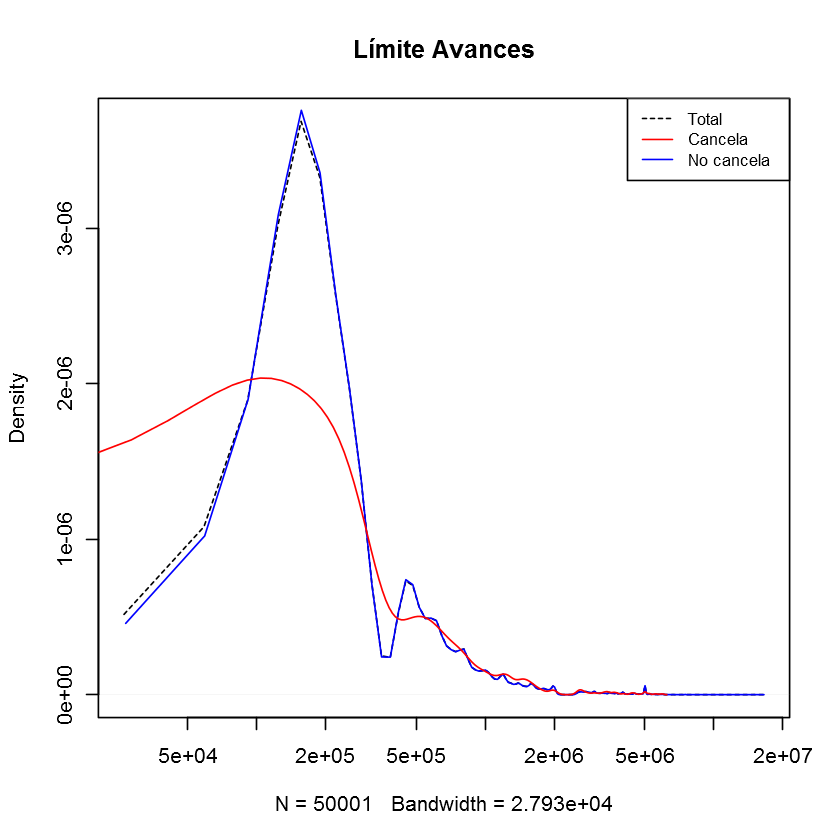

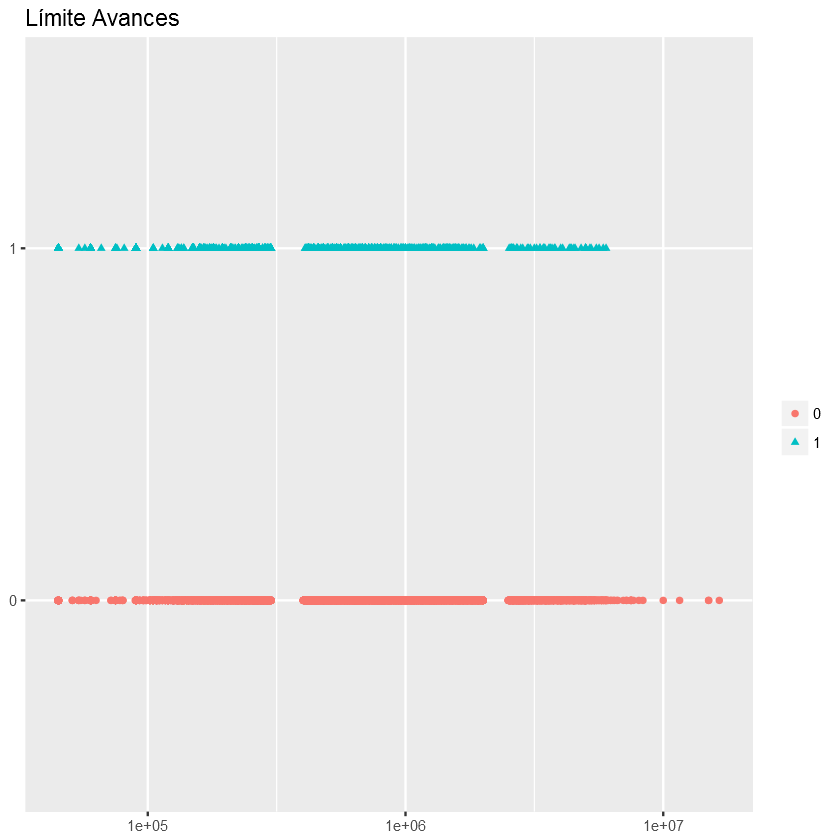

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
In xy.coords(x, y, xlabel, ylabel, log): 1 x value <= 0 omitted from logarithmic plot

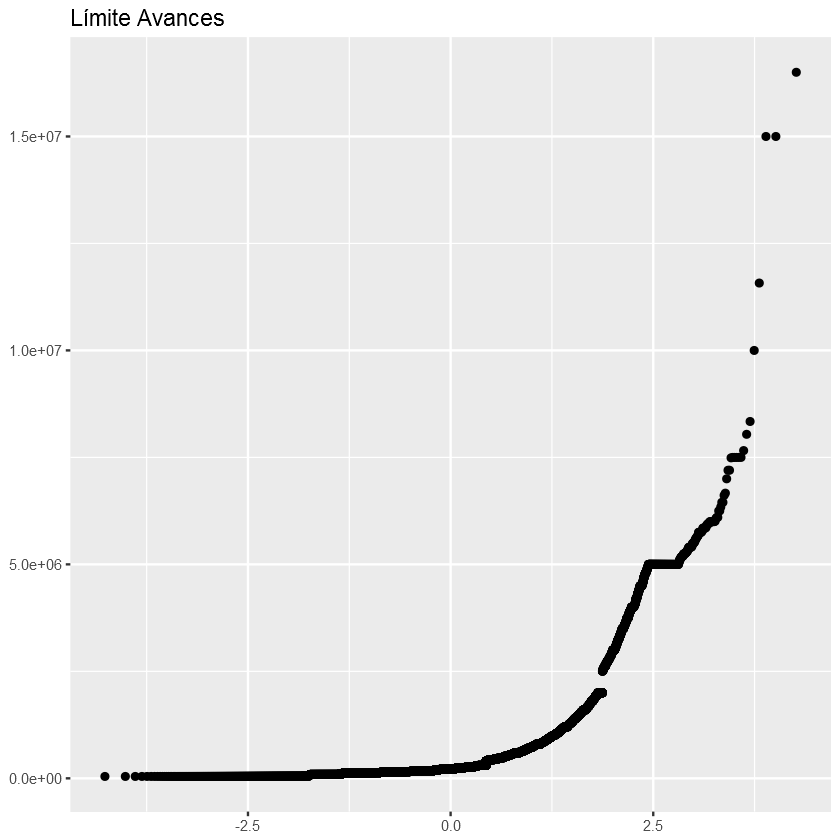

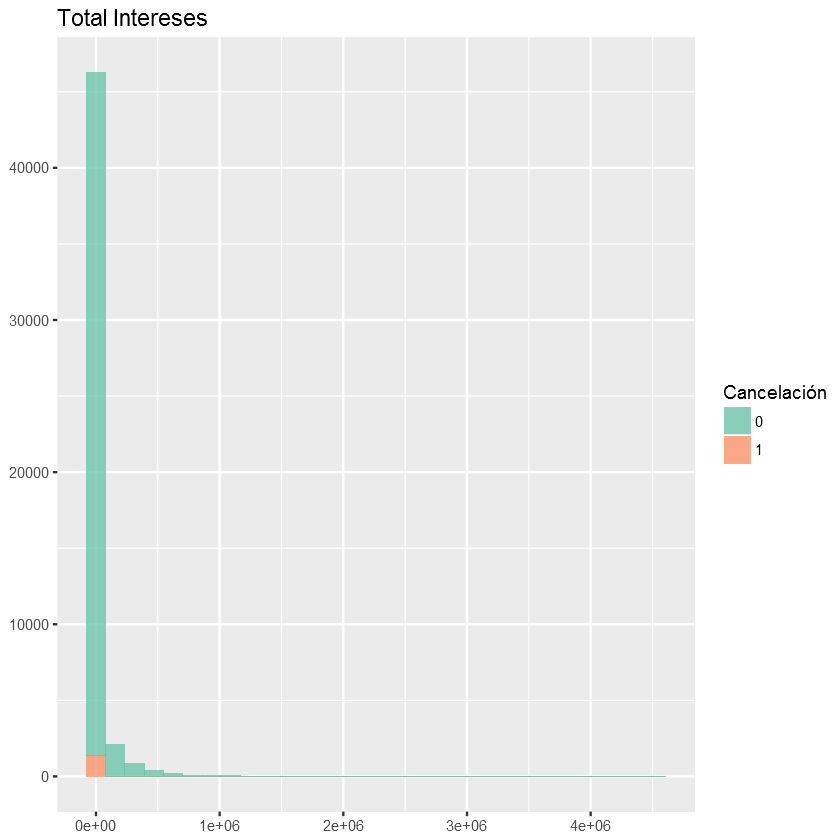

Warning message:
: Transformation introduced infinite values in continuous x-axis

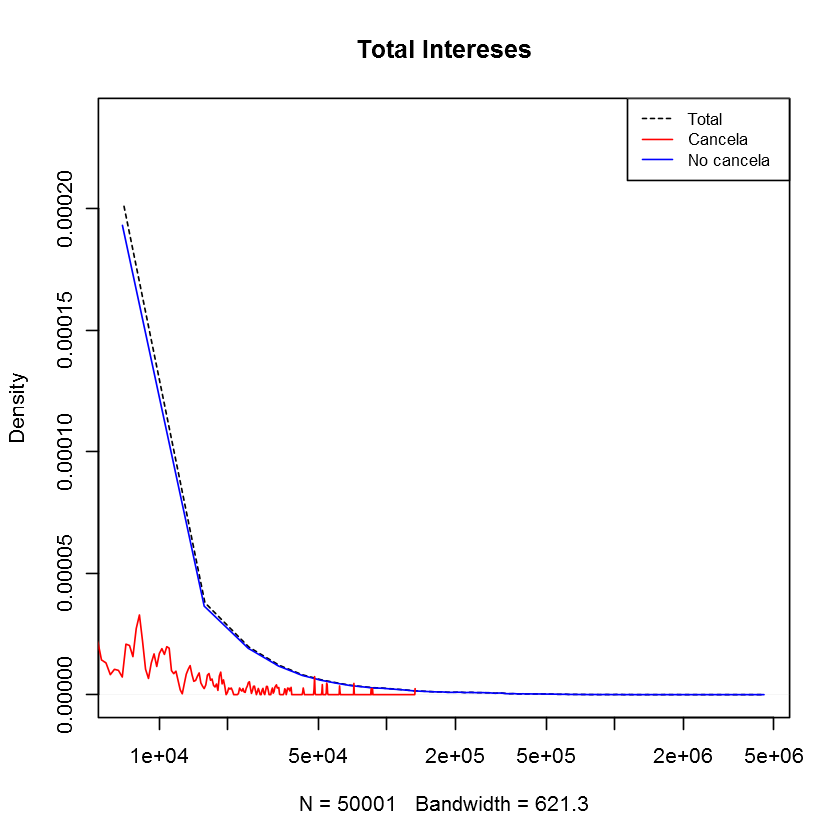

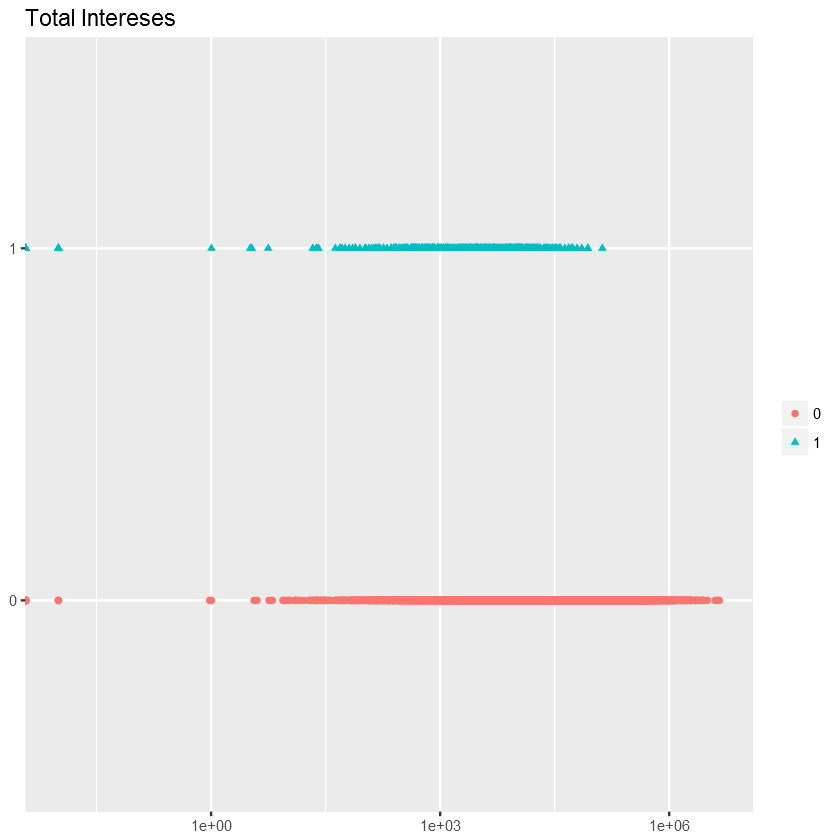

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
In xy.coords(x, y, xlabel, ylabel, log): 4 x values <= 0 omitted from logarithmic plot

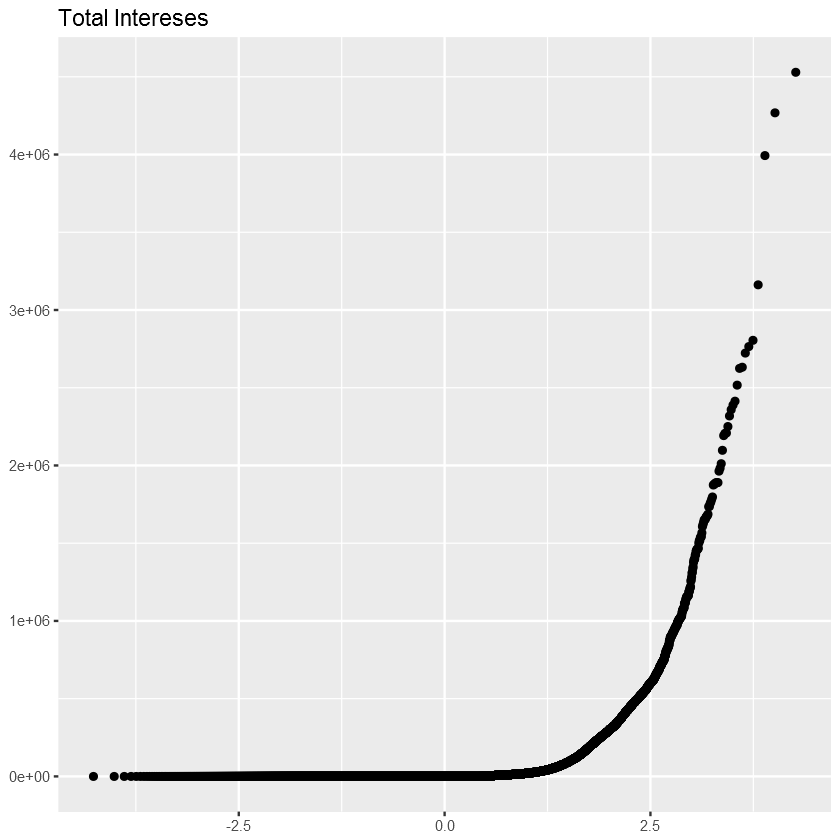

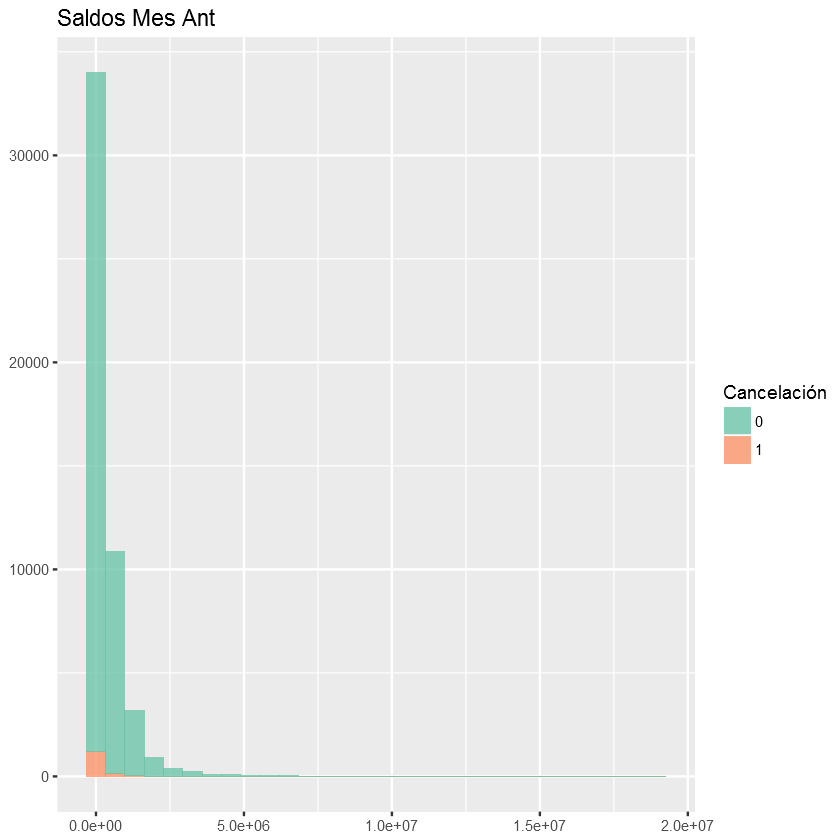

Warning message:
: Transformation introduced infinite values in continuous x-axis

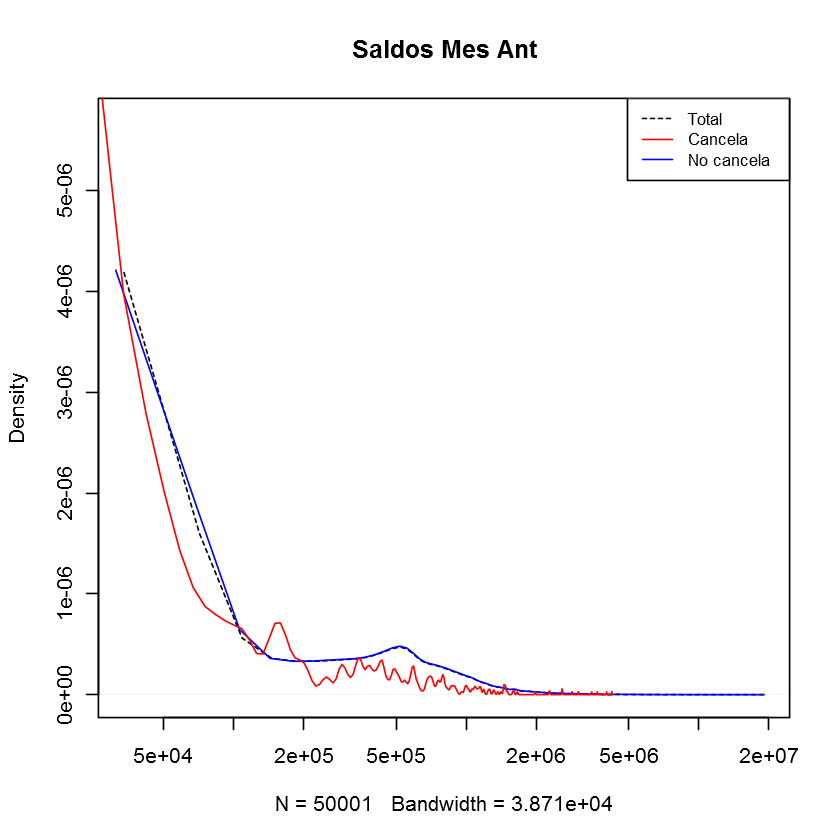

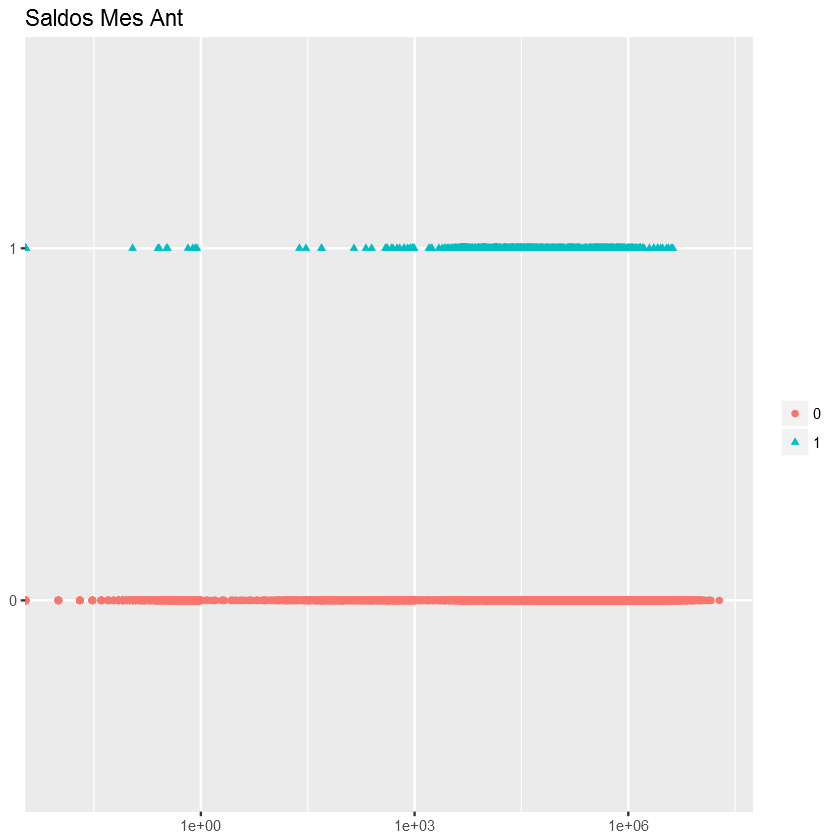

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
In xy.coords(x, y, xlabel, ylabel, log): 1 x value <= 0 omitted from logarithmic plot

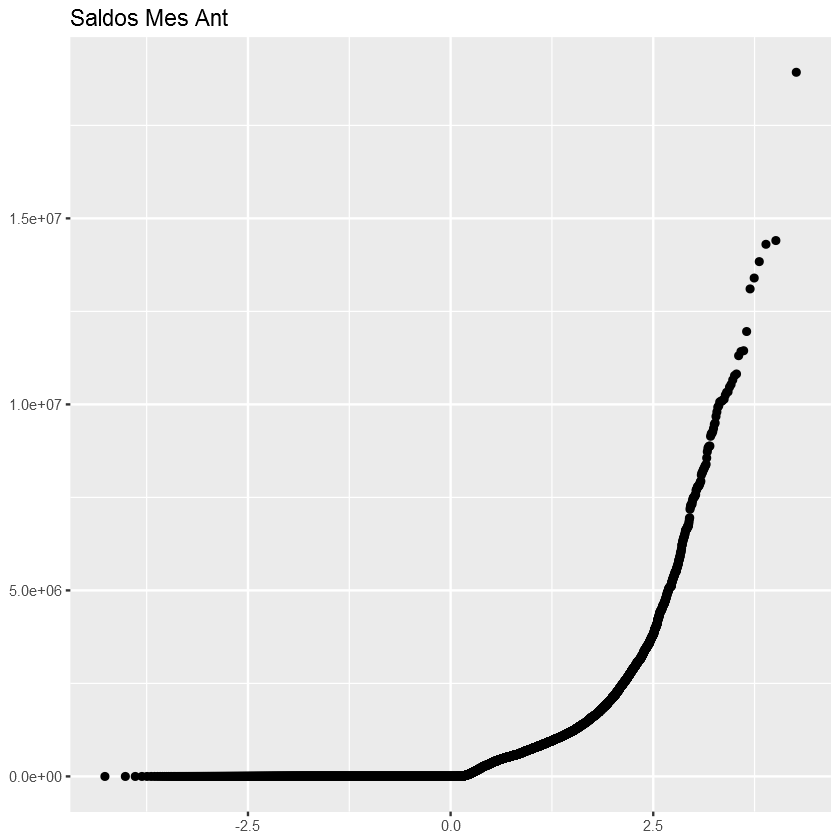

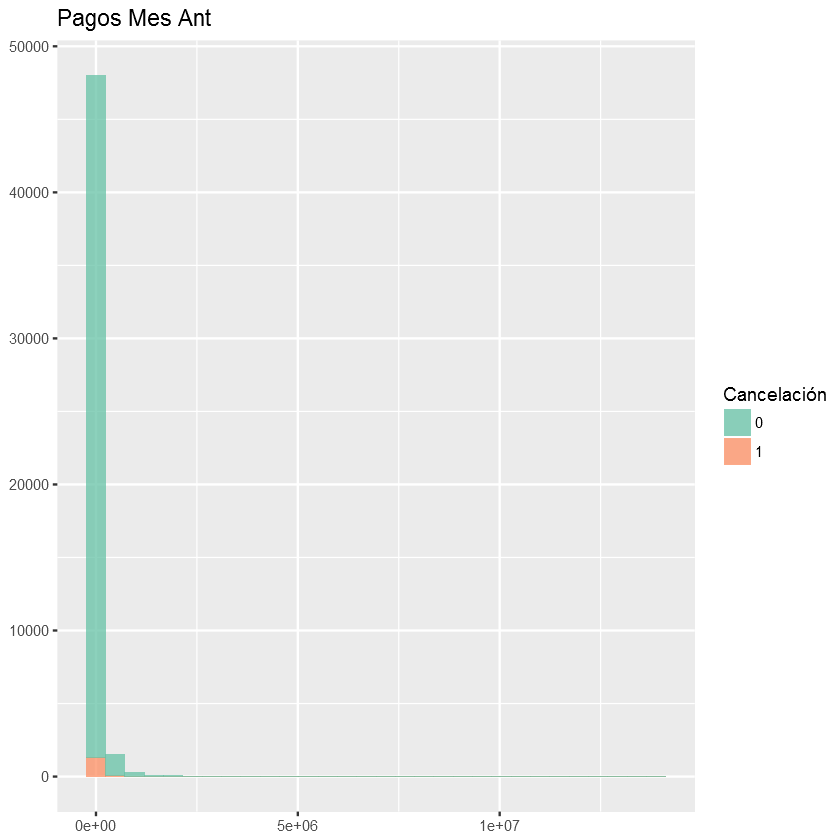

Warning message:
: Transformation introduced infinite values in continuous x-axis

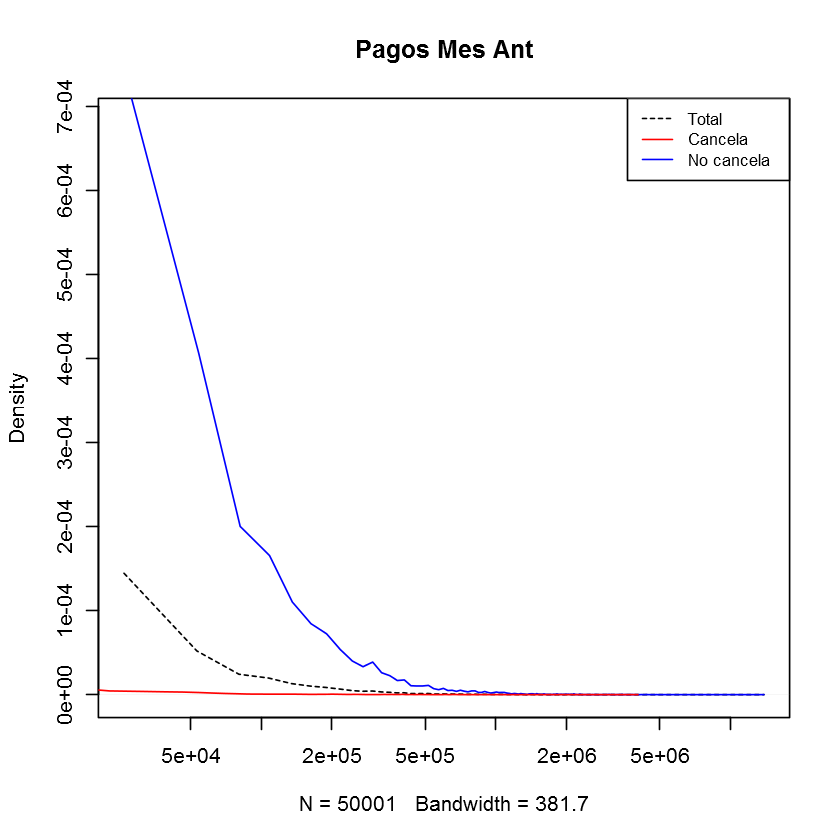

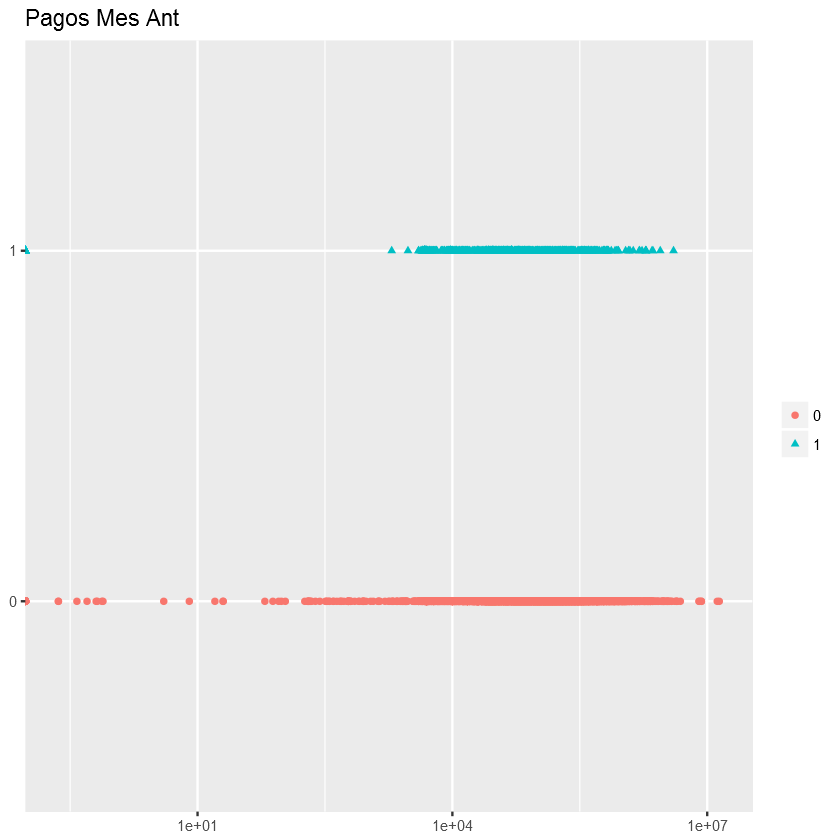

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
In xy.coords(x, y, xlabel, ylabel, log): 3 x values <= 0 omitted from logarithmic plot

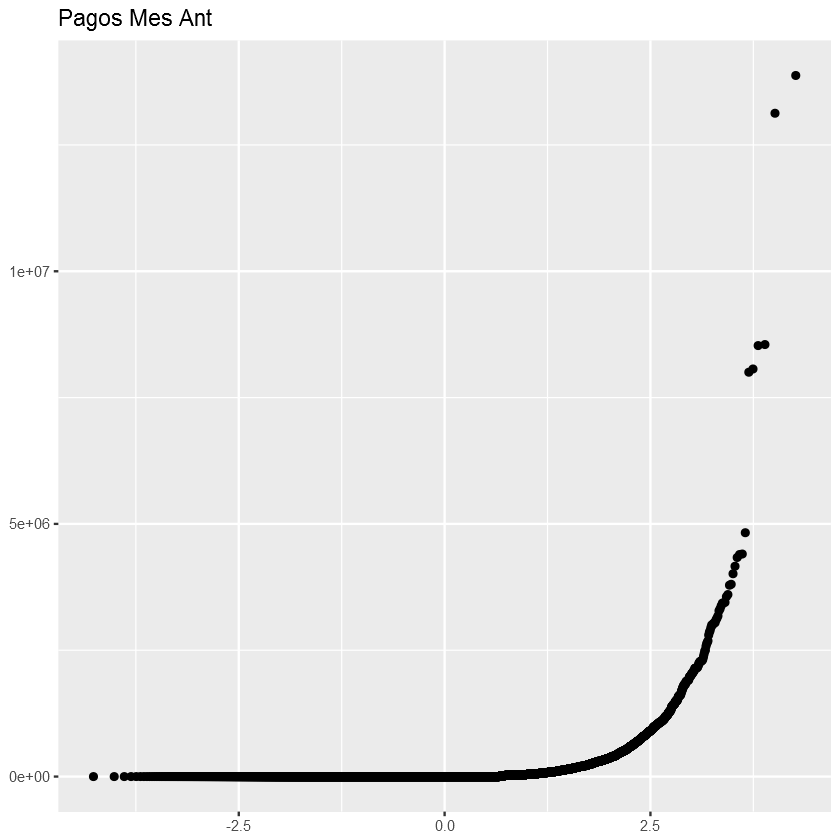

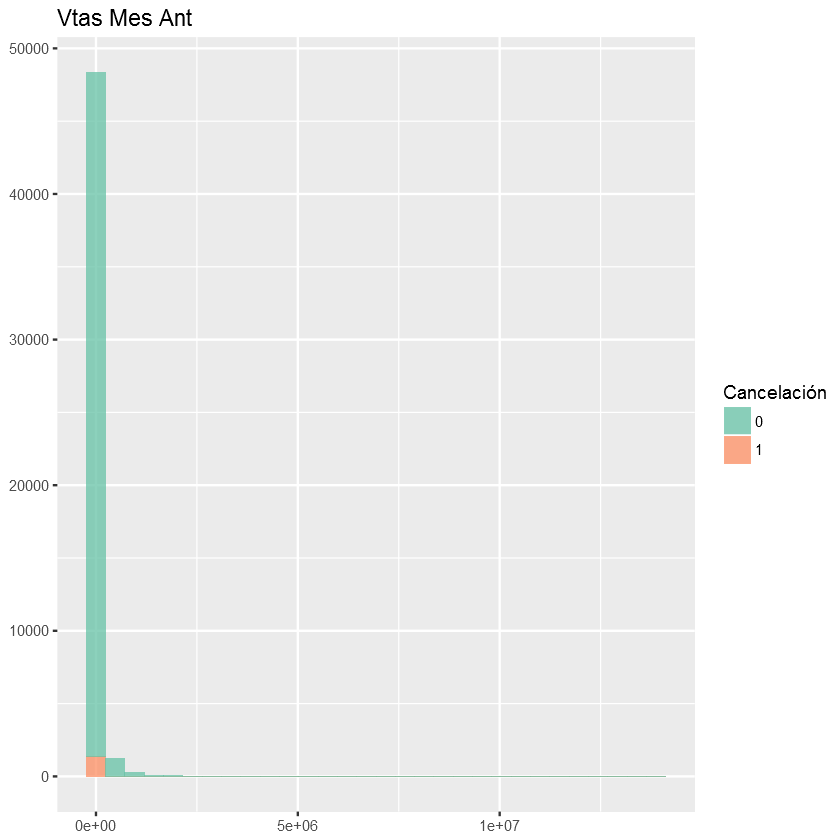

Warning message:
: Transformation introduced infinite values in continuous x-axis

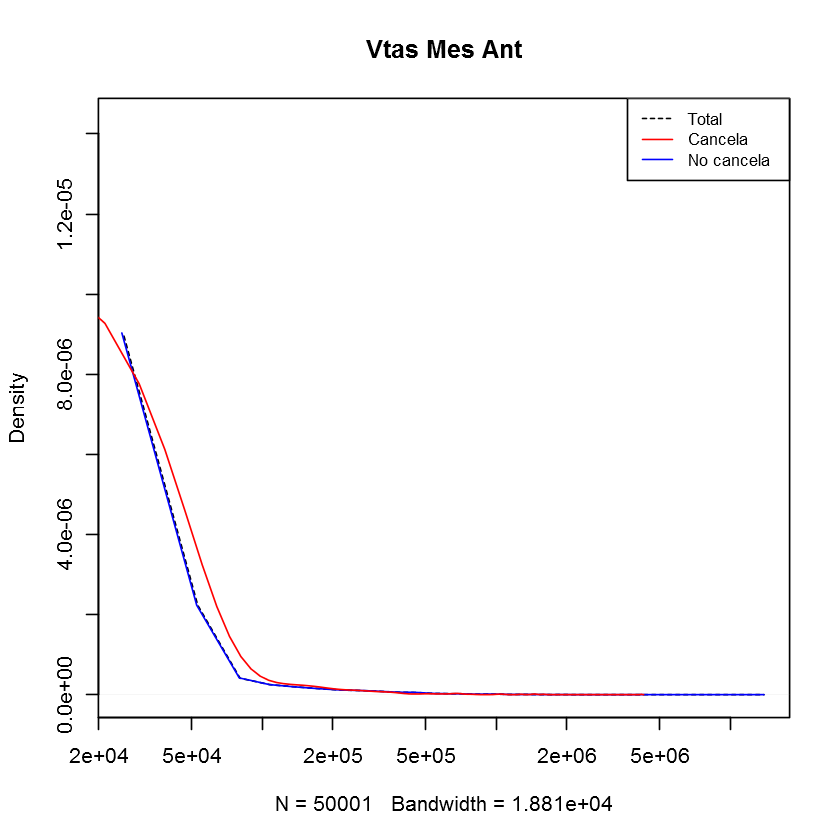

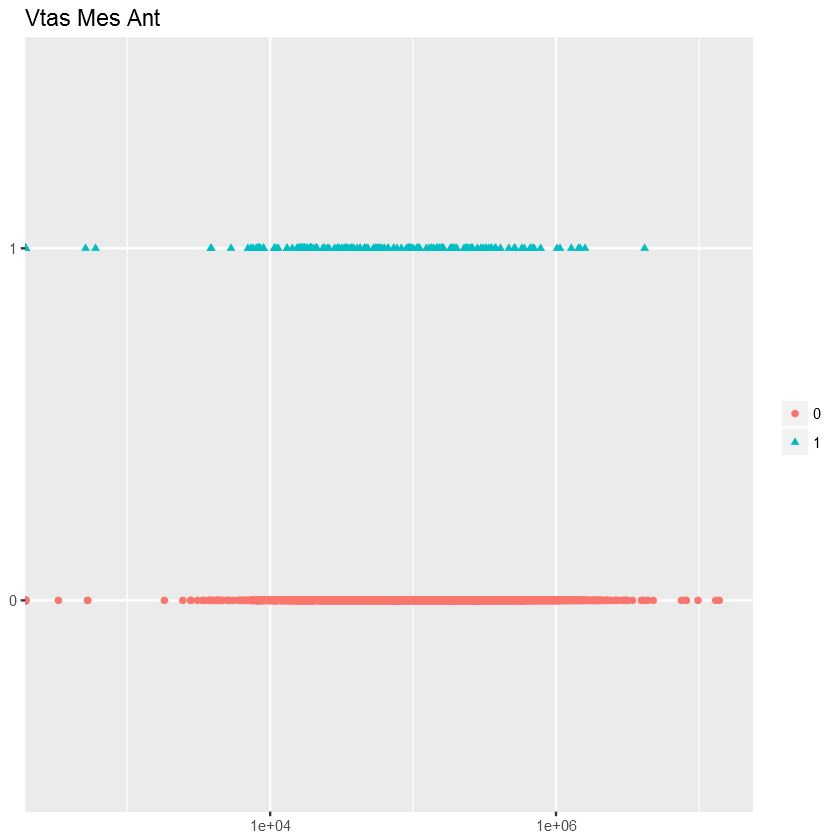

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
In xy.coords(x, y, xlabel, ylabel, log): 16 x values <= 0 omitted from logarithmic plot

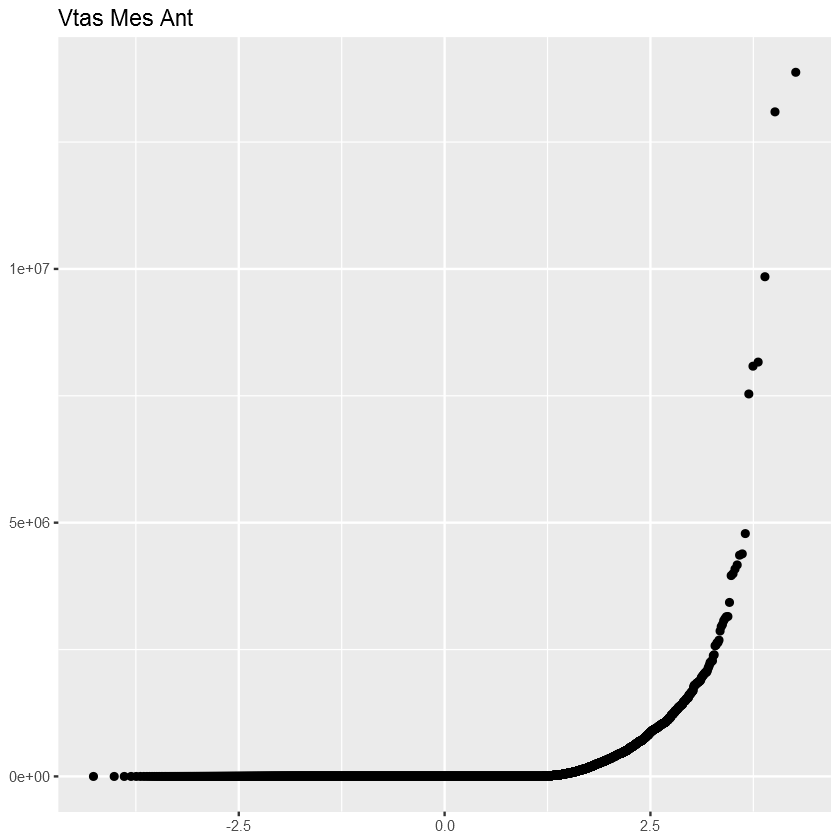

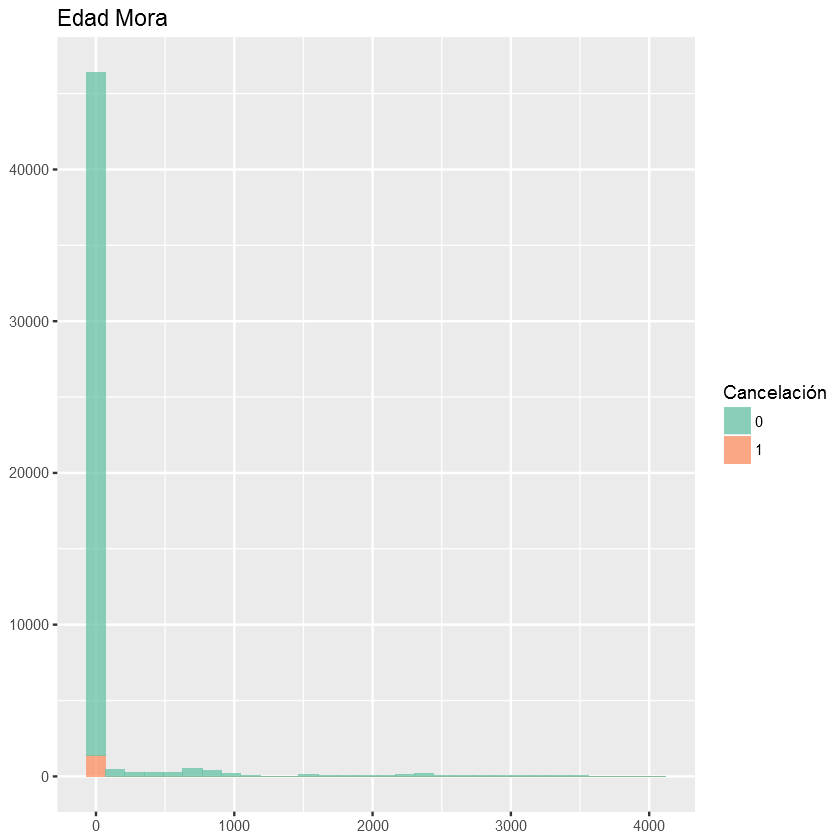

Warning message:
: Transformation introduced infinite values in continuous x-axis

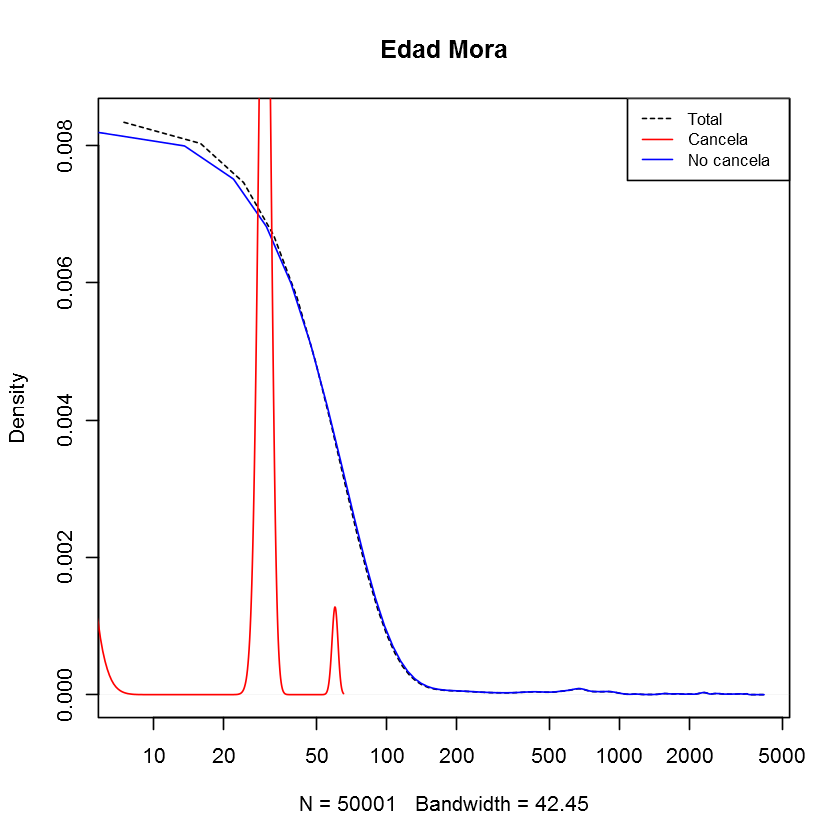

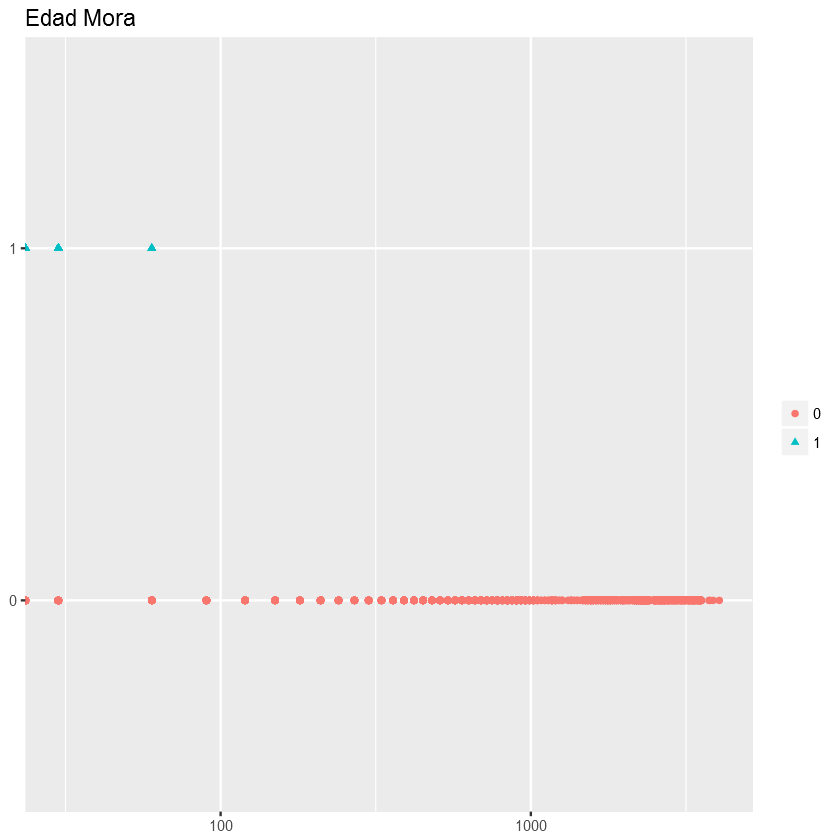

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
In xy.coords(x, y, xlabel, ylabel, log): 1 x value <= 0 omitted from logarithmic plot

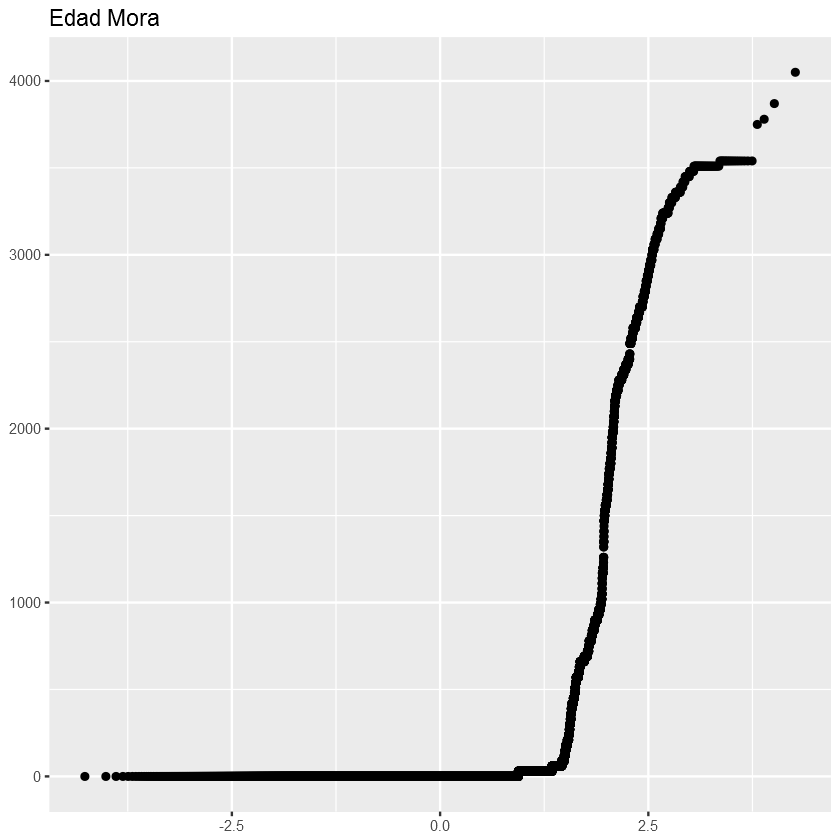

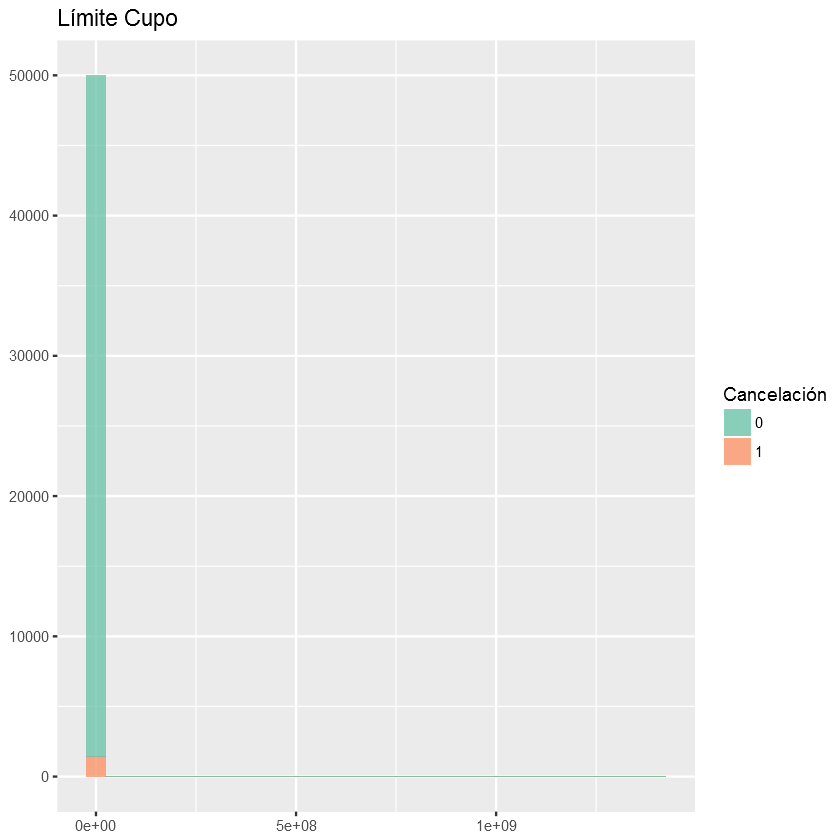

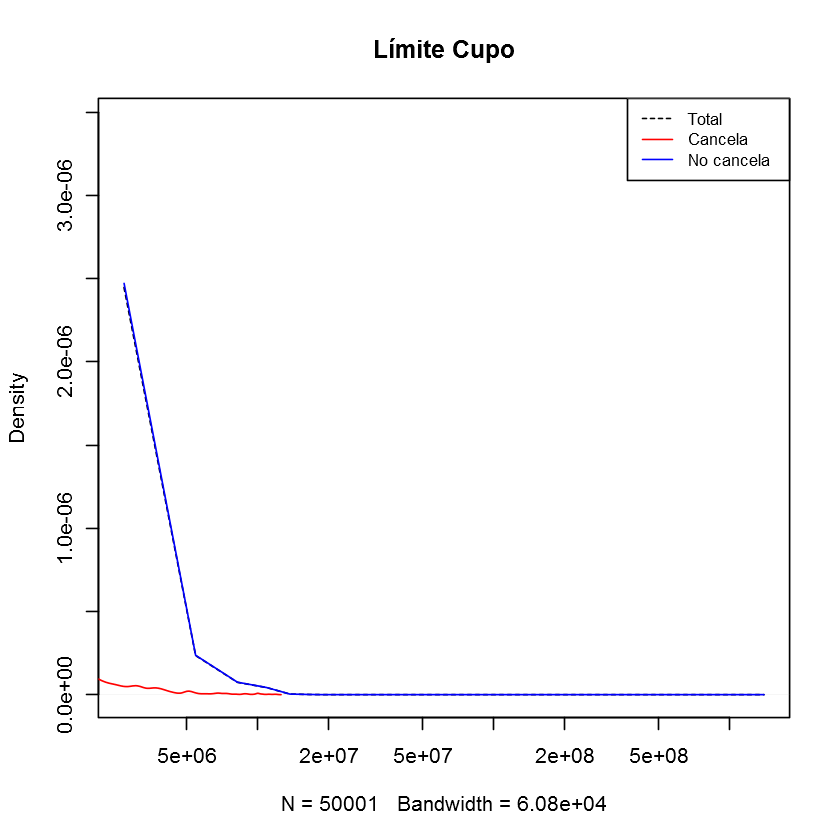

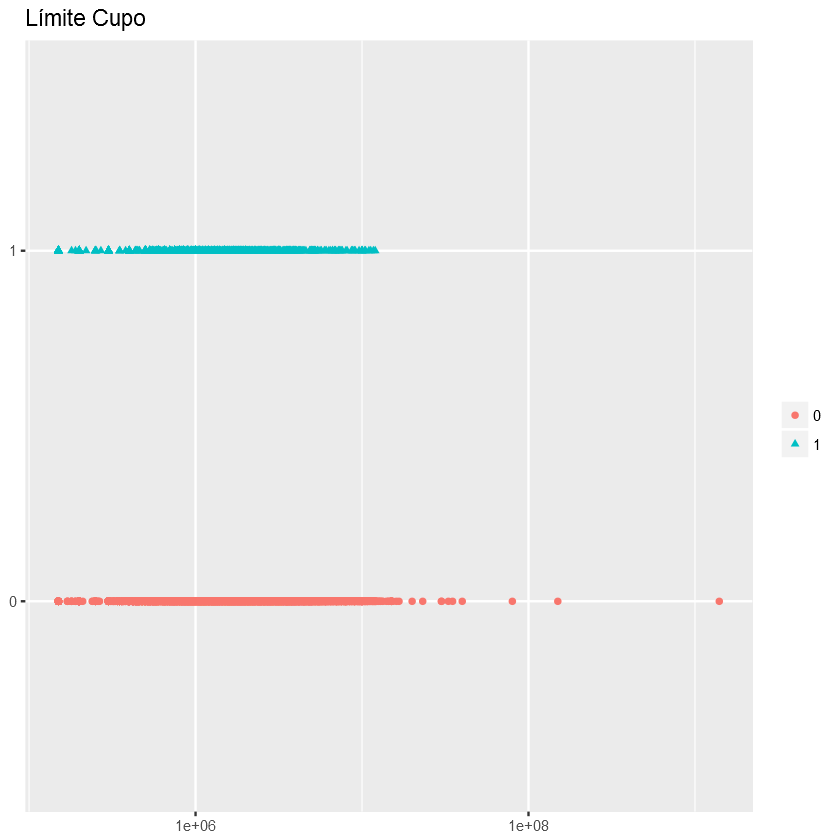

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
In xy.coords(x, y, xlabel, ylabel, log): 2 x values <= 0 omitted from logarithmic plot

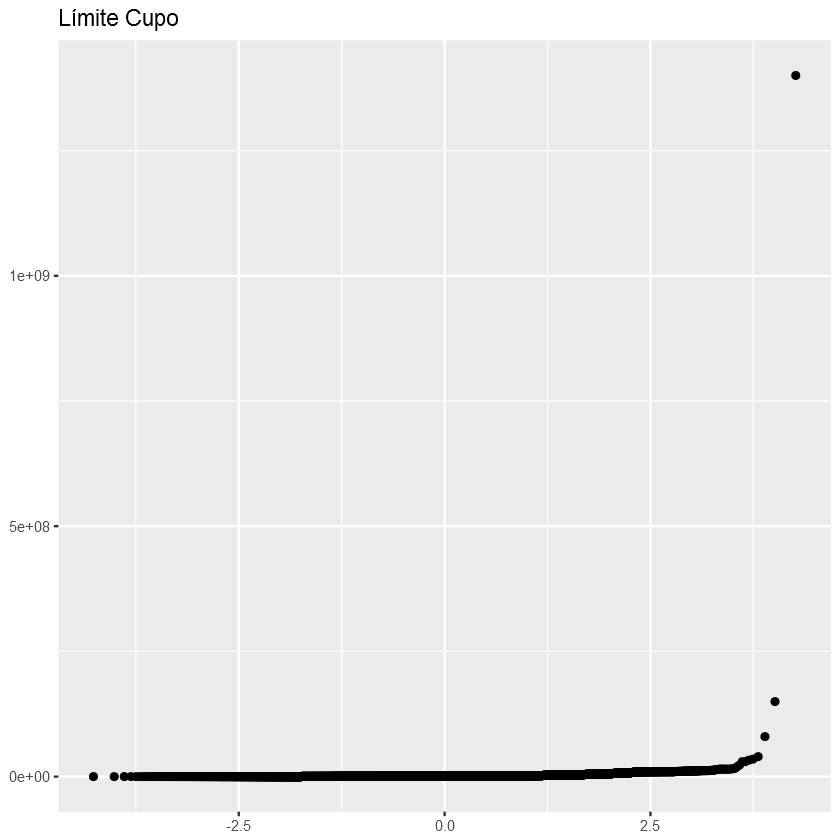

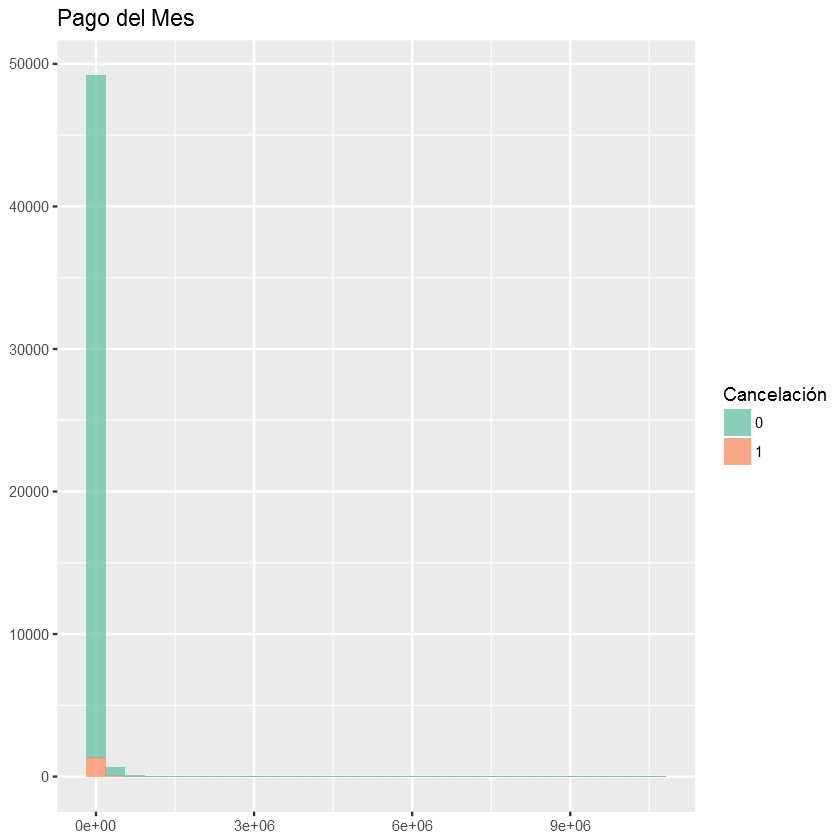

Warning message:
: Transformation introduced infinite values in continuous x-axis

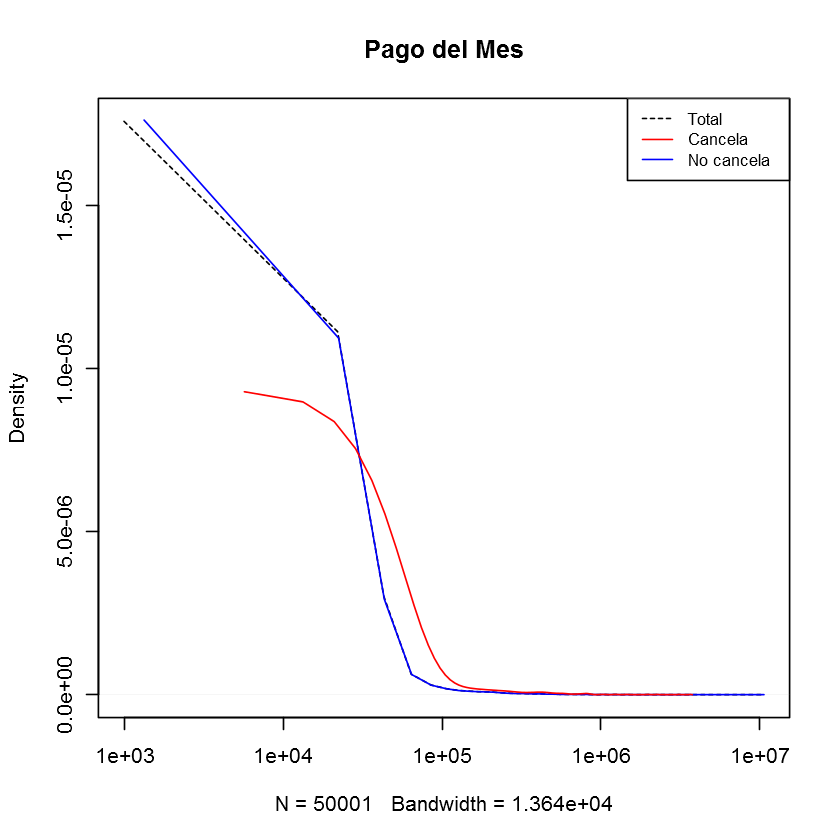

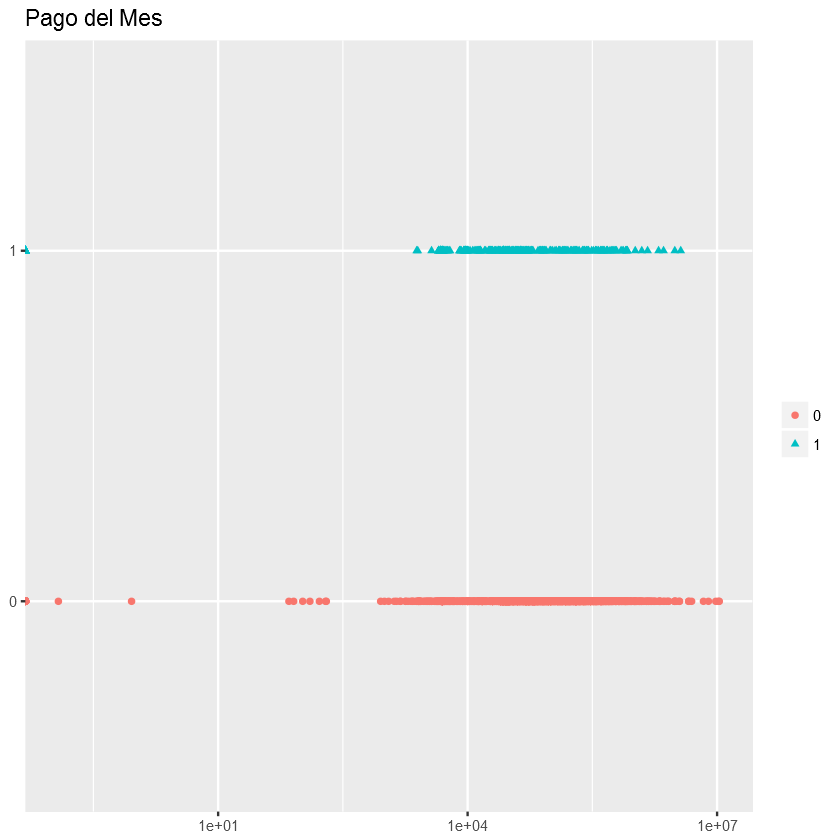

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
In xy.coords(x, y, xlabel, ylabel, log): 1 x value <= 0 omitted from logarithmic plot

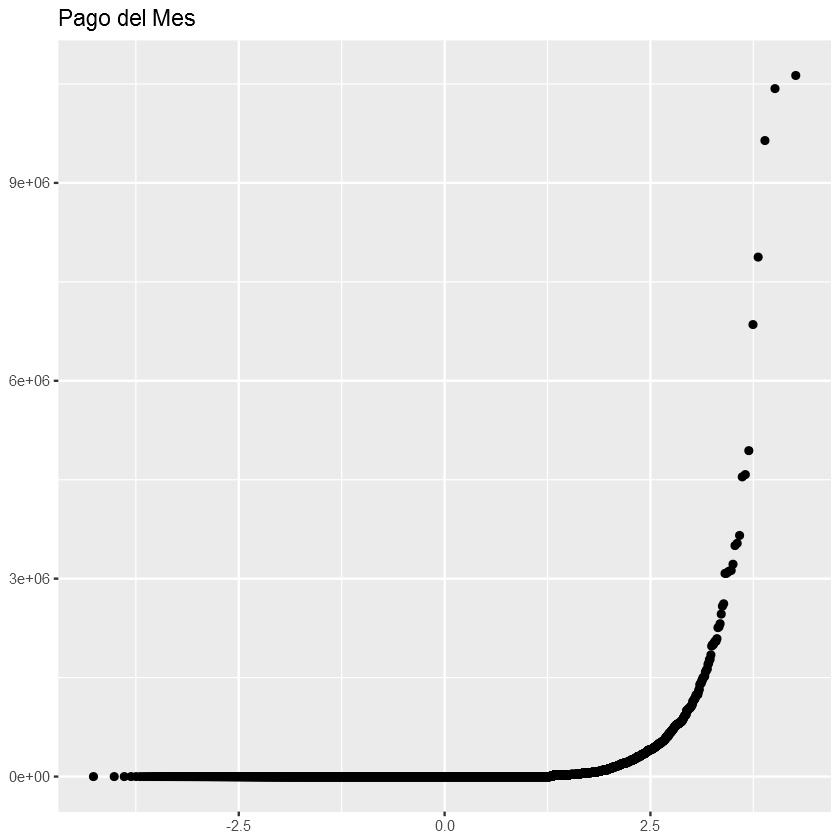

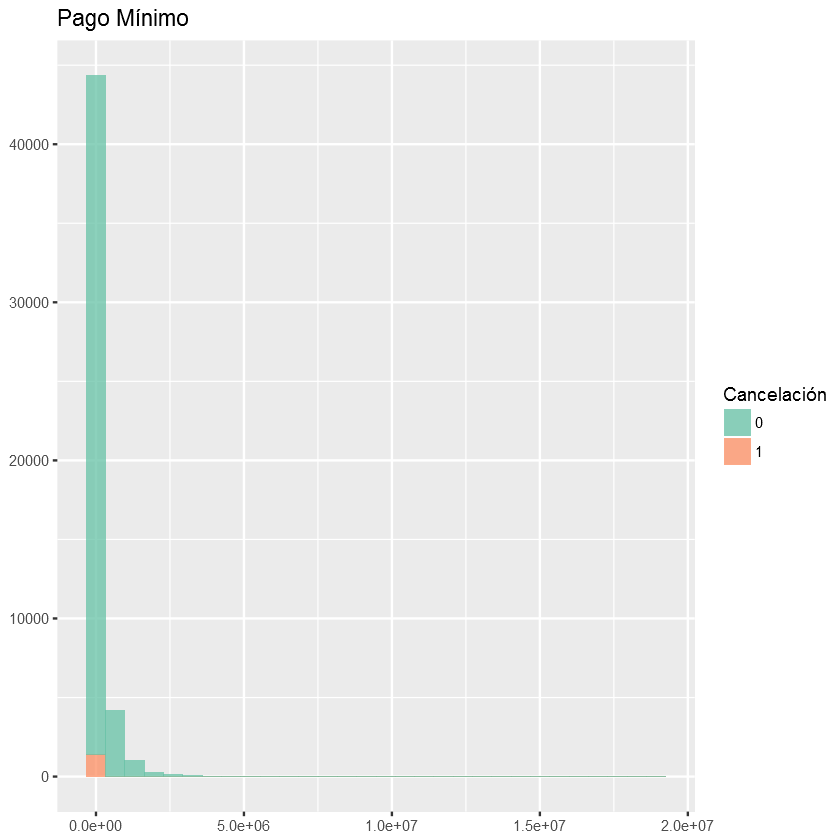

Warning message:
: Transformation introduced infinite values in continuous x-axis

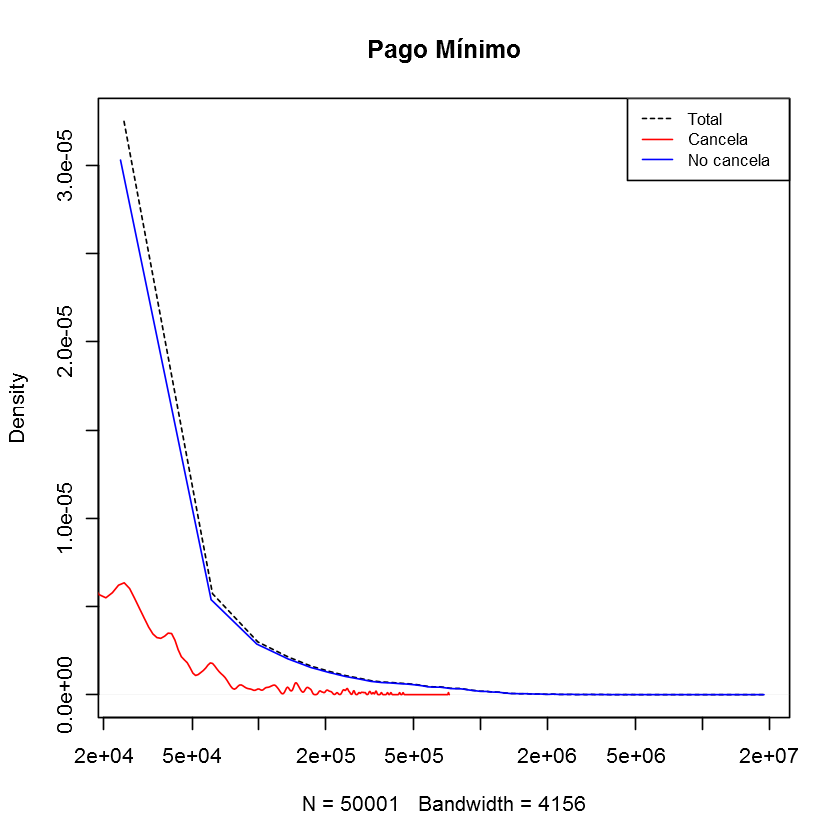

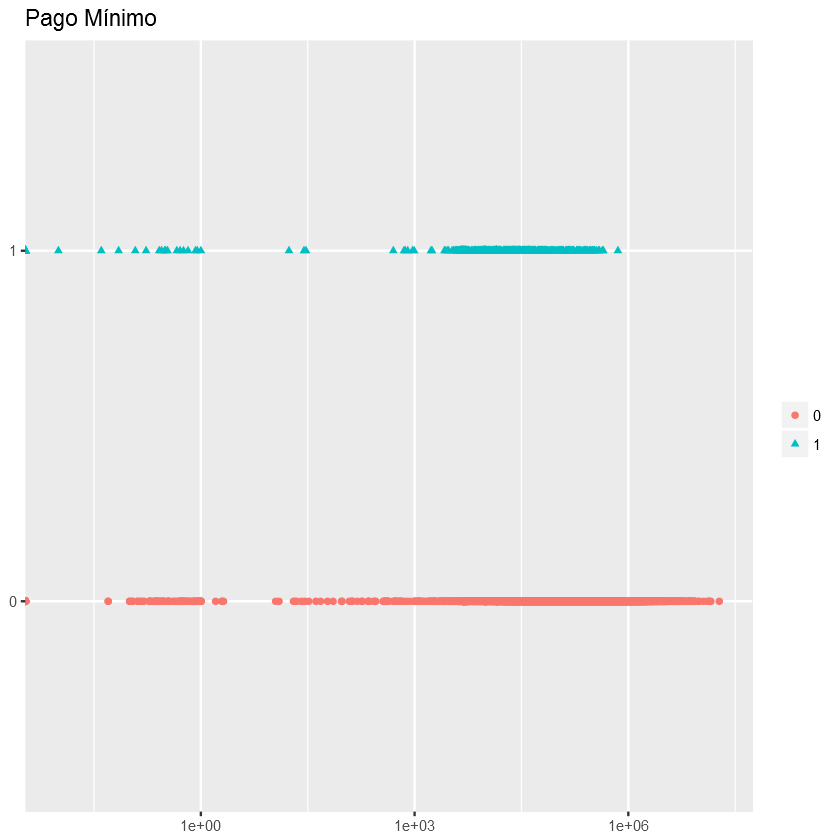

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
In xy.coords(x, y, xlabel, ylabel, log): 3 x values <= 0 omitted from logarithmic plot

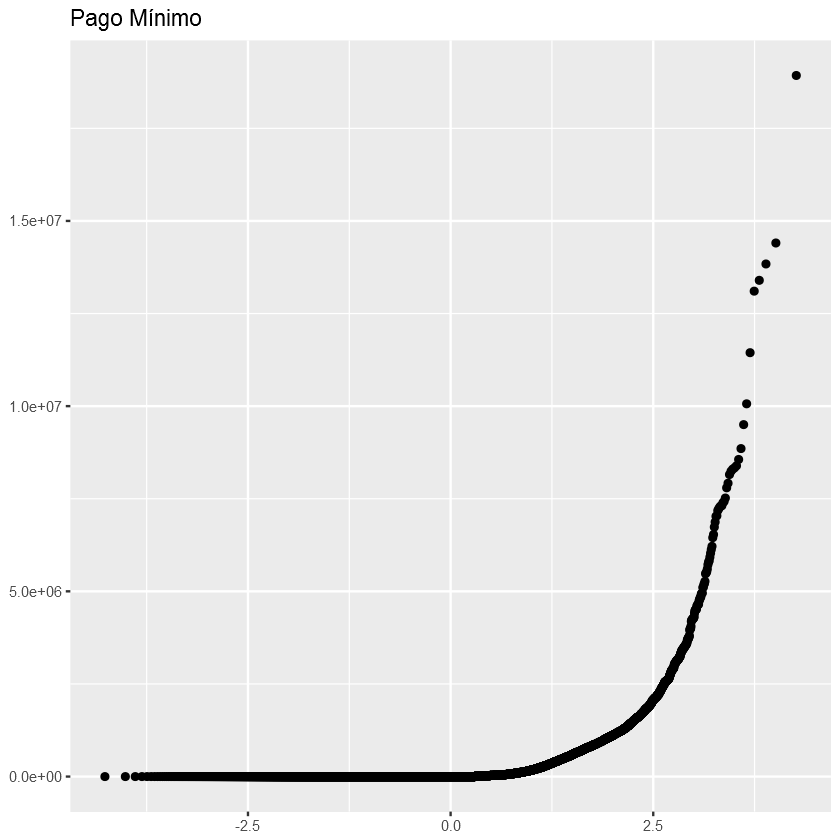

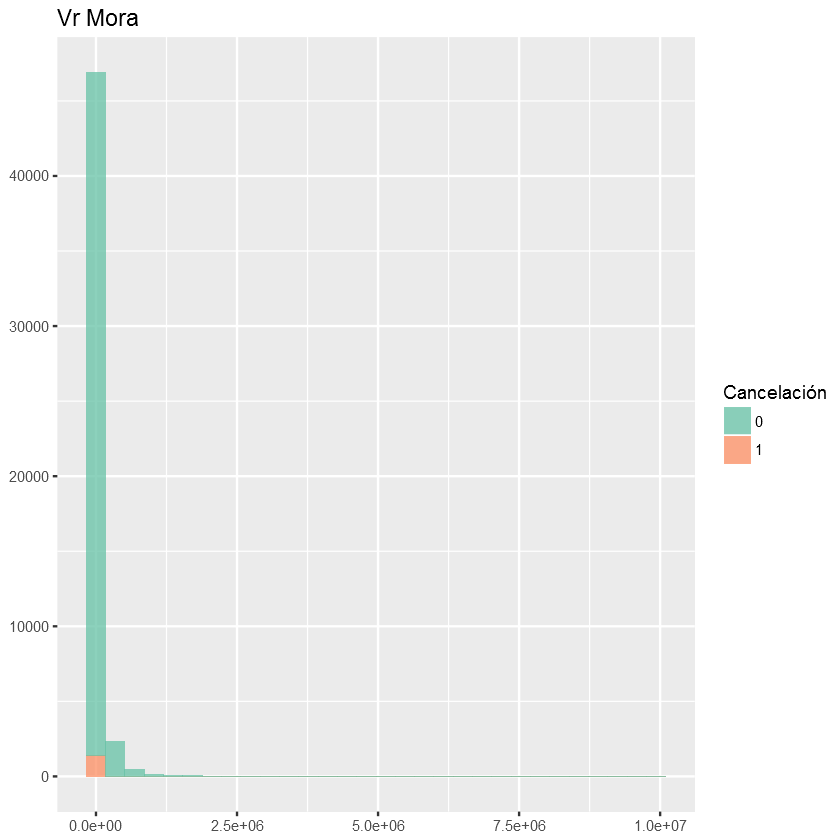

Warning message:
: Transformation introduced infinite values in continuous x-axis

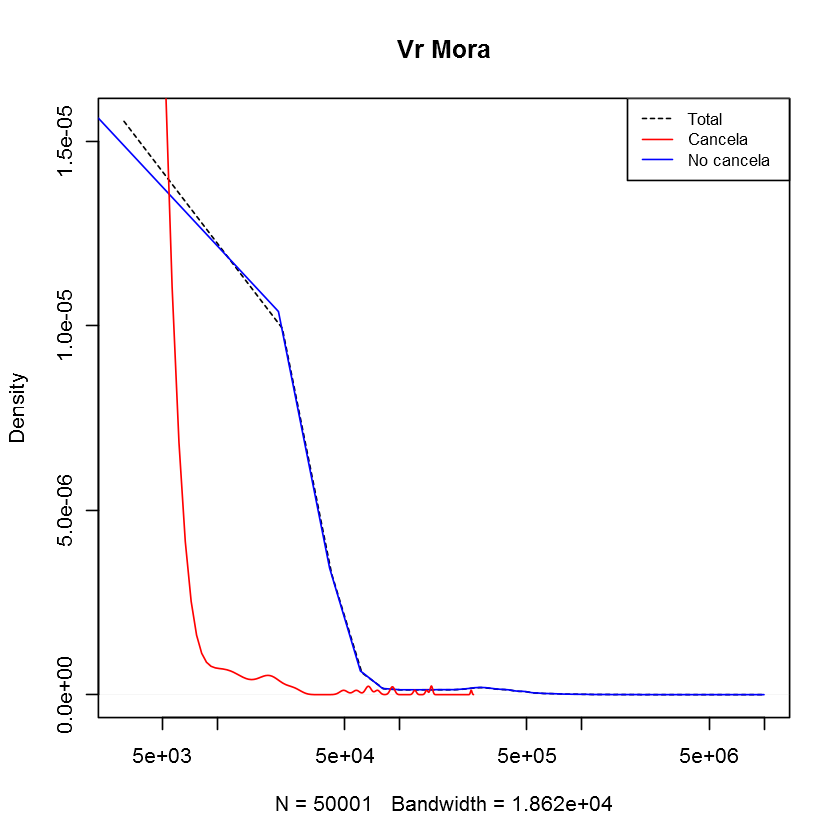

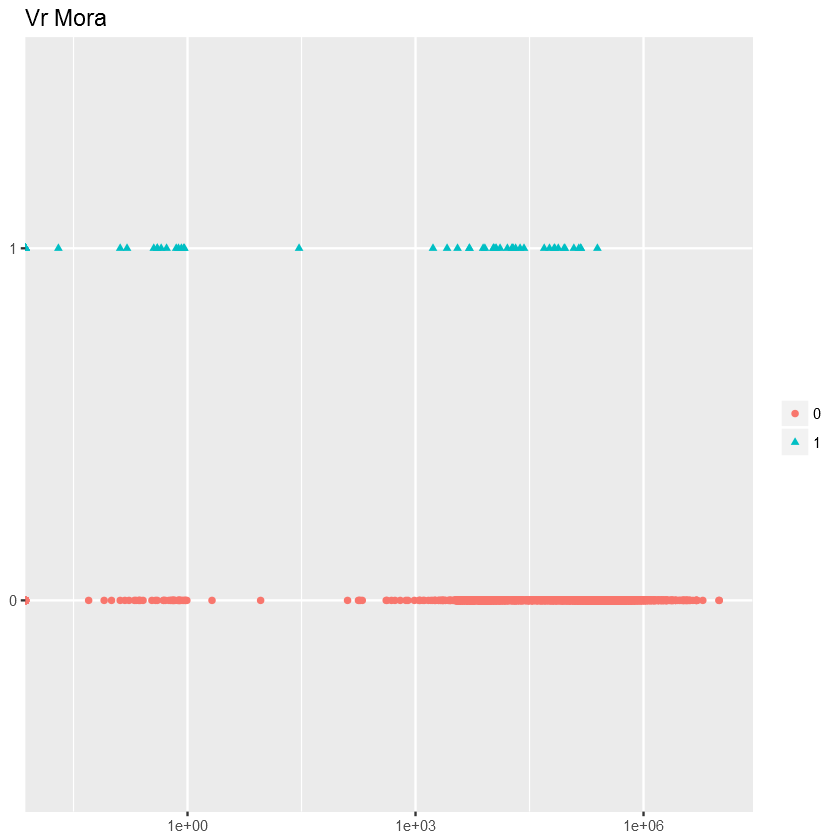

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
In xy.coords(x, y, xlabel, ylabel, log): 2 x values <= 0 omitted from logarithmic plot

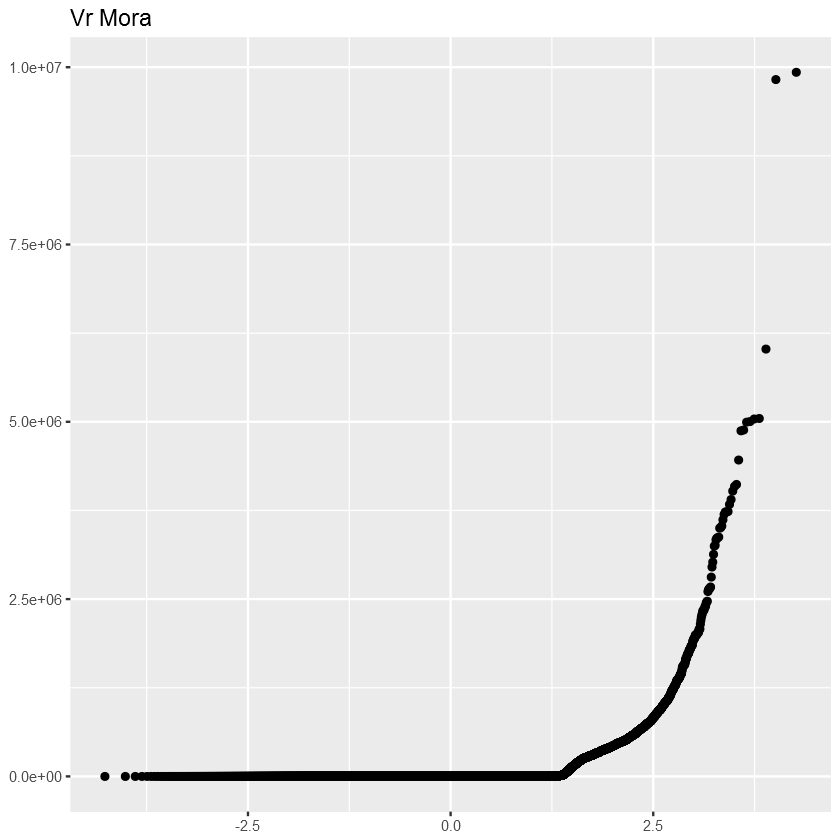

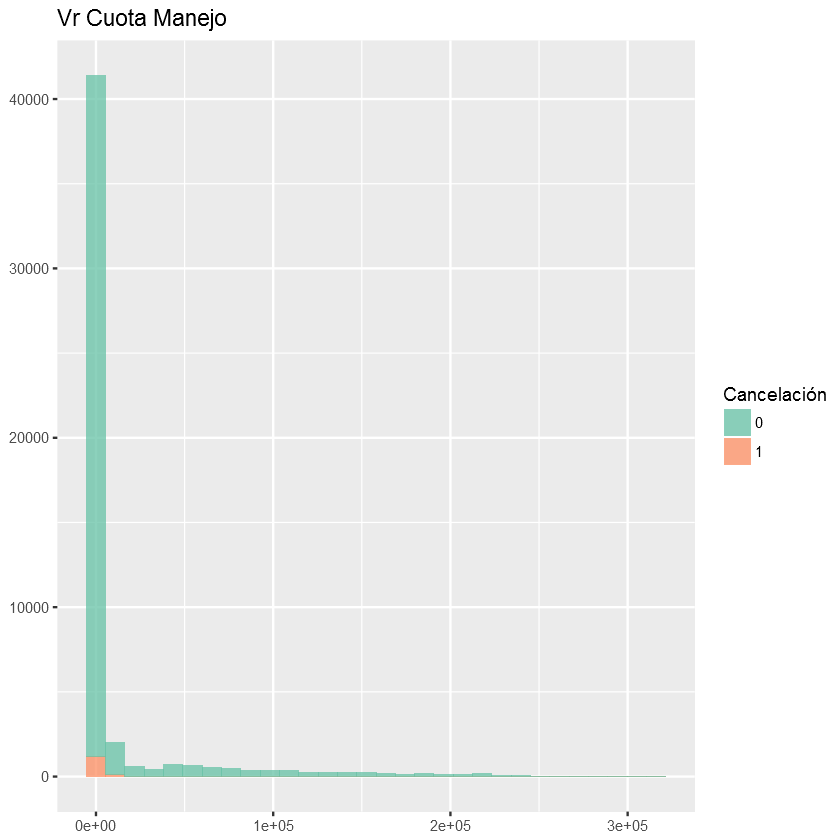

Warning message:
: Transformation introduced infinite values in continuous x-axis

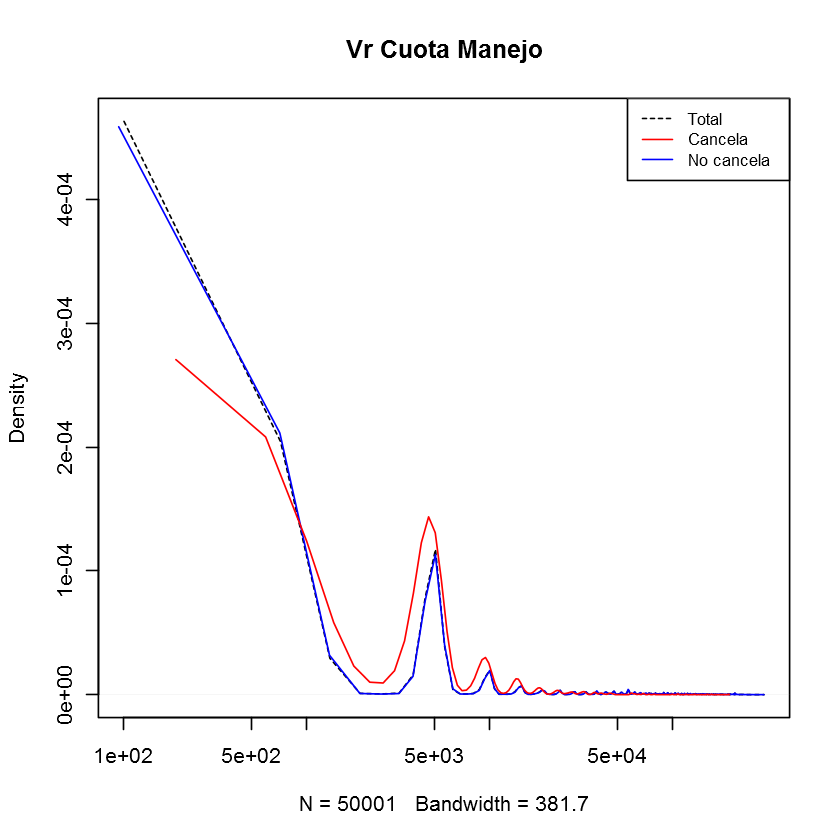

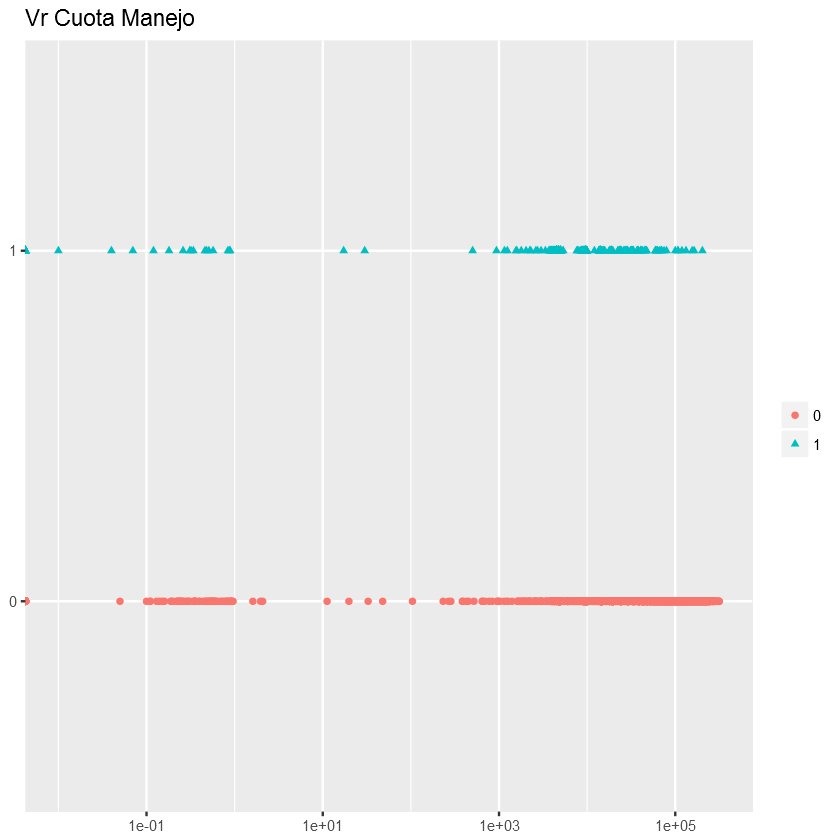

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
In xy.coords(x, y, xlabel, ylabel, log): 4 x values <= 0 omitted from logarithmic plot

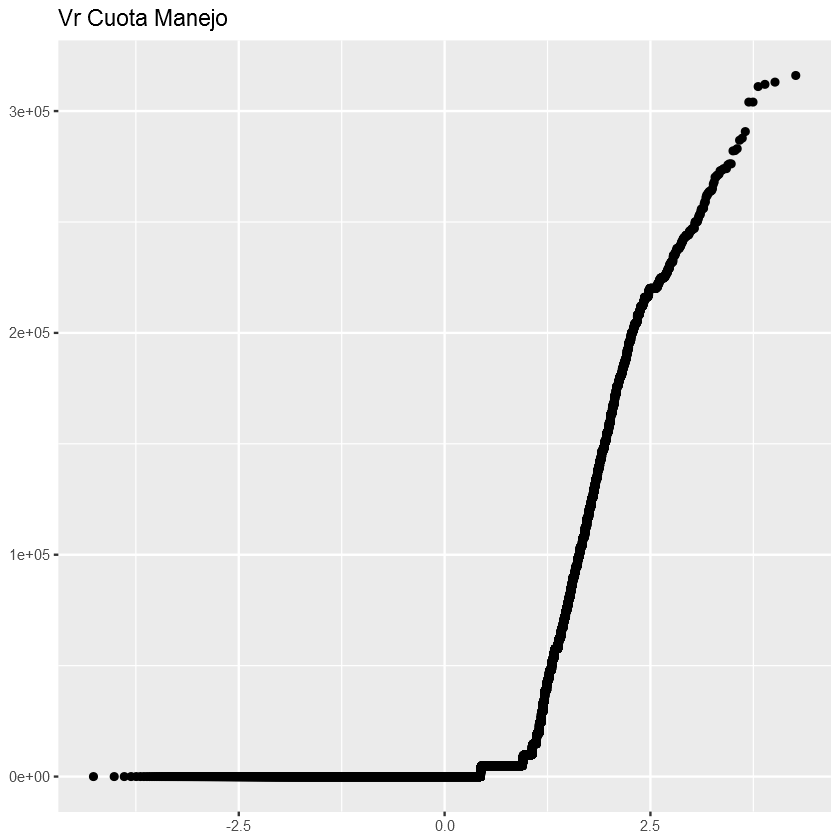

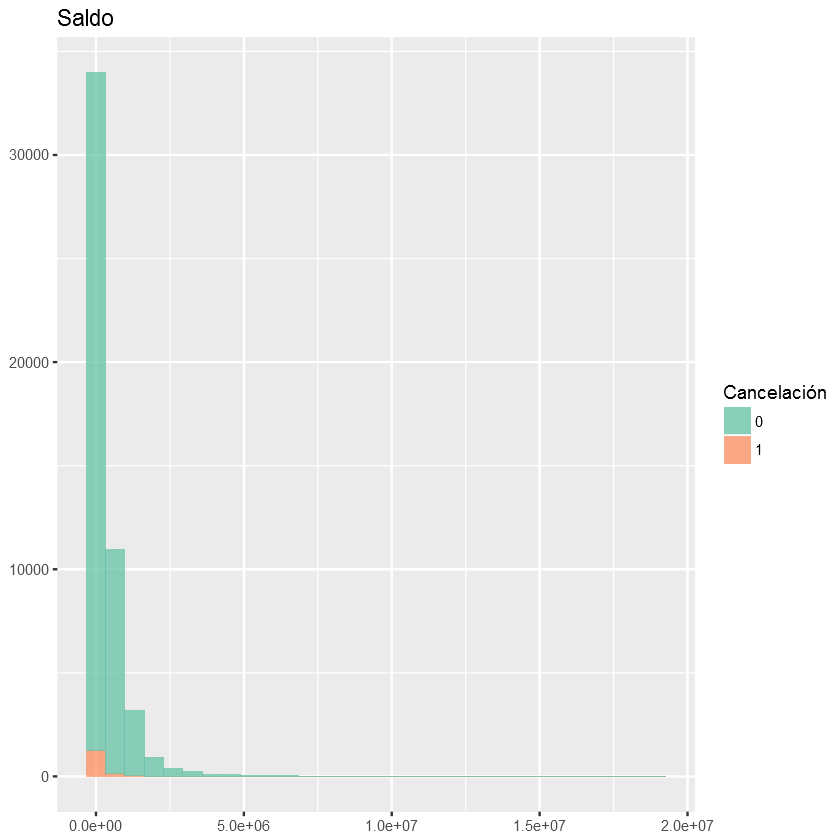

Warning message:
: Transformation introduced infinite values in continuous x-axis

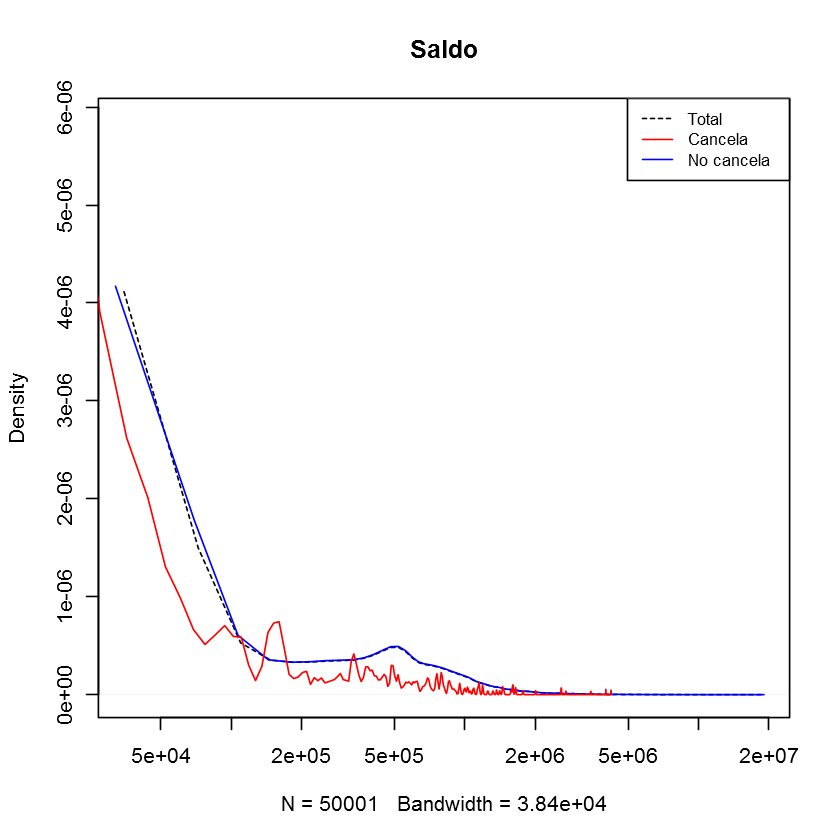

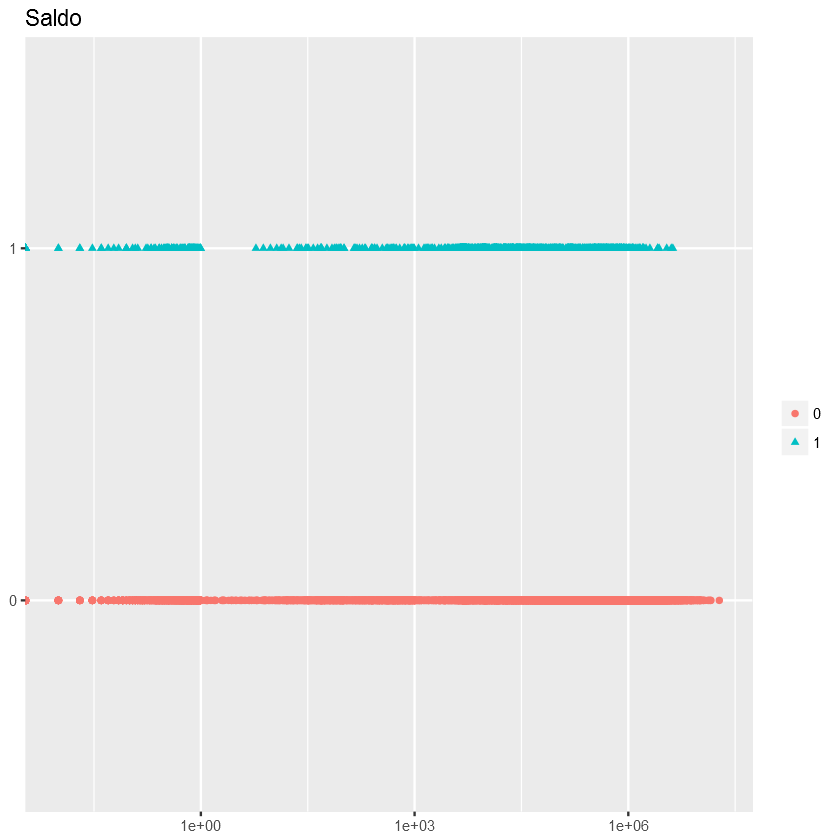

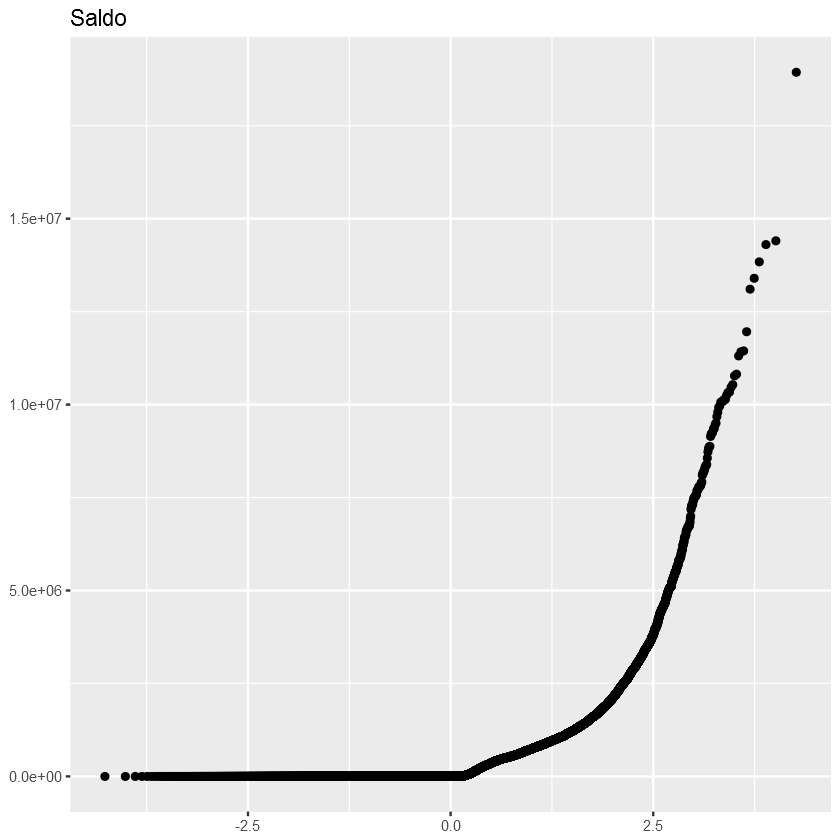

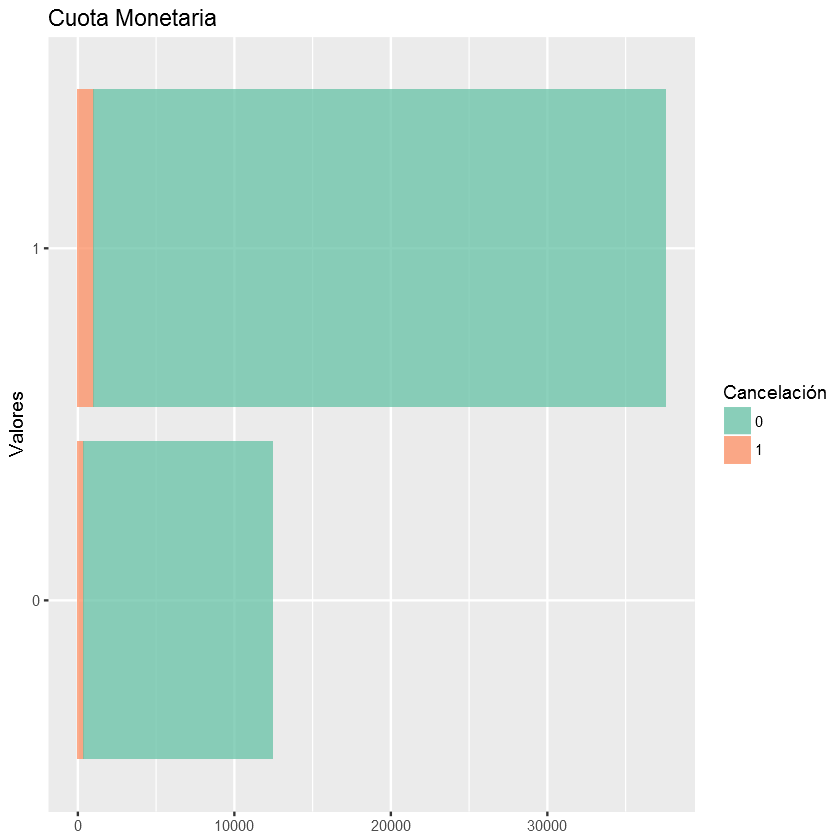

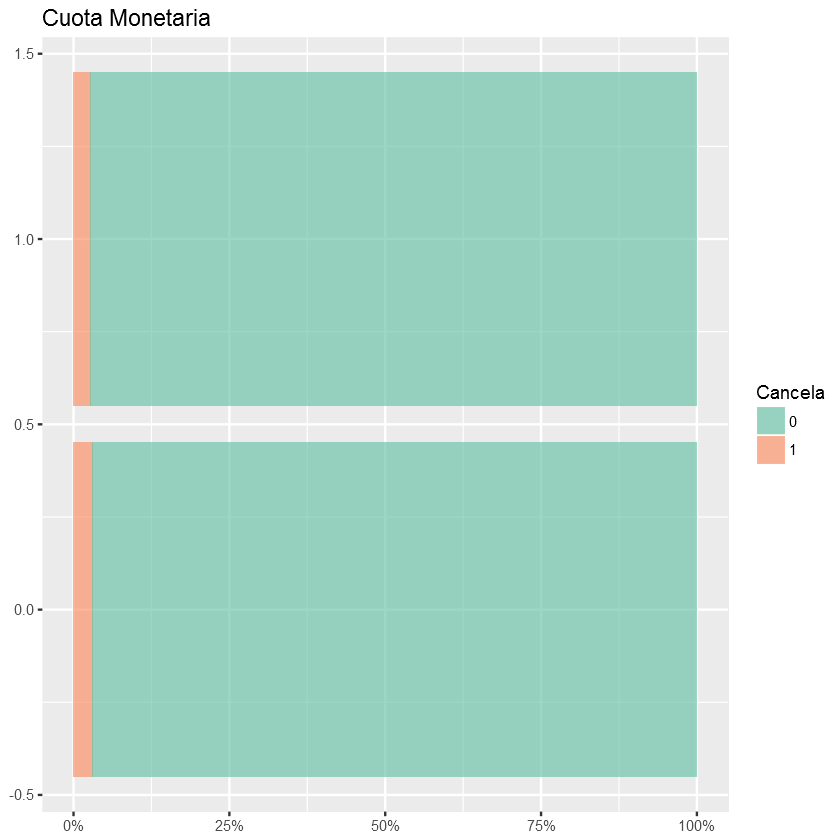

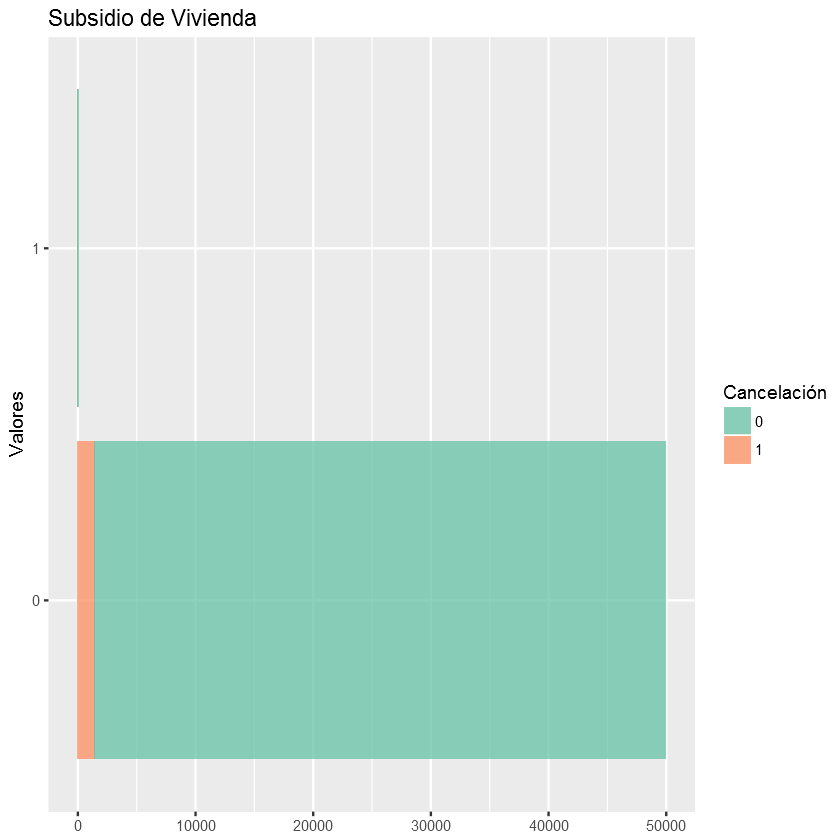

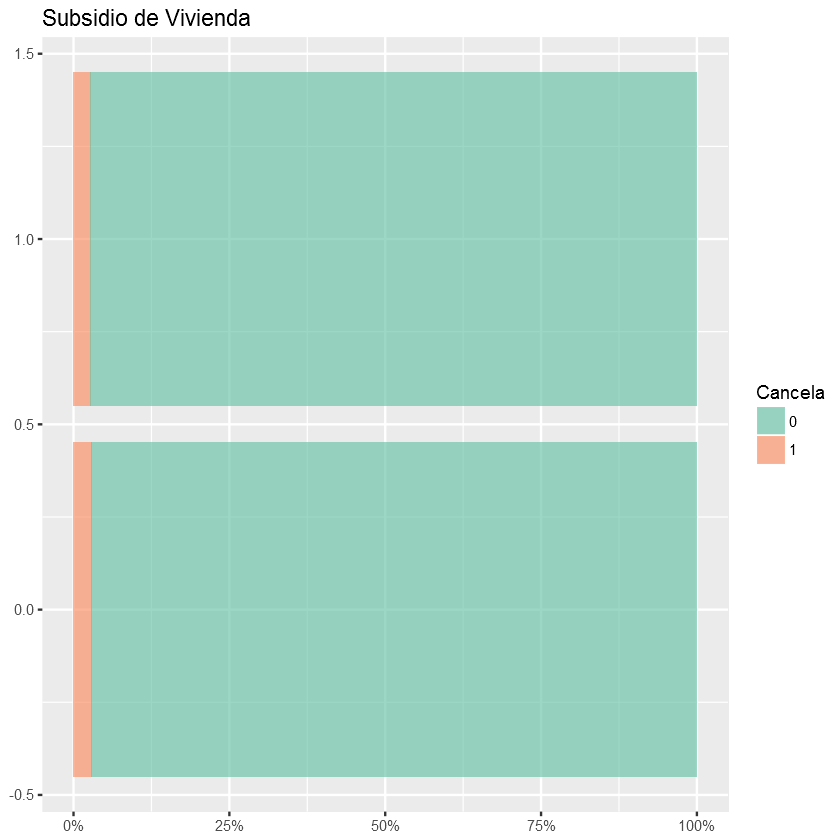

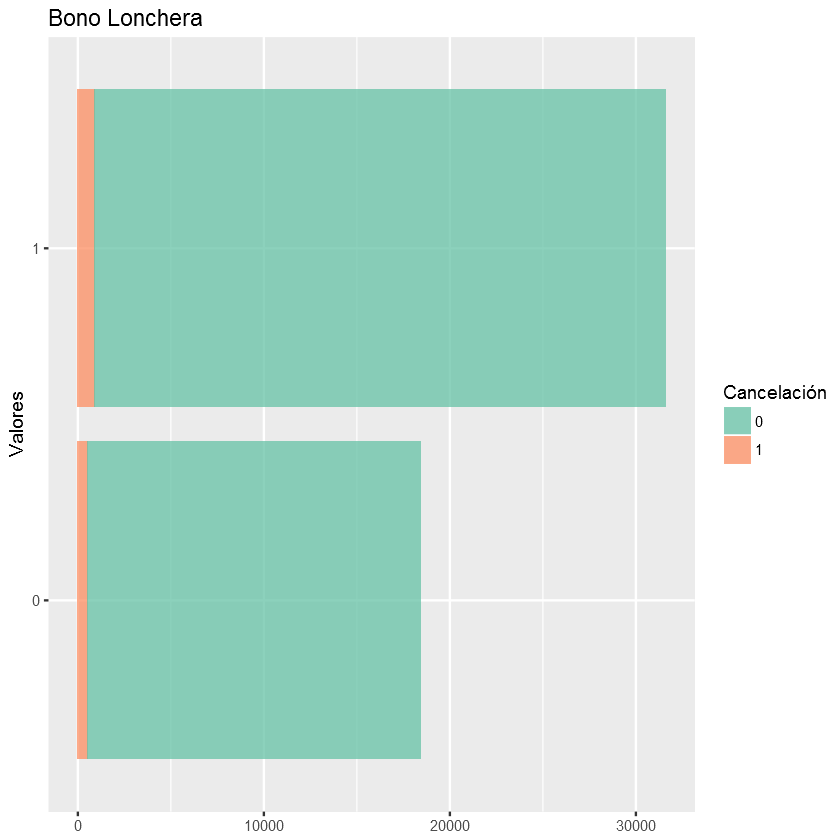

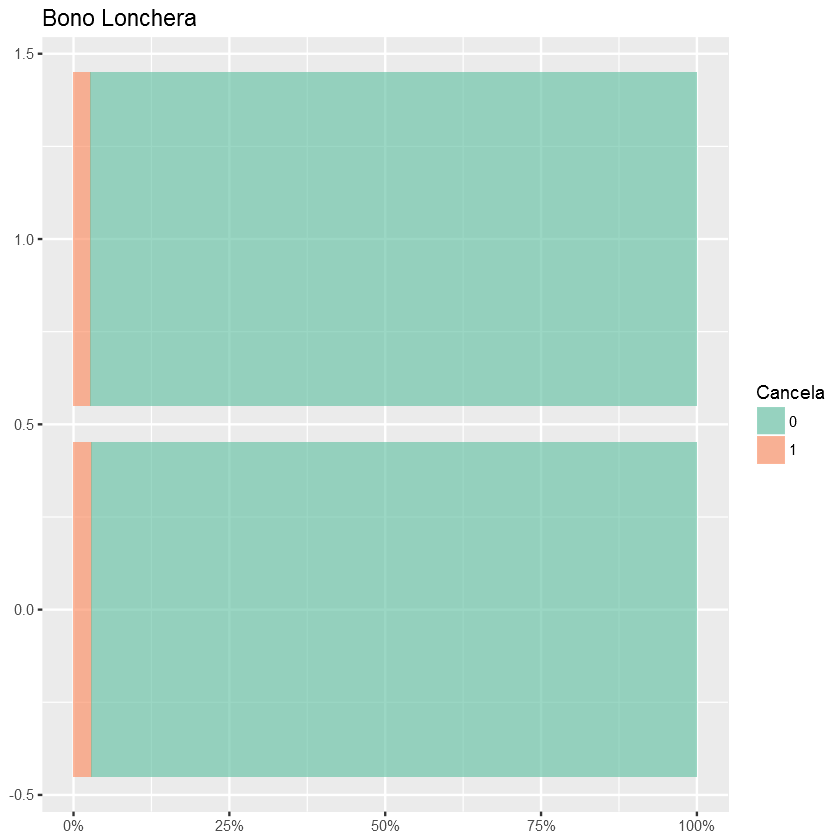

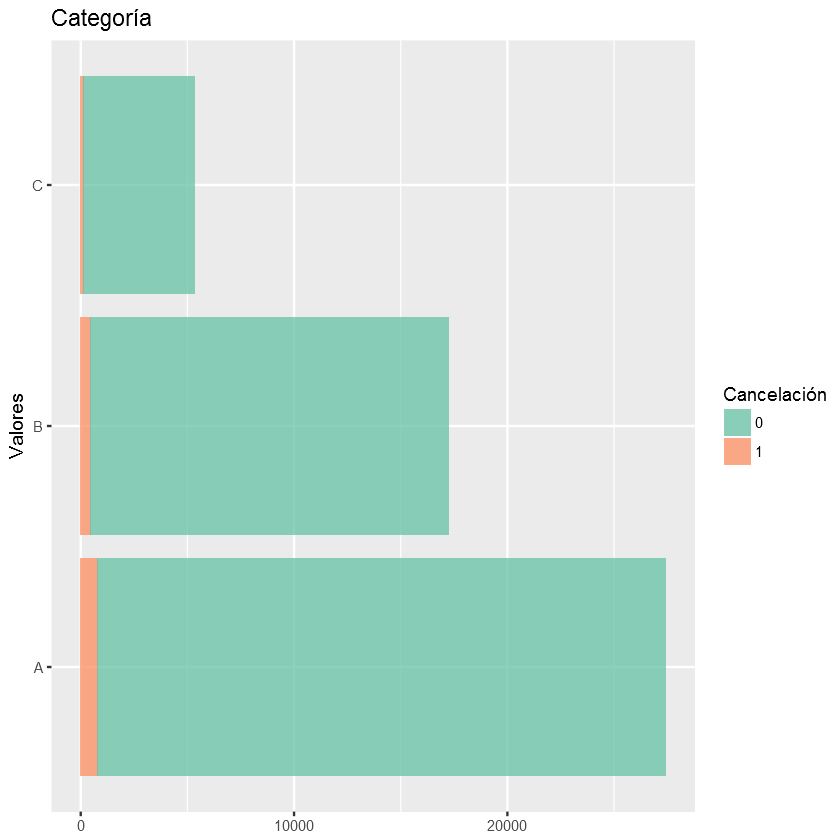

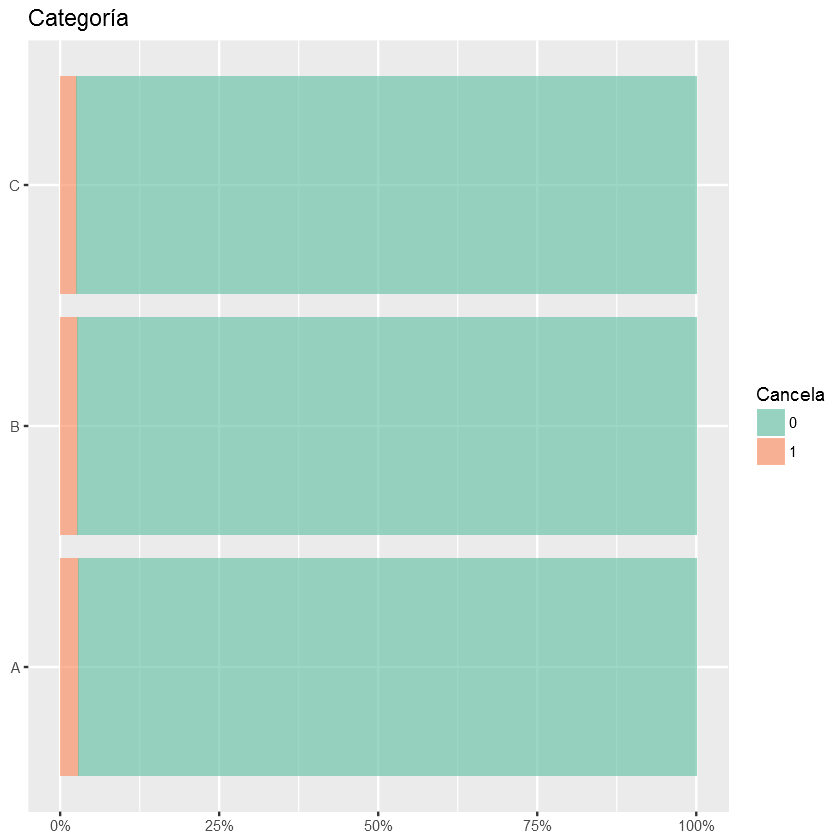

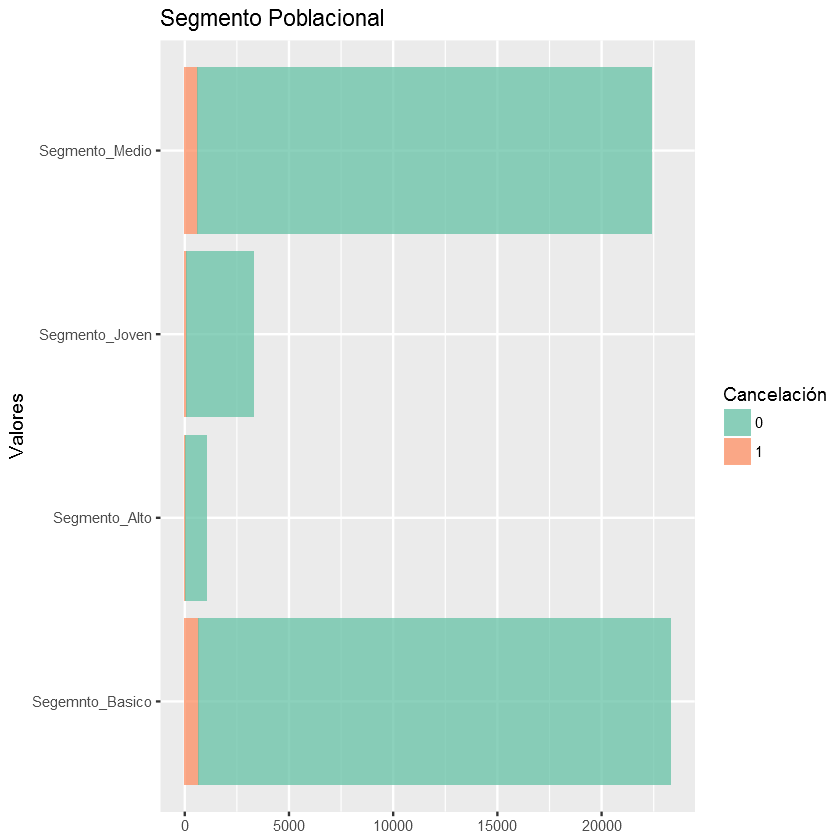

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


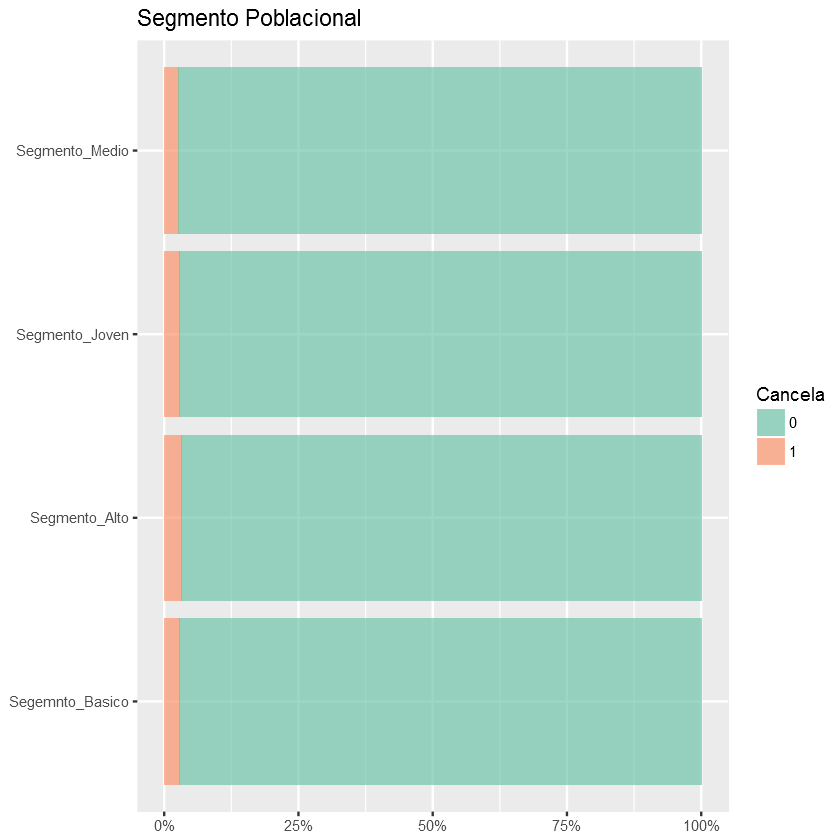

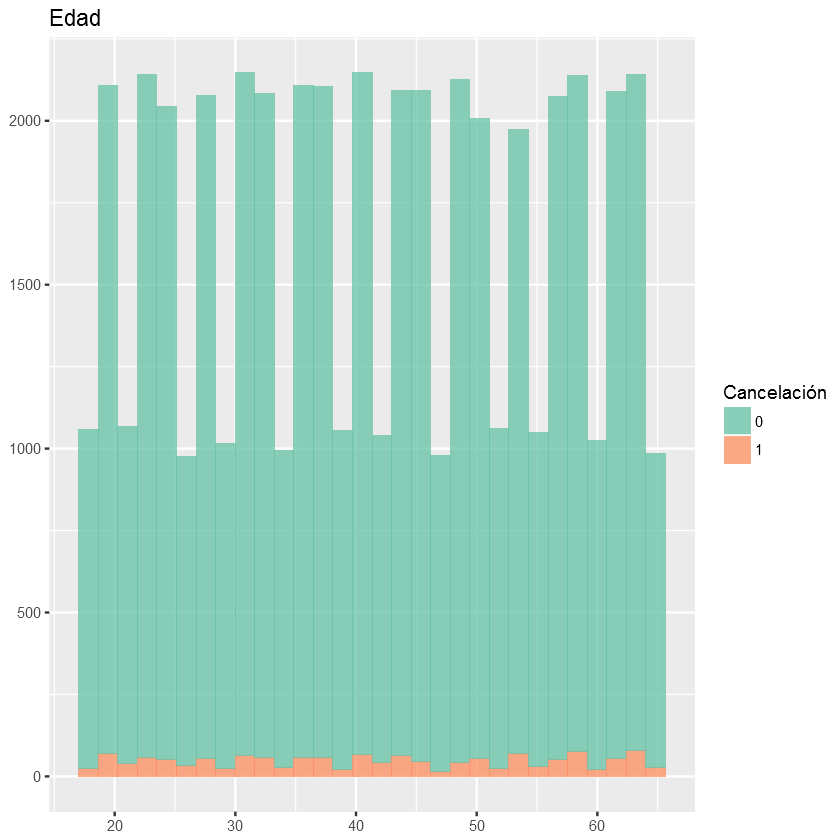

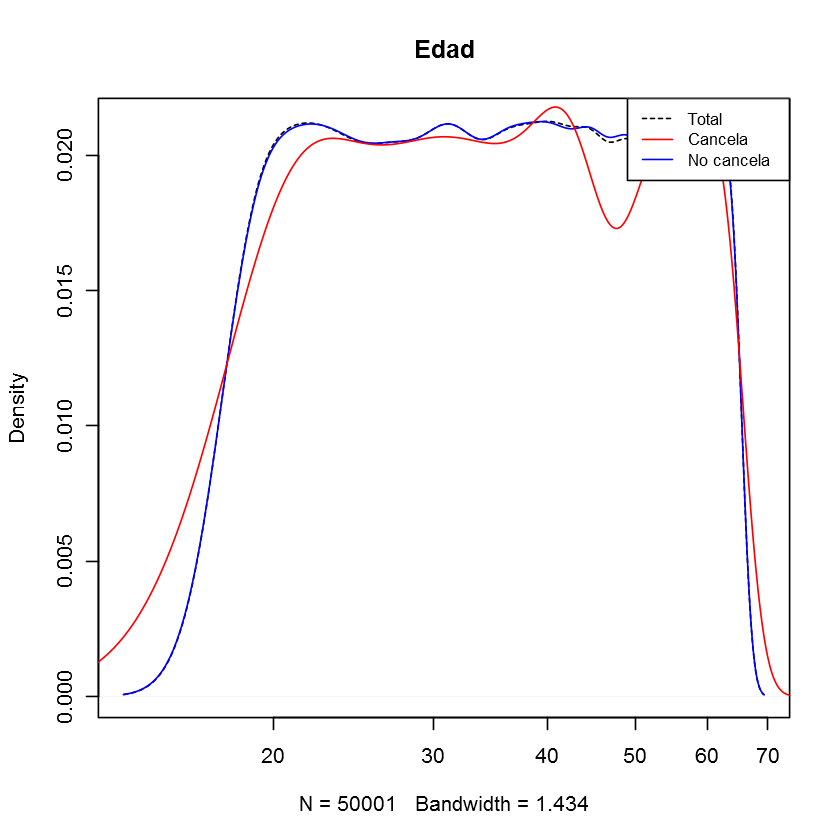

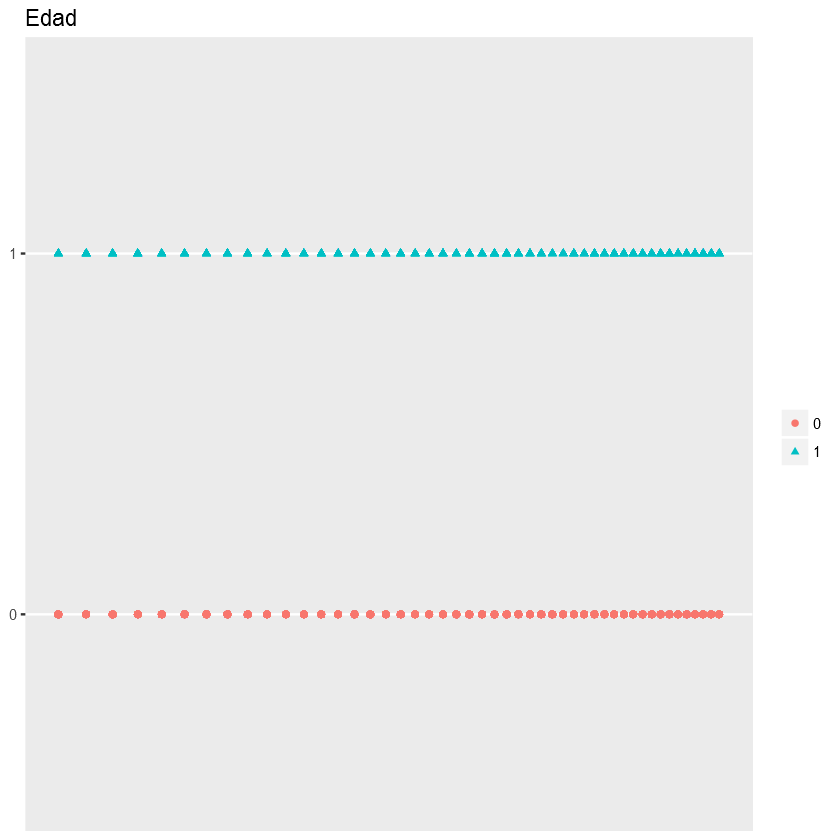

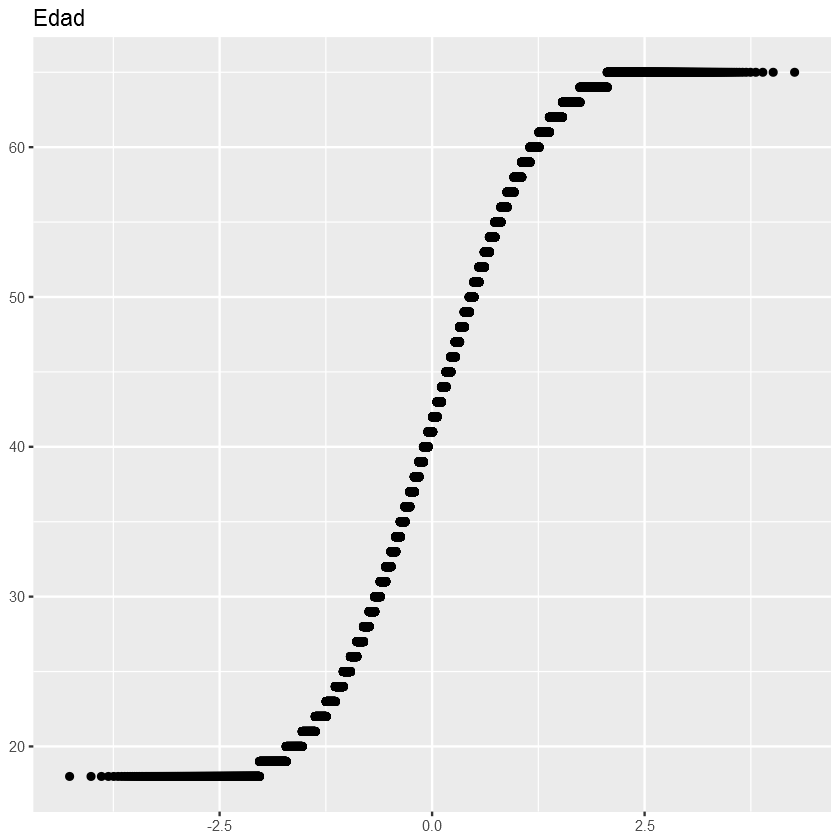

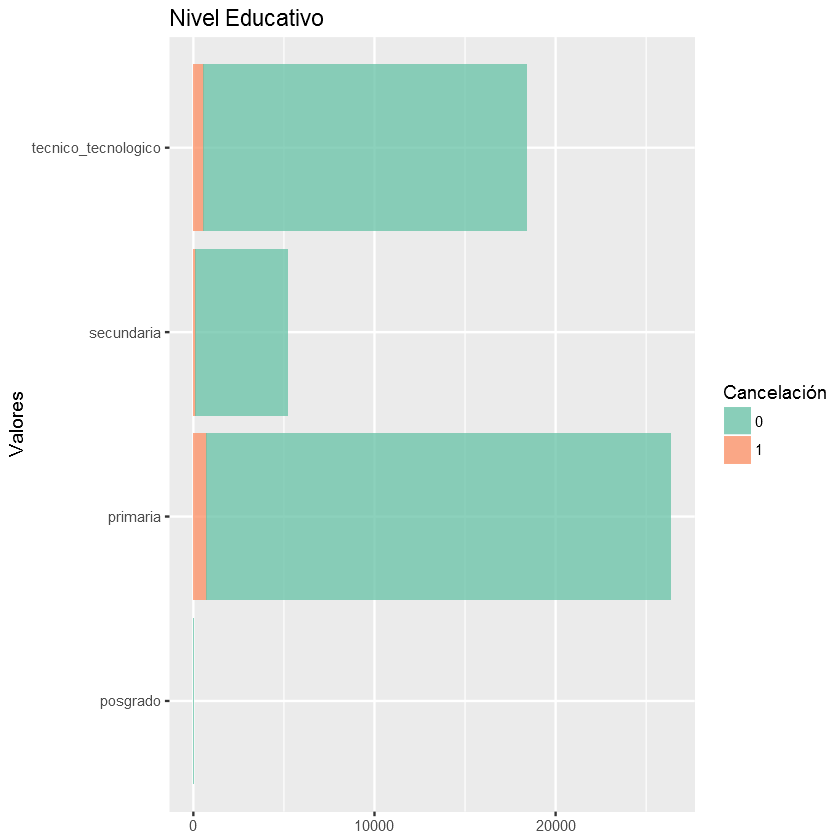

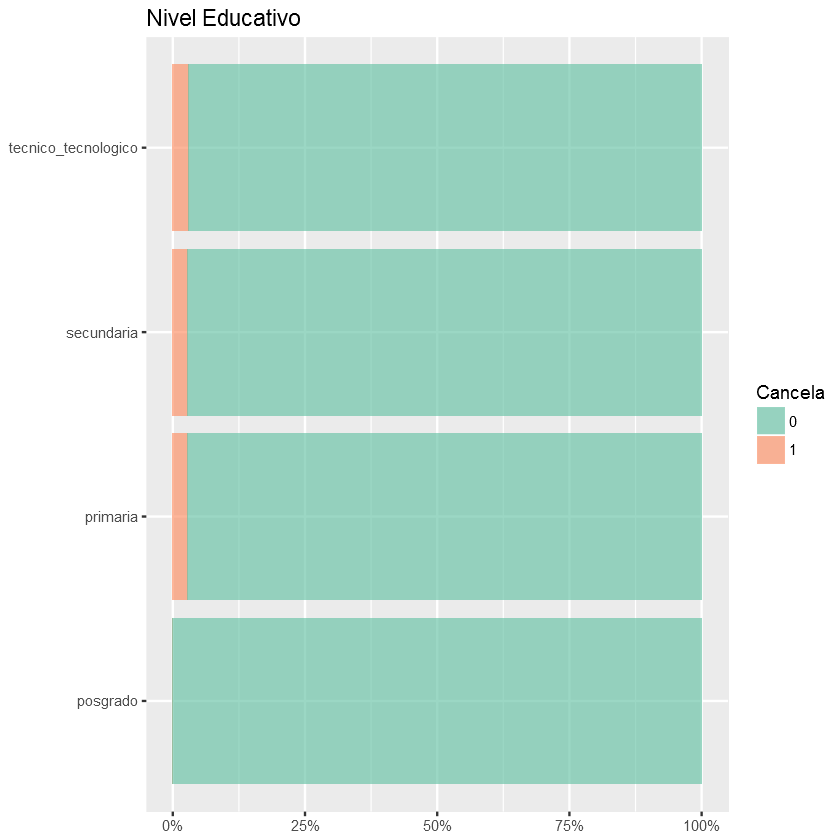

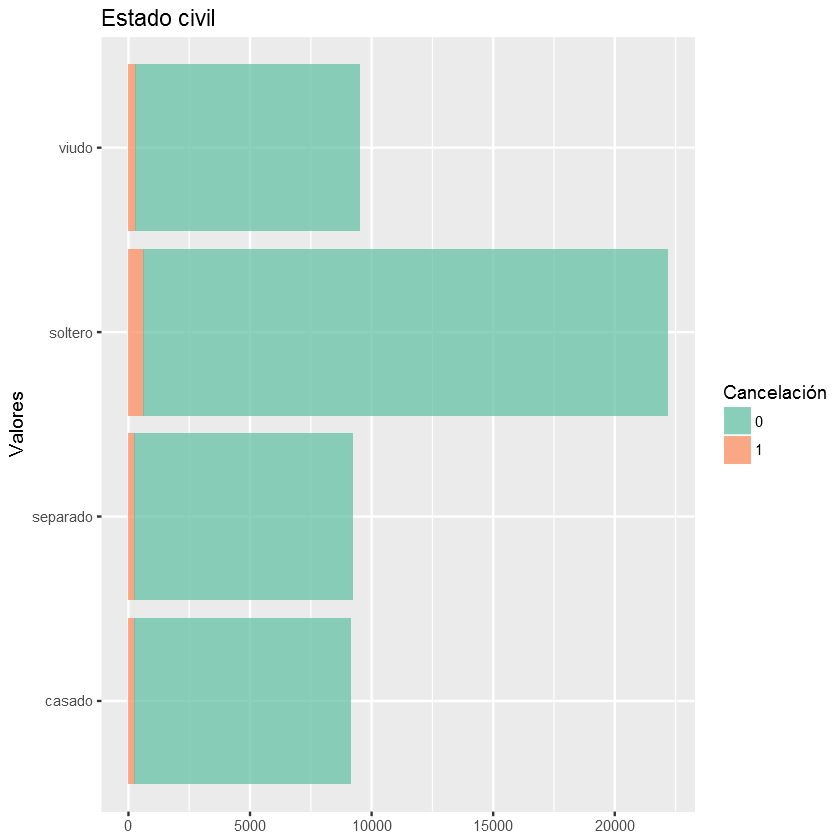

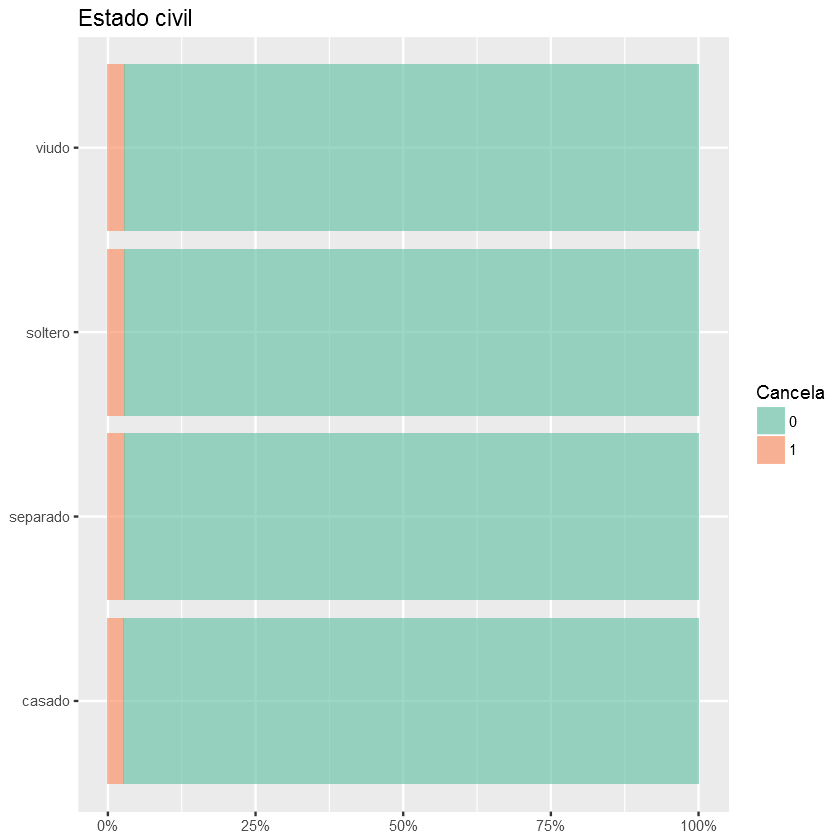

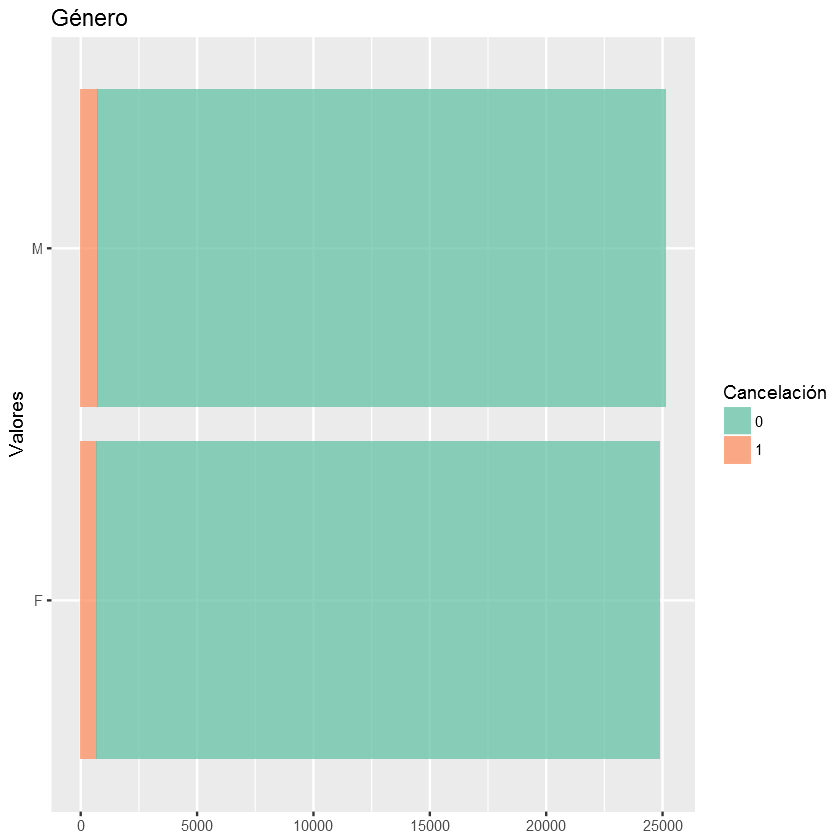

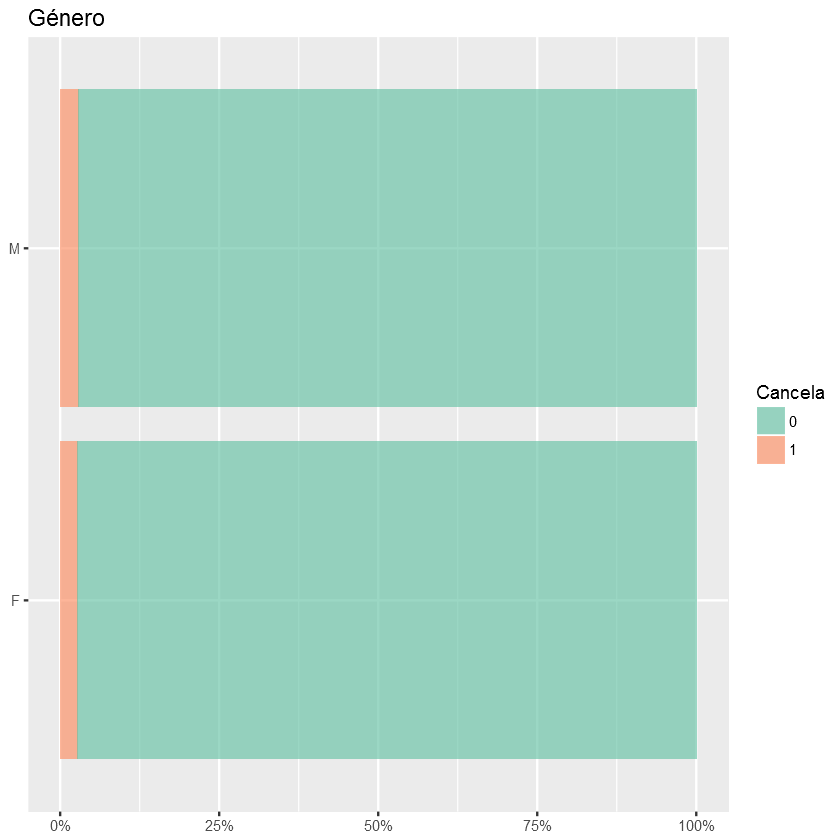

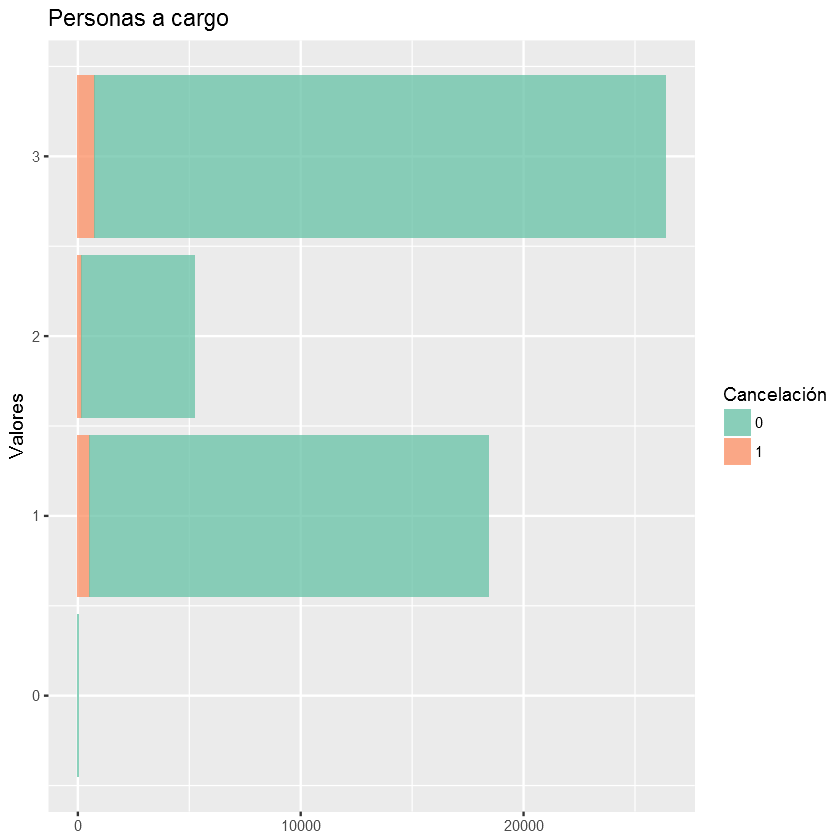

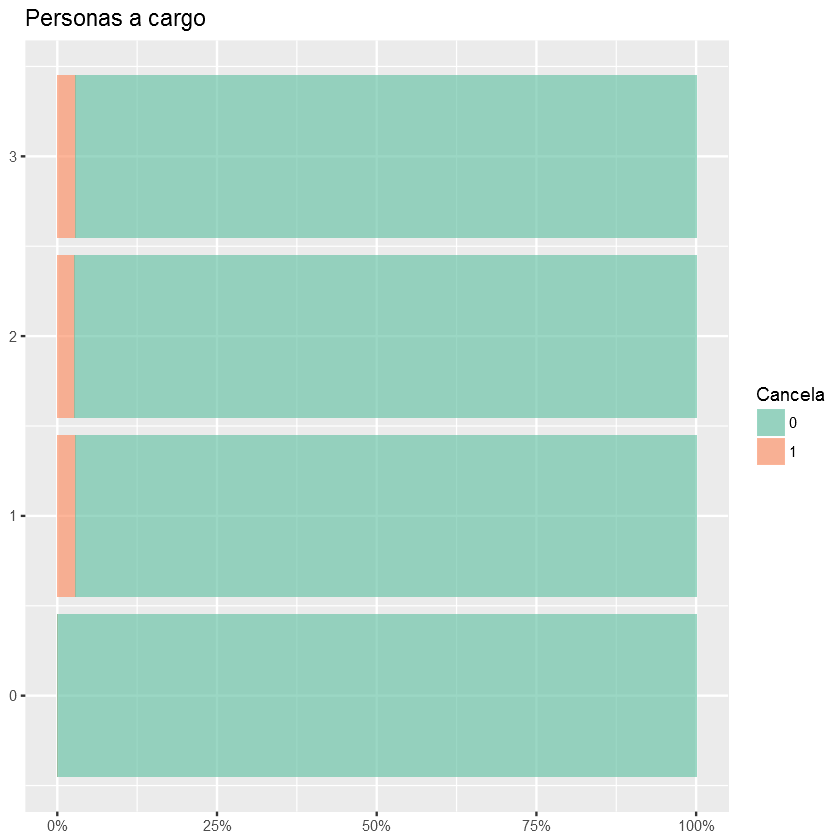

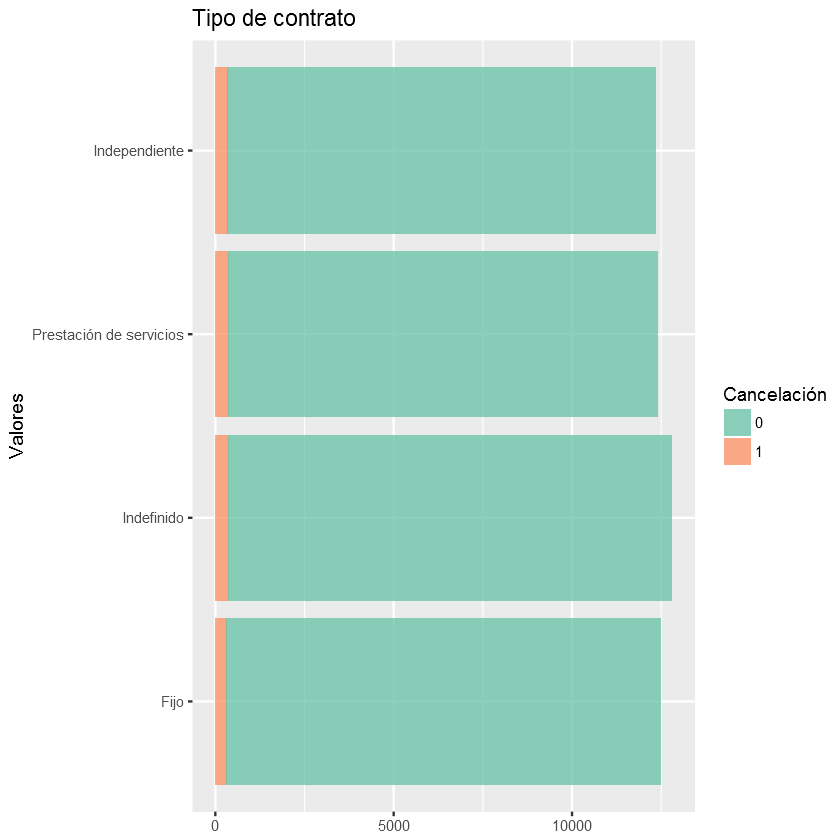

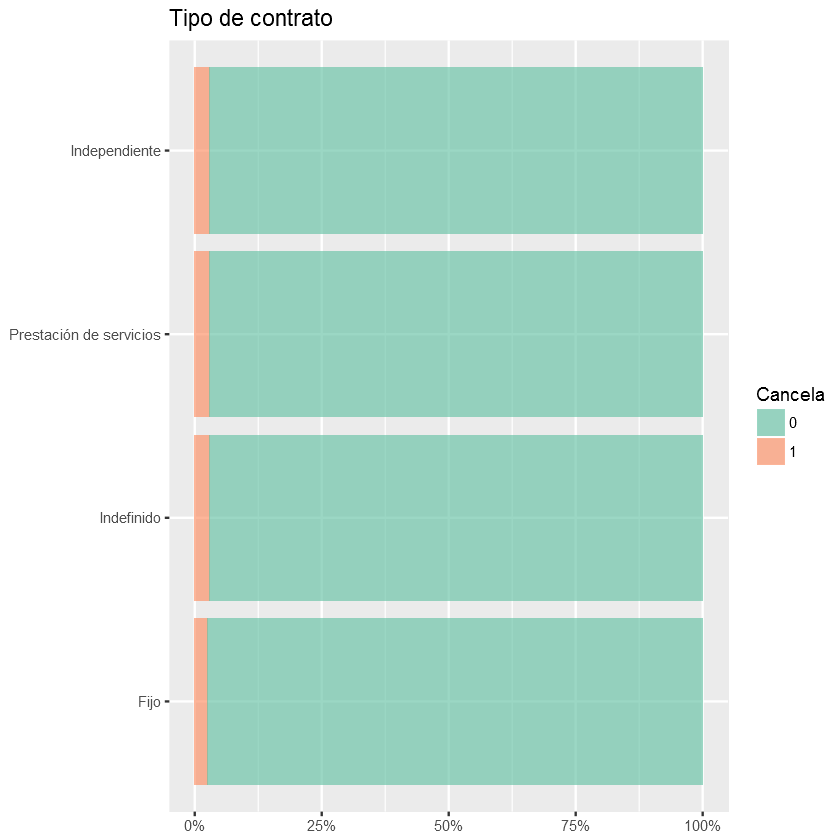

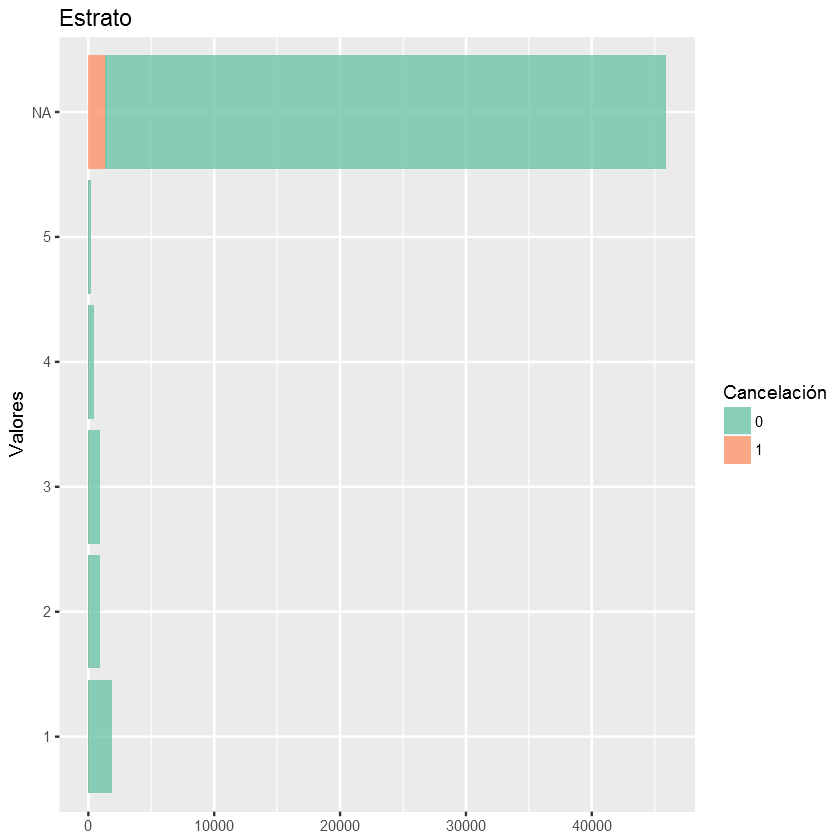

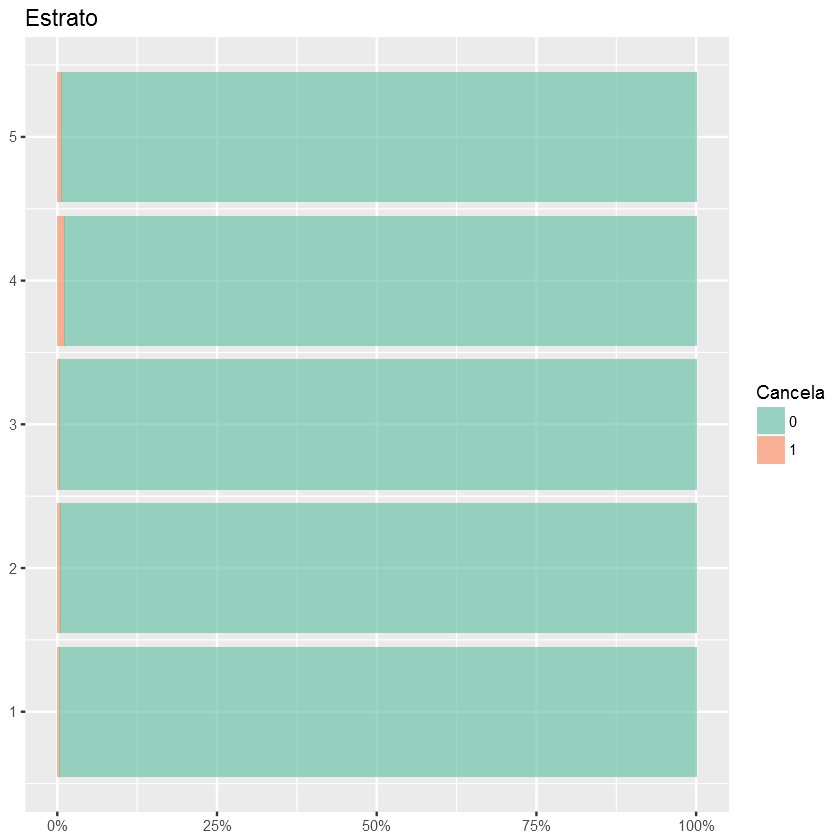

In [155]:
Xy_data=data.frame(X_train,y_train)
data=Xy_data
#data=X_train
nm <- names(X_train)

for (i in seq_along(nm)) {
        if (X_dic_dat$dat_type[i]=="num"|X_dic_dat$dat_type[i]=="date"){
            print(
                ggplot(data,aes_string(x = nm[i]))+
                  geom_histogram(alpha = .75,aes(fill = y_train))+
                  scale_fill_brewer(palette="Set2")+
                  guides(fill=guide_legend(title="Cancelación"))+
                  theme(axis.title.x=element_blank())+
                  theme(axis.title.y=element_blank())+
                  #coord_flip()+
                  labs(title=X_dic_dat$text_var[i])#, subtitle=estruct$Escala[i])
                )
            plot(density(as.numeric(data[,i])), main=X_dic_dat$text_var[i],log="x", lty=2)
            lines(density(as.numeric(data[,i])[y_train==0]), col="blue")
            lines(density(as.numeric(data[,i])[y_train==1]), col="red")
            legend("topright", legend=c("Total", "Cancela", "No cancela"), col=c("black","red", "blue"), lty=c(2,1,1), cex=0.8)
            
            data[,i]=as.numeric(data[,i])
            print(
                ggplot(data,aes_string(x = nm[i], y=y_train, shape=y_train, color=y_train))+
                geom_point()+
                scale_fill_brewer(palette="Set2")+
                theme(legend.title=element_blank())+
                theme(axis.title.x=element_blank())+
                theme(axis.title.y=element_blank())+
                scale_x_continuous(trans='log10') +
                #coord_flip()+
                labs(title=X_dic_dat$text_var[i])#, subtitle=estruct$Escala[i])
                )

            print(
                ggplot(data, aes_string(sample = nm[i]))+#, shape=y_train, color=y_train))+
                stat_qq()+
                scale_fill_brewer(palette="Set2")+
                theme(legend.title=element_blank())+
                theme(axis.title.x=element_blank())+
                theme(axis.title.y=element_blank())+
                labs(title=X_dic_dat$text_var[i])#, subtitle=estruct$Escala[i])
            )

#                   ggsave(paste(nm[i],".jpeg"), width = size_pic_w, height = size_pic_h)
        }
        if (X_dic_dat$dat_type[i]=="factor"){
            print(
                ggplot(data,aes_string(x = nm[i]))+
                  geom_bar(stat="count",alpha = .75,aes(fill = y_train))+
                  scale_fill_brewer(palette="Set2")+
                  guides(fill=guide_legend(title="Cancelación"))+
                  theme(axis.title.x=element_blank())+
                  xlab("Valores")+
                  #theme(axis.title.y=element_blank())+
                  coord_flip()+
                  labs(title=X_dic_dat$text_var[i])
            )
            prop_melt=melt(prop.table(table(y_train,data[,i])))
            colnames(prop_melt)=c("Cancela","Valores","Proporción")
            prop_melt$Cancela=factor(prop_melt$Cancela)
            print(
                ggplot(prop_melt,aes(x = Valores, y=Proporción,fill=Cancela))+
                scale_fill_brewer(palette="Set2")+
                geom_bar(position = "fill",stat = "identity",alpha = .65) + 
                scale_y_continuous(labels = percent_format())+
                theme(axis.title.x=element_blank())+
                theme(axis.title.y=element_blank())+
                labs(title=X_dic_dat$text_var[i])+
                coord_flip()
            )

#                   ggsave(paste(nm[i],".jpeg"), width = size_pic_w, height = size_pic_h)
        }
  }

### 1.2 Conclusiones
- Las distribuciones de las variables sugieren que las distribuciones no son normales para los datos numéricos. Los histogranas se presentaron sin escalar, mientras que las distribuciones y para los gráficos de dispersión se hace necesario representarlos en escala logarítmica(base 10) para visualizar los valores sin la distorsión de los datos extremos.
- Se observa un problema de clases desbalanceadas en el Target, especialmente en las proporciones de datos en las variables categóricas, donde las franjas de datos de target=1 son muy delgadas. 

## 2.1 Tablas de frecuencia y pruebas de independencia

Una vez visualizados los datos se analizan en términos de sus distribuciones. Validar si las variables continuas cumplen el presupuesto de normalidad permite aplicar pruebas estadísticas paramétricas que indiquen su calidad como predictor del valor en Target; caso contrario se determina el análisis no paramétrico más pertinente. Por otro lado, evaluar las distribuciones permiten identificar si son linealmente separables, con lo cual los algoritmos de machine learning tienen mayor probabilidad de éxito en la clasificación.
Las pruebas de independencia también dan información respecto a la calidad de la variable en relación a los valores del target. Para las variables numéricas se aplica prueba T de student (y se interpreta siempre y cuando la distribución sea normal); las variables categóricas se prueban con chi cuadrado.
Para todas las variables se aplica test de significancia para la correlación de pearson.

In [161]:
Xy_data=data.frame(X_train,y_train)
data=Xy_data
#data=X_train
nm <- names(X_train)

for (i in seq_along(nm)) {
    print("***********")
        if (X_dic_dat$dat_type[i]=="num"|X_dic_dat$dat_type[i]=="date"){
            print(X_dic_dat$nm_var[i])
            print (summary(data[,i]))
            print (paste("Desviación estándar",sd(data[,i],na.rm=T)))
            norm_test=ks.test(as.numeric(data[,i]), "pnorm", mean(as.numeric(data[,i])),sd(as.numeric(data[,i])))
            print(norm_test)

#                   ggsave(paste(nm[i],".jpeg"), width = size_pic_w, height = size_pic_h)
        }
        if (X_dic_dat$dat_type[i]=="factor"){
            proporciones=round(100*(prop.table(table(y_train,data[,i]))),2)
            proporciones=cbind(proporciones,margin.table(proporciones,1))
            proporciones=rbind(proporciones,margin.table(proporciones,2))
            proporciones[proporciones=="NaN"]=0
            print(X_dic_dat$nm_var[i])
            print(proporciones)
            chisq_test=chisq.test(y_train,data[,i])
            print(chisq_test)
            
             }
  }

[1] "***********"
[1] fech_exped
35 Levels: bono_lonchera cancelacion cat_afil cons_ms_nt ... val_mora
                 Min.               1st Qu.                Median 
"2006-10-31 00:00:00" "2010-09-03 00:00:00" "2013-06-06 00:00:00" 
                 Mean               3rd Qu.                  Max. 
"2013-03-06 13:22:57" "2016-02-26 00:00:00" "2018-04-01 00:00:00" 
[1] "Desviación estándar 104156678.324906"


Warning message:
In ks.test(as.numeric(data[, i]), "pnorm", mean(as.numeric(data[, : ties should not be present for the Kolmogorov-Smirnov test


	One-sample Kolmogorov-Smirnov test

data:  as.numeric(data[, i])
D = 0.071309, p-value < 2.2e-16
alternative hypothesis: two-sided

[1] "***********"
[1] fech_proceso
35 Levels: bono_lonchera cancelacion cat_afil cons_ms_nt ... val_mora
                 Min.               1st Qu.                Median 
"2017-01-01 00:00:00" "2018-04-01 00:00:00" "2018-04-01 00:00:00" 
                 Mean               3rd Qu.                  Max. 
"2018-03-24 16:50:34" "2018-04-01 00:00:00" "2018-04-01 00:00:00" 
[1] "Desviación estándar 4171646.22318871"


Warning message:
In ks.test(as.numeric(data[, i]), "pnorm", mean(as.numeric(data[, : ties should not be present for the Kolmogorov-Smirnov test


	One-sample Kolmogorov-Smirnov test

data:  as.numeric(data[, i])
D = 0.53183, p-value < 2.2e-16
alternative hypothesis: two-sided

[1] "***********"
[1] disp_avan
35 Levels: bono_lonchera cancelacion cat_afil cons_ms_nt ... val_mora
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       0    67930   165000   381000   389400 16500000 
[1] "Desviación estándar 707450.156395552"


Warning message:
In ks.test(as.numeric(data[, i]), "pnorm", mean(as.numeric(data[, : ties should not be present for the Kolmogorov-Smirnov test


	One-sample Kolmogorov-Smirnov test

data:  as.numeric(data[, i])
D = 0.29511, p-value < 2.2e-16
alternative hypothesis: two-sided

[1] "***********"
[1] lim_avances
35 Levels: bono_lonchera cancelacion cat_afil cons_ms_nt ... val_mora
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   45000   150000   225000   476400   512000 16500000 
[1] "Desviación estándar 732454.62361876"


Warning message:
In ks.test(as.numeric(data[, i]), "pnorm", mean(as.numeric(data[, : ties should not be present for the Kolmogorov-Smirnov test


	One-sample Kolmogorov-Smirnov test

data:  as.numeric(data[, i])
D = 0.27796, p-value < 2.2e-16
alternative hypothesis: two-sided

[1] "***********"
[1] tot_intereses
35 Levels: bono_lonchera cancelacion cat_afil cons_ms_nt ... val_mora
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0   26640    8053 4529000 
[1] "Desviación estándar 114060.460877858"


Warning message:
In ks.test(as.numeric(data[, i]), "pnorm", mean(as.numeric(data[, : ties should not be present for the Kolmogorov-Smirnov test


	One-sample Kolmogorov-Smirnov test

data:  as.numeric(data[, i])
D = 0.40767, p-value < 2.2e-16
alternative hypothesis: two-sided

[1] "***********"
[1] sald_ms_nt
35 Levels: bono_lonchera cancelacion cat_afil cons_ms_nt ... val_mora
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       0        0        1   341600   501700 18930000 
[1] "Desviación estándar 716943.947847056"


Warning message:
In ks.test(as.numeric(data[, i]), "pnorm", mean(as.numeric(data[, : ties should not be present for the Kolmogorov-Smirnov test


	One-sample Kolmogorov-Smirnov test

data:  as.numeric(data[, i])
D = 0.31687, p-value < 2.2e-16
alternative hypothesis: two-sided

[1] "***********"
[1] pg_ms_nt
35 Levels: bono_lonchera cancelacion cat_afil cons_ms_nt ... val_mora
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       0        0        0    39980     4948 13880000 
[1] "Desviación estándar 196189.185824578"


Warning message:
In ks.test(as.numeric(data[, i]), "pnorm", mean(as.numeric(data[, : ties should not be present for the Kolmogorov-Smirnov test


	One-sample Kolmogorov-Smirnov test

data:  as.numeric(data[, i])
D = 0.41926, p-value < 2.2e-16
alternative hypothesis: two-sided

[1] "***********"
[1] cons_ms_nt
35 Levels: bono_lonchera cancelacion cat_afil cons_ms_nt ... val_mora
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       0        0        0    26960        0 13880000 
[1] "Desviación estándar 181948.627936983"


Warning message:
In ks.test(as.numeric(data[, i]), "pnorm", mean(as.numeric(data[, : ties should not be present for the Kolmogorov-Smirnov test


	One-sample Kolmogorov-Smirnov test

data:  as.numeric(data[, i])
D = 0.44422, p-value < 2.2e-16
alternative hypothesis: two-sided

[1] "***********"
[1] dias_mora
35 Levels: bono_lonchera cancelacion cat_afil cons_ms_nt ... val_mora
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00    0.00   90.32    0.00 4050.00 
[1] "Desviación estándar 410.590223705149"


Warning message:
In ks.test(as.numeric(data[, i]), "pnorm", mean(as.numeric(data[, : ties should not be present for the Kolmogorov-Smirnov test


	One-sample Kolmogorov-Smirnov test

data:  as.numeric(data[, i])
D = 0.46882, p-value < 2.2e-16
alternative hypothesis: two-sided

[1] "***********"
[1] cup_lim
35 Levels: bono_lonchera cancelacion cat_afil cons_ms_nt ... val_mora
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
1.500e+05 5.000e+05 7.500e+05 1.266e+06 1.288e+06 1.400e+09 
[1] "Desviación estándar 6481919.73681752"


Warning message:
In ks.test(as.numeric(data[, i]), "pnorm", mean(as.numeric(data[, : ties should not be present for the Kolmogorov-Smirnov test


	One-sample Kolmogorov-Smirnov test

data:  as.numeric(data[, i])
D = 0.43168, p-value < 2.2e-16
alternative hypothesis: two-sided

[1] "***********"
[1] pag_ms_nt
35 Levels: bono_lonchera cancelacion cat_afil cons_ms_nt ... val_mora
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       0        0        0    13240        0 10630000 
[1] "Desviación estándar 131976.915206468"


Warning message:
In ks.test(as.numeric(data[, i]), "pnorm", mean(as.numeric(data[, : ties should not be present for the Kolmogorov-Smirnov test


	One-sample Kolmogorov-Smirnov test

data:  as.numeric(data[, i])
D = 0.46004, p-value < 2.2e-16
alternative hypothesis: two-sided

[1] "***********"
[1] pag_min
35 Levels: bono_lonchera cancelacion cat_afil cons_ms_nt ... val_mora
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       0        0        0   126800    53870 18930000 
[1] "Desviación estándar 418014.360156346"


Warning message:
In ks.test(as.numeric(data[, i]), "pnorm", mean(as.numeric(data[, : ties should not be present for the Kolmogorov-Smirnov test


	One-sample Kolmogorov-Smirnov test

data:  as.numeric(data[, i])
D = 0.38084, p-value < 2.2e-16
alternative hypothesis: two-sided

[1] "***********"
[1] val_mora
35 Levels: bono_lonchera cancelacion cat_afil cons_ms_nt ... val_mora
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0   33120       0 9929000 
[1] "Desviación estándar 180141.027451788"


Warning message:
In ks.test(as.numeric(data[, i]), "pnorm", mean(as.numeric(data[, : ties should not be present for the Kolmogorov-Smirnov test


	One-sample Kolmogorov-Smirnov test

data:  as.numeric(data[, i])
D = 0.45936, p-value < 2.2e-16
alternative hypothesis: two-sided

[1] "***********"
[1] val_cuot_man
35 Levels: bono_lonchera cancelacion cat_afil cons_ms_nt ... val_mora
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0   13840    4947  316100 
[1] "Desviación estándar 38806.3762388178"


Warning message:
In ks.test(as.numeric(data[, i]), "pnorm", mean(as.numeric(data[, : ties should not be present for the Kolmogorov-Smirnov test


	One-sample Kolmogorov-Smirnov test

data:  as.numeric(data[, i])
D = 0.41808, p-value < 2.2e-16
alternative hypothesis: two-sided

[1] "***********"
[1] sald_disp
35 Levels: bono_lonchera cancelacion cat_afil cons_ms_nt ... val_mora
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       0        0        1   340900   497700 18940000 
[1] "Desviación estándar 713711.445703782"


Warning message:
In ks.test(as.numeric(data[, i]), "pnorm", mean(as.numeric(data[, : ties should not be present for the Kolmogorov-Smirnov test


	One-sample Kolmogorov-Smirnov test

data:  as.numeric(data[, i])
D = 0.31646, p-value < 2.2e-16
alternative hypothesis: two-sided

[1] "***********"
[1] cuota_monetaria
35 Levels: bono_lonchera cancelacion cat_afil cons_ms_nt ... val_mora
      0     1       
0 24.15 73.03  97.18
1  0.77  2.05   2.82
  24.92 75.08 100.00

	Pearson's Chi-squared test with Yates' continuity correction

data:  y_train and data[, i]
X-squared = 4.6653, df = 1, p-value = 0.03078

[1] "***********"
[1] sub_vivenda
35 Levels: bono_lonchera cancelacion cat_afil cons_ms_nt ... val_mora
      0    1       
0 97.03 0.15  97.18
1  2.82 0.00   2.82
  99.85 0.15 100.00


Warning message:
In chisq.test(y_train, data[, i]): Chi-squared approximation may be incorrect


	Pearson's Chi-squared test with Yates' continuity correction

data:  y_train and data[, i]
X-squared = 1.0177e-25, df = 1, p-value = 1

[1] "***********"
[1] bono_lonchera
35 Levels: bono_lonchera cancelacion cat_afil cons_ms_nt ... val_mora
      0     1       
0 35.77 61.41  97.18
1  1.07  1.76   2.83
  36.84 63.17 100.01

	Pearson's Chi-squared test with Yates' continuity correction

data:  y_train and data[, i]
X-squared = 0.48275, df = 1, p-value = 0.4872

[1] "***********"
[1] cat_afil
35 Levels: bono_lonchera cancelacion cat_afil cons_ms_nt ... val_mora
      A     B     C       
0 53.23 33.56 10.39  97.18
1  1.59  0.95  0.28   2.82
  54.82 34.51 10.67 100.00

	Pearson's Chi-squared test

data:  y_train and data[, i]
X-squared = 1.6808, df = 2, p-value = 0.4315

[1] "***********"
[1] seg_pobl
35 Levels: bono_lonchera cancelacion cat_afil cons_ms_nt ... val_mora
  Segemnto_Basico Segmento_Alto Segmento_Joven Segmento_Medio       
0           45.26          2.00           6.39  

Warning message:
In ks.test(as.numeric(data[, i]), "pnorm", mean(as.numeric(data[, : ties should not be present for the Kolmogorov-Smirnov test


	One-sample Kolmogorov-Smirnov test

data:  as.numeric(data[, i])
D = 0.067233, p-value < 2.2e-16
alternative hypothesis: two-sided

[1] "***********"
[1] nivel_educativo
35 Levels: bono_lonchera cancelacion cat_afil cons_ms_nt ... val_mora
  posgrado primaria secundaria tecnico_tecnologico       
0     0.02    51.25      10.16               35.75  97.18
1     0.00     1.47       0.28                1.07   2.82
      0.02    52.72      10.44               36.82 100.00


Warning message:
In chisq.test(y_train, data[, i]): Chi-squared approximation may be incorrect


	Pearson's Chi-squared test

data:  y_train and data[, i]
X-squared = 0.91904, df = 3, p-value = 0.8208

[1] "***********"
[1] estado_civil
35 Levels: bono_lonchera cancelacion cat_afil cons_ms_nt ... val_mora
  casado separado soltero viudo       
0  17.77    17.89   43.10 18.42  97.18
1   0.50     0.52    1.26  0.55   2.83
   18.27    18.41   44.36 18.97 100.01

	Pearson's Chi-squared test

data:  y_train and data[, i]
X-squared = 0.55739, df = 3, p-value = 0.9061

[1] "***********"
[1] genero
35 Levels: bono_lonchera cancelacion cat_afil cons_ms_nt ... val_mora
      F     M       
0 48.38 48.80  97.18
1  1.37  1.46   2.83
  49.75 50.26 100.01

	Pearson's Chi-squared test with Yates' continuity correction

data:  y_train and data[, i]
X-squared = 0.93993, df = 1, p-value = 0.3323

[1] "***********"
[1] pers_a_cargo
35 Levels: bono_lonchera cancelacion cat_afil cons_ms_nt ... val_mora
     0     1     2     3       
0 0.02 35.75 10.16 51.25  97.18
1 0.00  1.07  0.28  1.47   2.82
  0

Warning message:
In chisq.test(y_train, data[, i]): Chi-squared approximation may be incorrect


	Pearson's Chi-squared test

data:  y_train and data[, i]
X-squared = 0.91904, df = 3, p-value = 0.8208

[1] "***********"
[1] tip_contrato
35 Levels: bono_lonchera cancelacion cat_afil cons_ms_nt ... val_mora
   Fijo Indefinido Prestación de servicios Independiente       
0 24.29      24.84                   24.06         23.98  97.17
1  0.65       0.76                    0.72          0.70   2.83
  24.94      25.60                   24.78         24.68 100.00

	Pearson's Chi-squared test

data:  y_train and data[, i]
X-squared = 3.629, df = 3, p-value = 0.3044

[1] "***********"
[1] estrato
35 Levels: bono_lonchera cancelacion cat_afil cons_ms_nt ... val_mora
      1     2     3     4    5      
0 43.71 20.97 20.80 10.57 3.45  99.5
1  0.17  0.12  0.07  0.12 0.02   0.5
  43.88 21.09 20.87 10.69 3.47 100.0


Warning message:
In chisq.test(y_train, data[, i]): Chi-squared approximation may be incorrect


	Pearson's Chi-squared test

data:  y_train and data[, i]
X-squared = 4.5467, df = 4, p-value = 0.337



In [163]:
prop.table(table(y_train))

y_train
         0          1 
0.97176056 0.02823944 

### 2.2 Conclusiones
- las pruebas de hipótesis corroboran la falta de normalidad en las variables numéricas 
- La baja significancia del chi cuadrado para las categóricas coinciden con la independencia de éstas en la gran mayoría de variables categóricas.
- Se confirma el problema de clases desbalanceadas en el Target, en el cual las tablas de frecuencia indican que el 97,18% de los datos son target=0, mientras que el 2,82% son de la clase target=1

En vista de lo anterior, se espera que los clasificadores lineales tengan bajo desempeño en la tarea de clasificación, mientras que los clasificadores lineales posiblemente puedan mapear la función, aunque con una alta probabilidad de error. Para realizar la predicción es necesario:

- Balancear las clases. Se eligió repetir los casos de cancelación y hacer un muestreo aletorio simple de los casos que no cancelan, para de esta manera igualar el núumero de casos. Dado que el porcentaje de casos es muy bajo, se determinó repetir 20 veces cada caso de target=1.

Se encontraron diferencias 

# 2 Normalización /Dicotomización
## Arboles de decisión

[1] fech_exped
35 Levels: bono_lonchera cancelacion cat_afil cons_ms_nt ... val_mora

	Welch Two Sample t-test

data:  Variable by y_train
t = -33.958, df = 1581.6, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -72122206 -64245369
sample estimates:
mean in group 0 mean in group 1 
     1360668706      1428852493 

[1] fech_proceso
35 Levels: bono_lonchera cancelacion cat_afil cons_ms_nt ... val_mora

	Welch Two Sample t-test

data:  Variable by y_train
t = 73.081, df = 1411, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 21729896 22928624
sample estimates:
mean in group 0 mean in group 1 
     1522558800      1500229540 



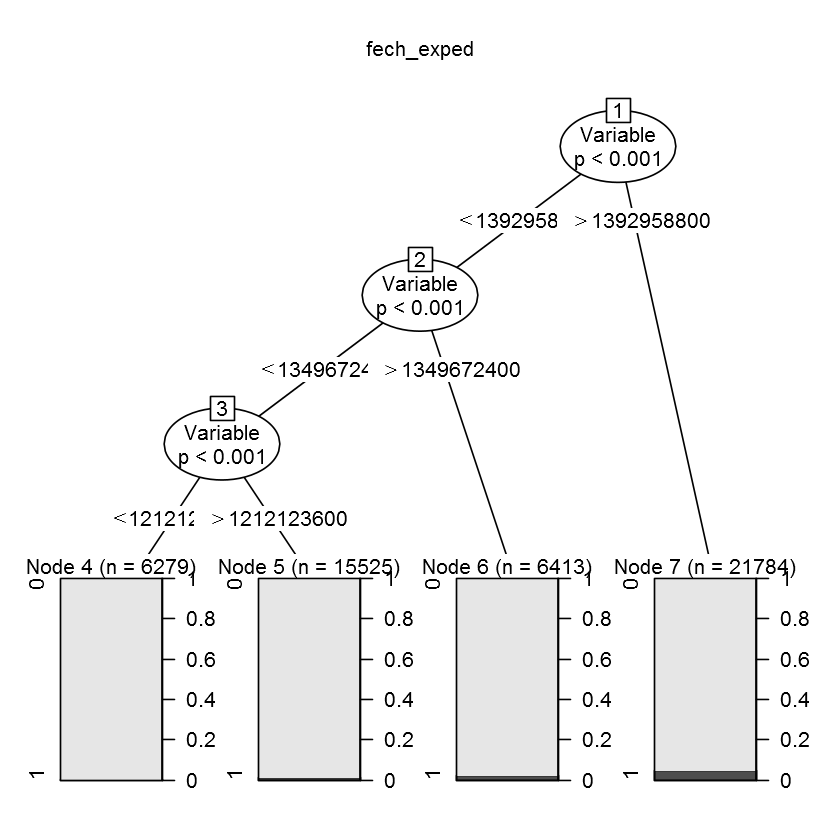

[1] disp_avan
35 Levels: bono_lonchera cancelacion cat_afil cons_ms_nt ... val_mora

	Welch Two Sample t-test

data:  Variable by y_train
t = -3.1181, df = 1481.3, p-value = 0.001855
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -104914.86  -23887.64
sample estimates:
mean in group 0 mean in group 1 
       379160.9        443562.2 



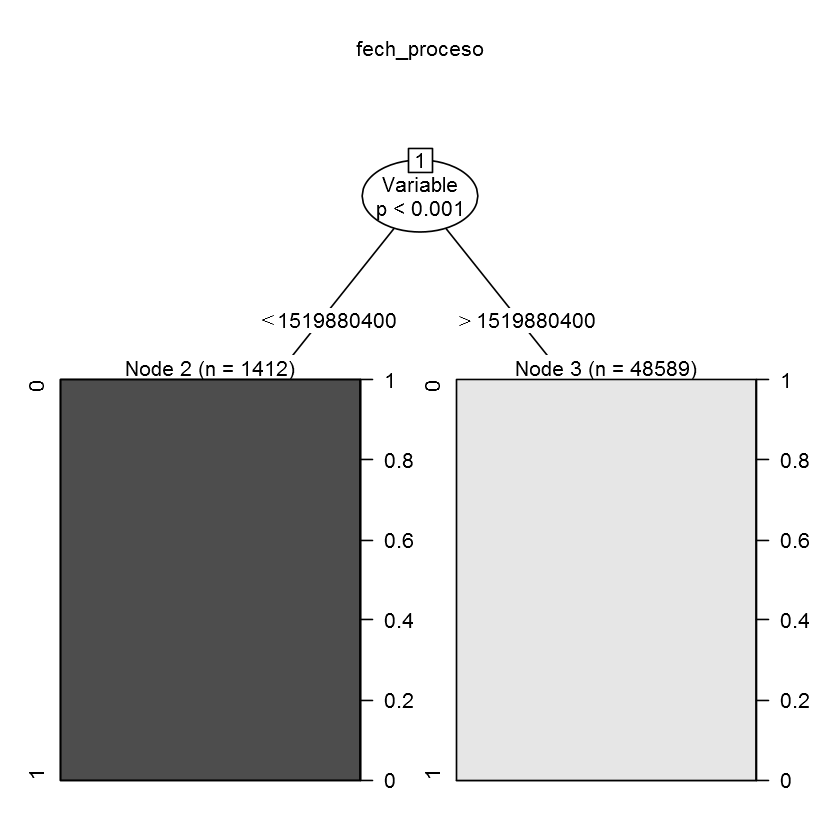

[1] lim_avances
35 Levels: bono_lonchera cancelacion cat_afil cons_ms_nt ... val_mora

	Welch Two Sample t-test

data:  Variable by y_train
t = -0.22847, df = 1486.6, p-value = 0.8193
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -45257.29  35814.52
sample estimates:
mean in group 0 mean in group 1 
       476224.4        480945.8 



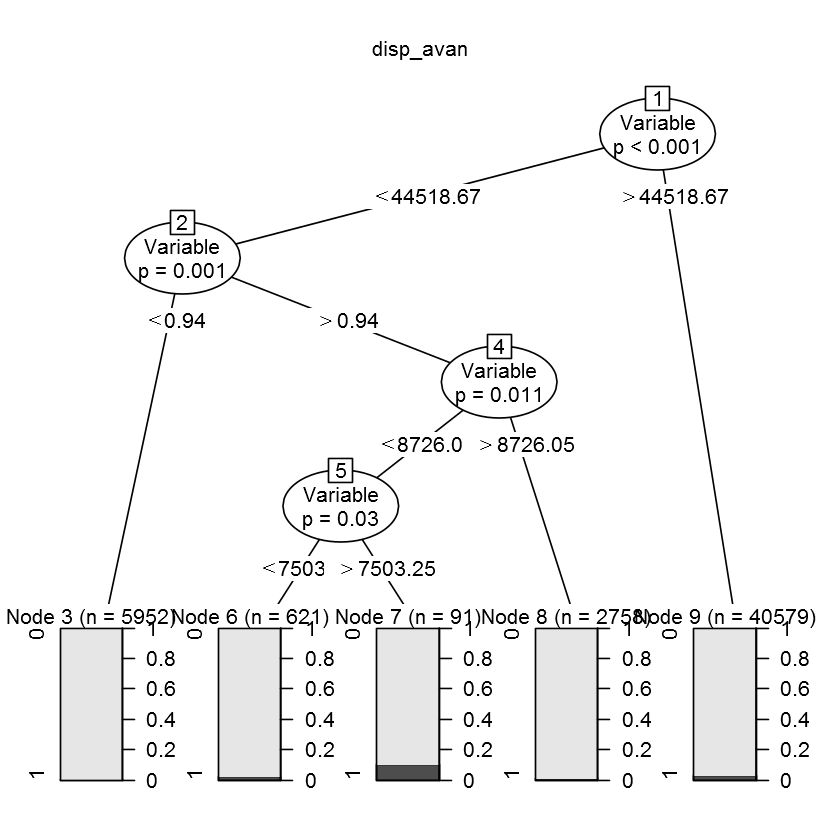

[1] tot_intereses
35 Levels: bono_lonchera cancelacion cat_afil cons_ms_nt ... val_mora

	Welch Two Sample t-test

data:  Variable by y_train
t = 44.756, df = 35395, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 24129.97 26340.26
sample estimates:
mean in group 0 mean in group 1 
      27349.911        2114.796 



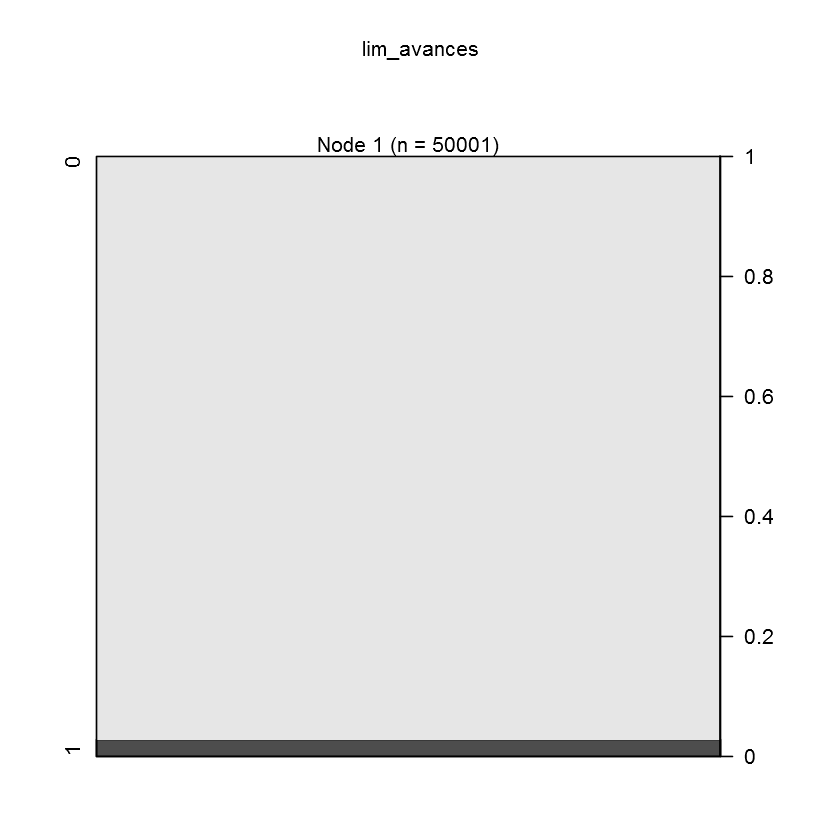

[1] sald_ms_nt
35 Levels: bono_lonchera cancelacion cat_afil cons_ms_nt ... val_mora

	Welch Two Sample t-test

data:  Variable by y_train
t = 20.956, df = 1751.1, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 194780.2 235005.7
sample estimates:
mean in group 0 mean in group 1 
       347676.8        132783.9 



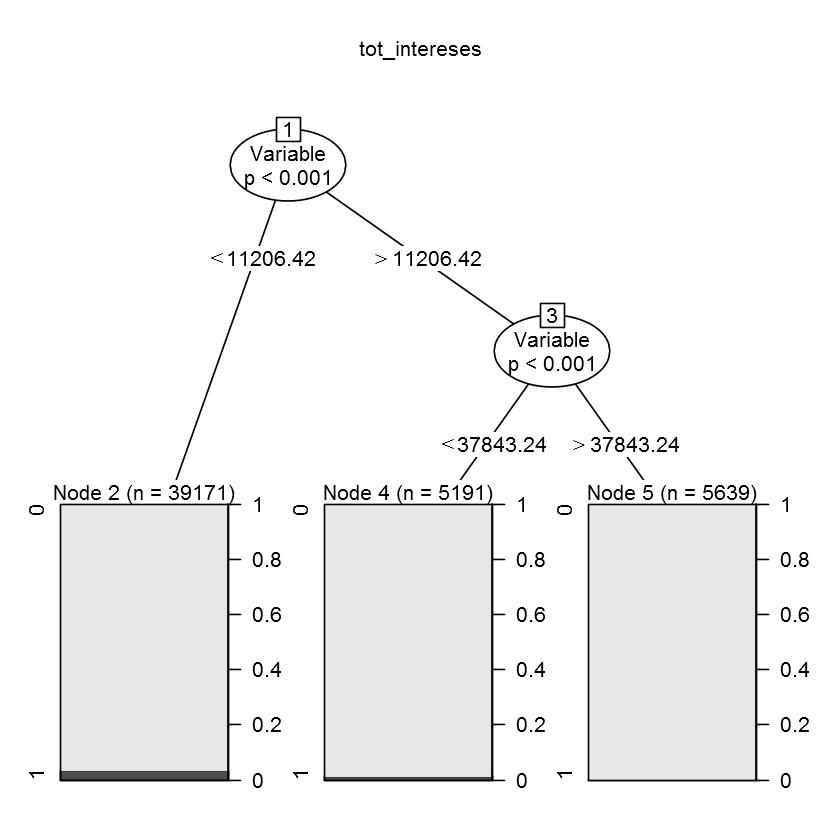

[1] pg_ms_nt
35 Levels: bono_lonchera cancelacion cat_afil cons_ms_nt ... val_mora

	Welch Two Sample t-test

data:  Variable by y_train
t = -4.8538, df = 1465.1, p-value = 1.341e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -44080.76 -18706.34
sample estimates:
mean in group 0 mean in group 1 
       39095.90        70489.45 



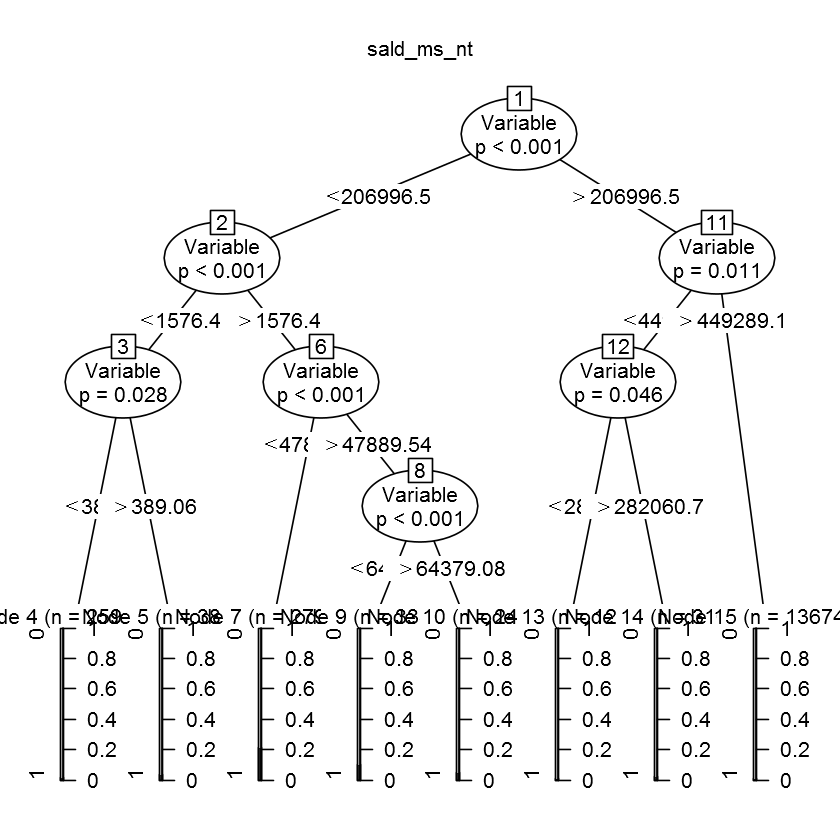

[1] cons_ms_nt
35 Levels: bono_lonchera cancelacion cat_afil cons_ms_nt ... val_mora

	Welch Two Sample t-test

data:  Variable by y_train
t = 0.80913, df = 1526.7, p-value = 0.4186
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4856.329 11675.914
sample estimates:
mean in group 0 mean in group 1 
       27056.15        23646.35 



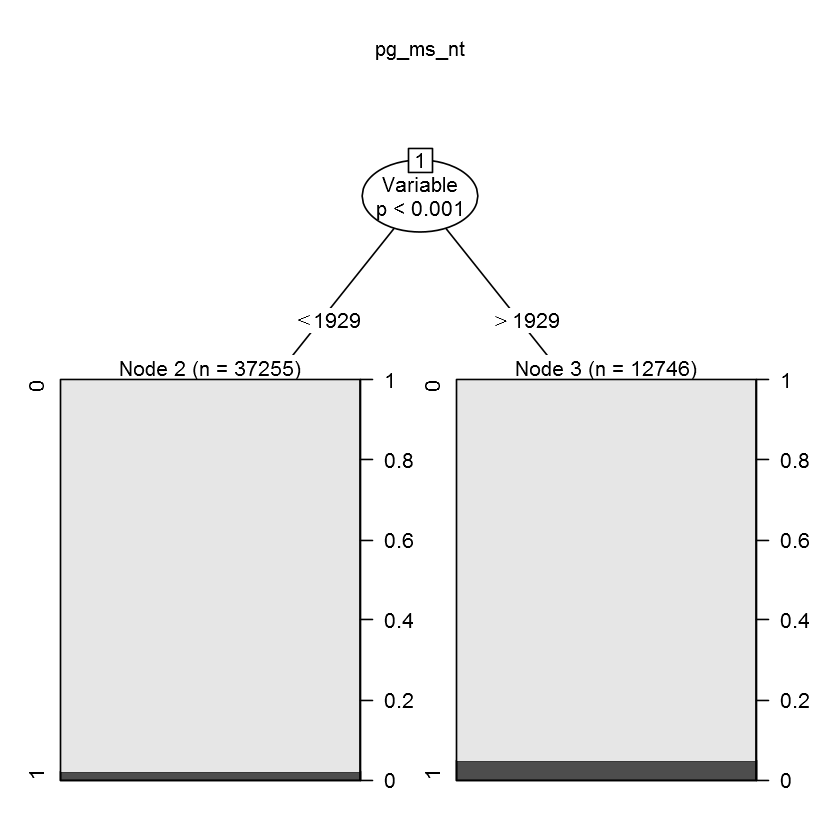

[1] dias_mora
35 Levels: bono_lonchera cancelacion cat_afil cons_ms_nt ... val_mora

	Welch Two Sample t-test

data:  Variable by y_train
t = 47.723, df = 49618, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 87.01263 94.46603
sample estimates:
mean in group 0 mean in group 1 
      92.885221        2.145892 



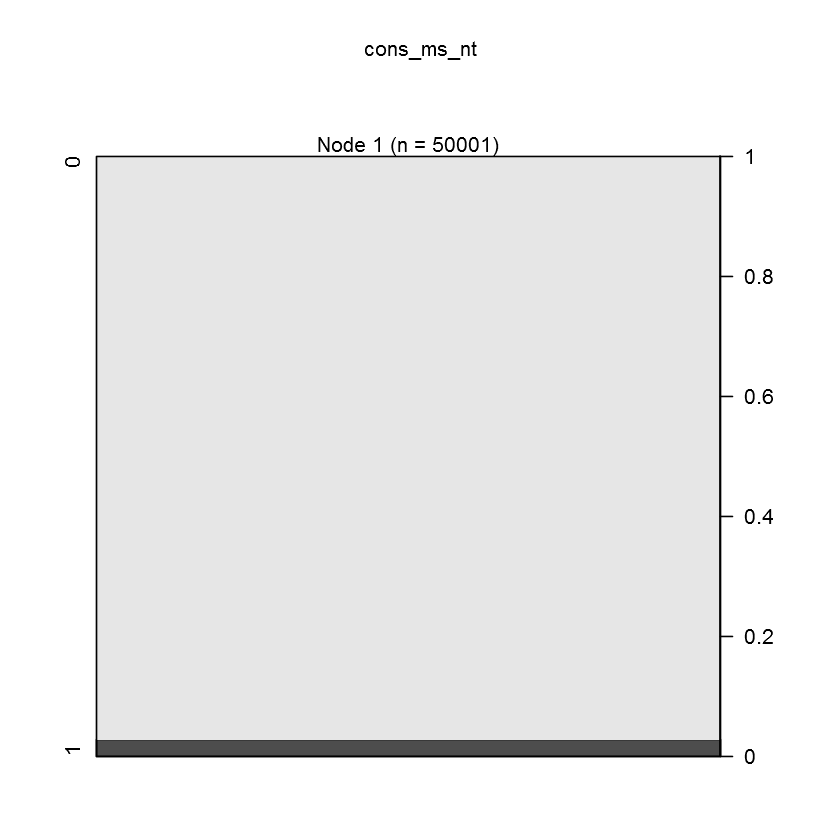

[1] cup_lim
35 Levels: bono_lonchera cancelacion cat_afil cons_ms_nt ... val_mora

	Welch Two Sample t-test

data:  Variable by y_train
t = 1.0399, df = 3149.5, p-value = 0.2985
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -47555.91 154959.47
sample estimates:
mean in group 0 mean in group 1 
        1267120         1213419 



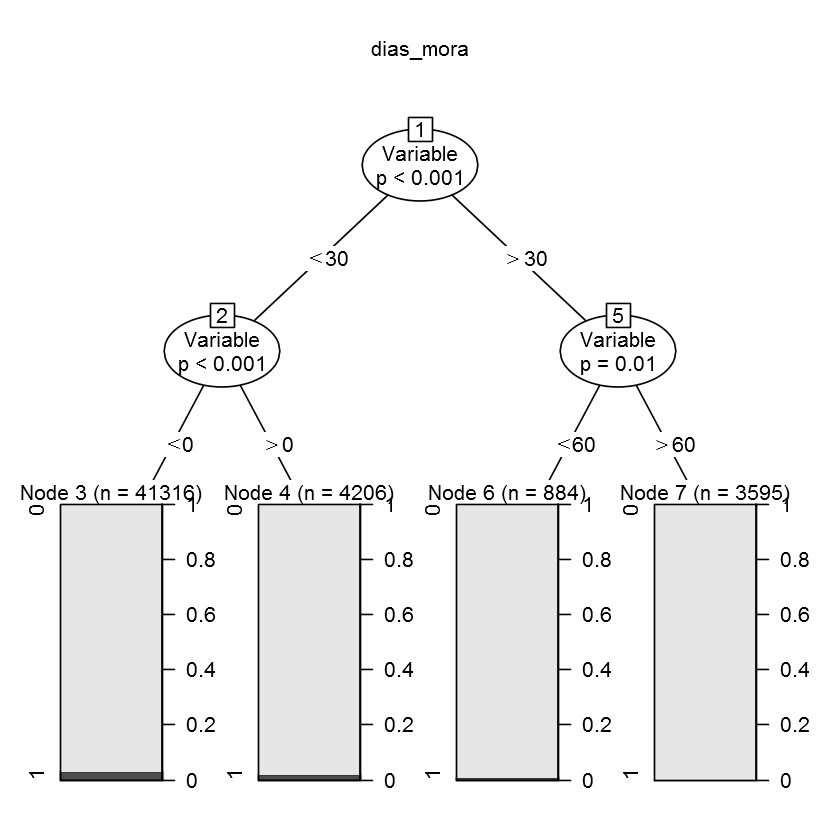

[1] pag_ms_nt
35 Levels: bono_lonchera cancelacion cat_afil cons_ms_nt ... val_mora

	Welch Two Sample t-test

data:  Variable by y_train
t = -3.9996, df = 1452.6, p-value = 6.665e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -29300.99 -10017.21
sample estimates:
mean in group 0 mean in group 1 
       12687.88        32346.98 



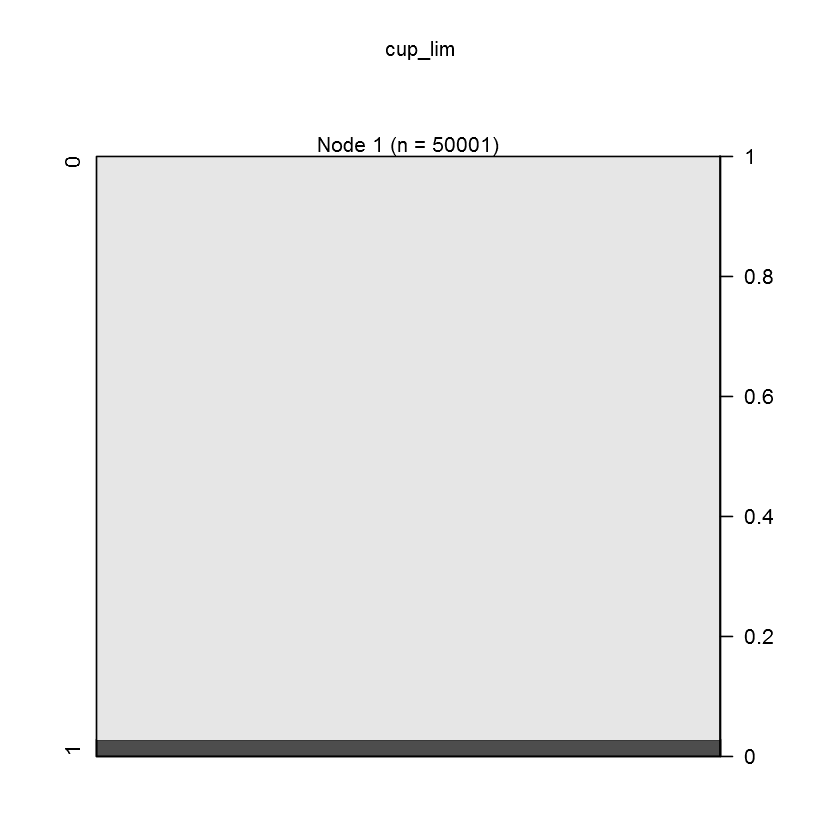

[1] pag_min
35 Levels: bono_lonchera cancelacion cat_afil cons_ms_nt ... val_mora

	Welch Two Sample t-test

data:  Variable by y_train
t = 46.737, df = 10812, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 106185.3 115482.2
sample estimates:
mean in group 0 mean in group 1 
      129904.38        19070.63 



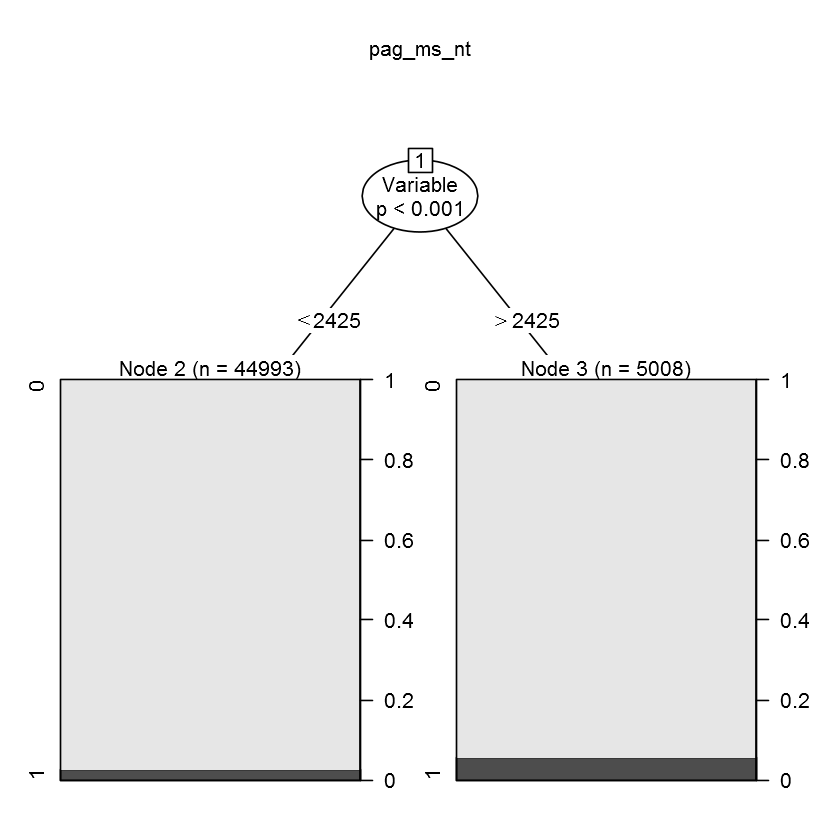

[1] val_mora
35 Levels: bono_lonchera cancelacion cat_afil cons_ms_nt ... val_mora

	Welch Two Sample t-test

data:  Variable by y_train
t = 37.396, df = 39007, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 31231.46 34686.38
sample estimates:
mean in group 0 mean in group 1 
      34051.800        1092.879 



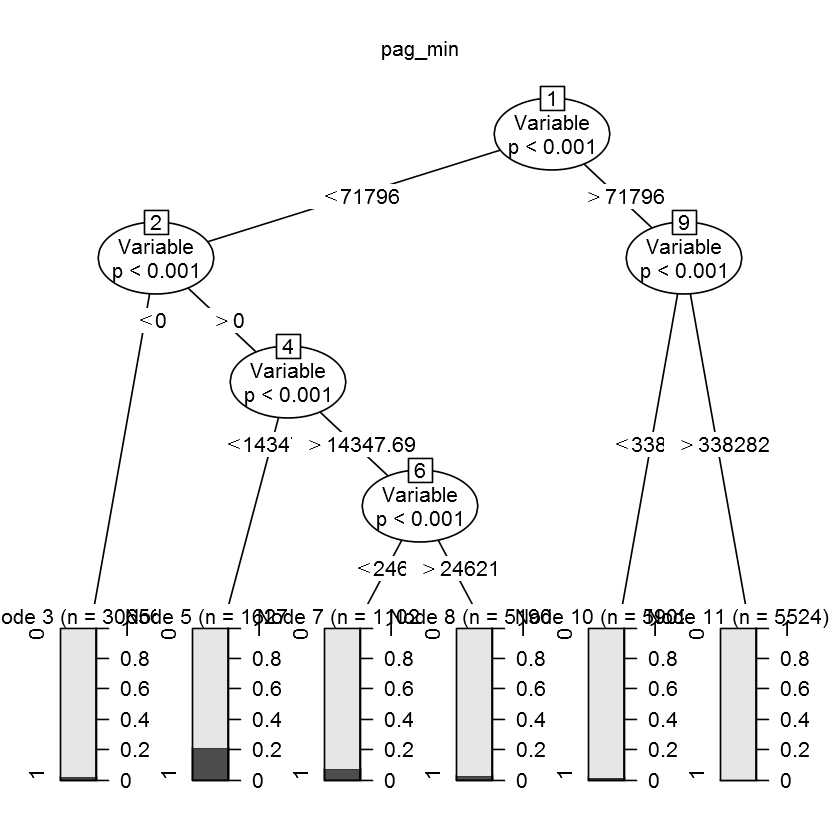

[1] val_cuot_man
35 Levels: bono_lonchera cancelacion cat_afil cons_ms_nt ... val_mora

	Welch Two Sample t-test

data:  Variable by y_train
t = 22.485, df = 2185.3, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 8234.184 9807.762
sample estimates:
mean in group 0 mean in group 1 
      14092.048        5071.075 



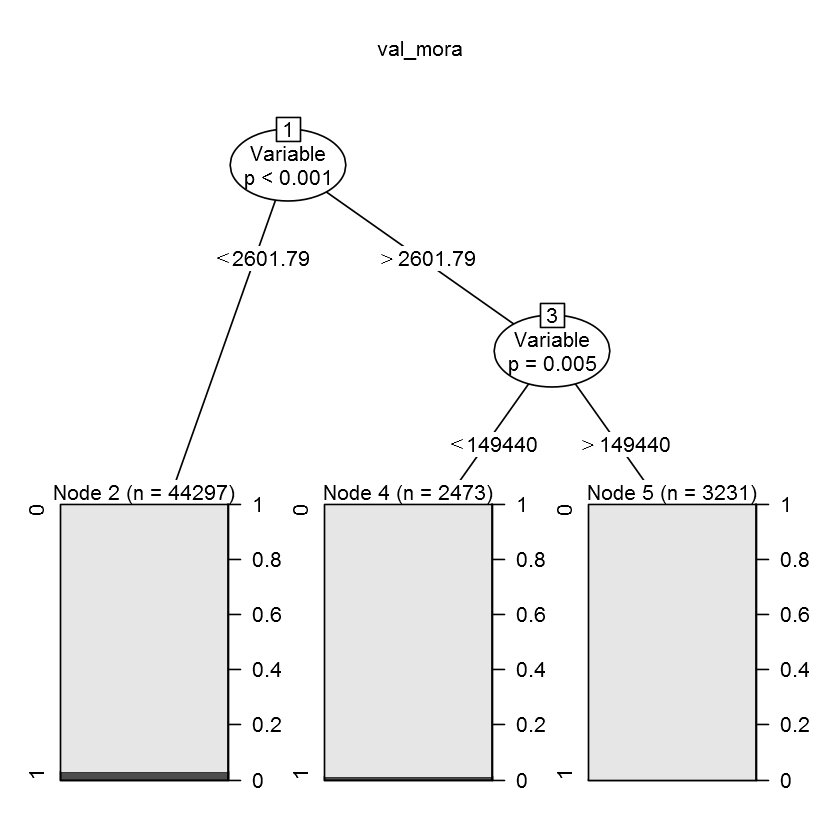

[1] sald_disp
35 Levels: bono_lonchera cancelacion cat_afil cons_ms_nt ... val_mora

	Welch Two Sample t-test

data:  Variable by y_train
t = 26.101, df = 1844.6, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 222678.5 258861.9
sample estimates:
mean in group 0 mean in group 1 
       347677.5        106907.4 



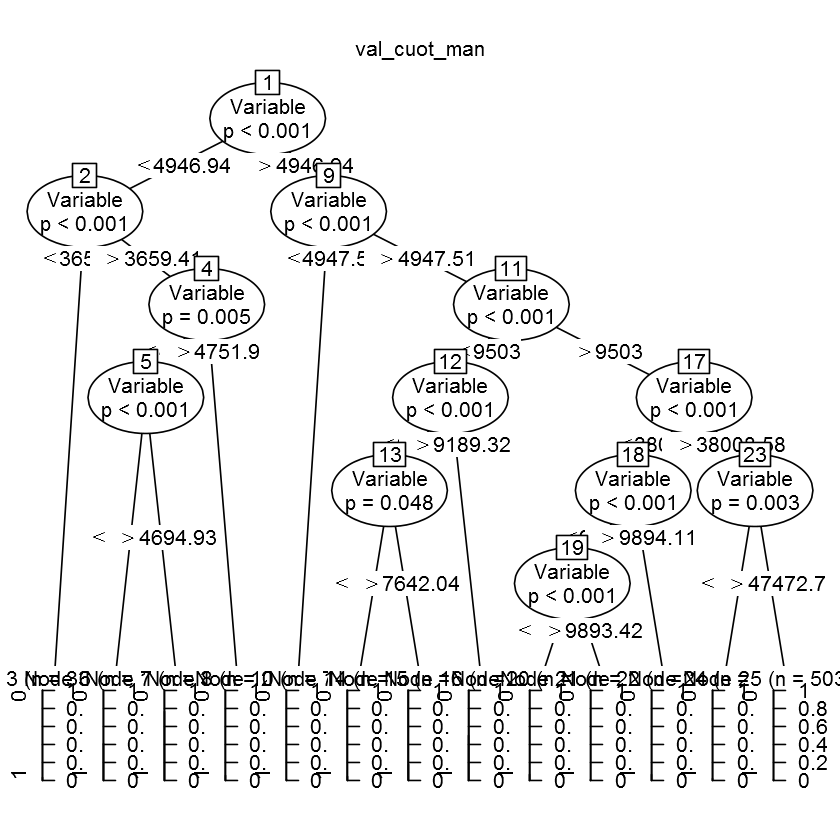

[1] edad
35 Levels: bono_lonchera cancelacion cat_afil cons_ms_nt ... val_mora

	Welch Two Sample t-test

data:  Variable by y_train
t = -0.087669, df = 1490.7, p-value = 0.9302
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.7827412  0.7157674
sample estimates:
mean in group 0 mean in group 1 
       41.45377        41.48725 



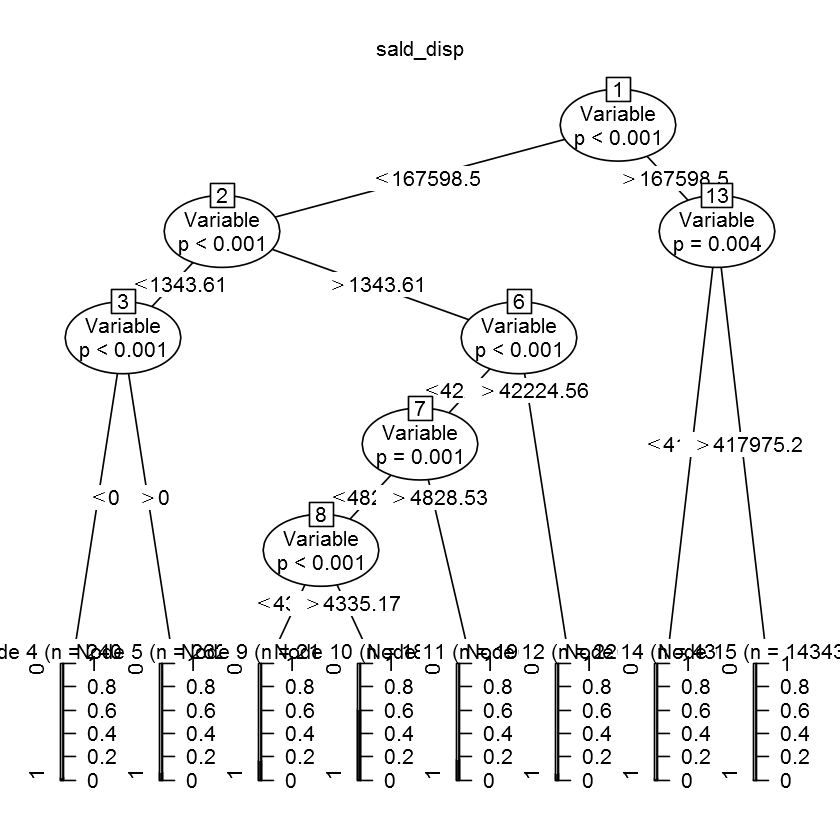

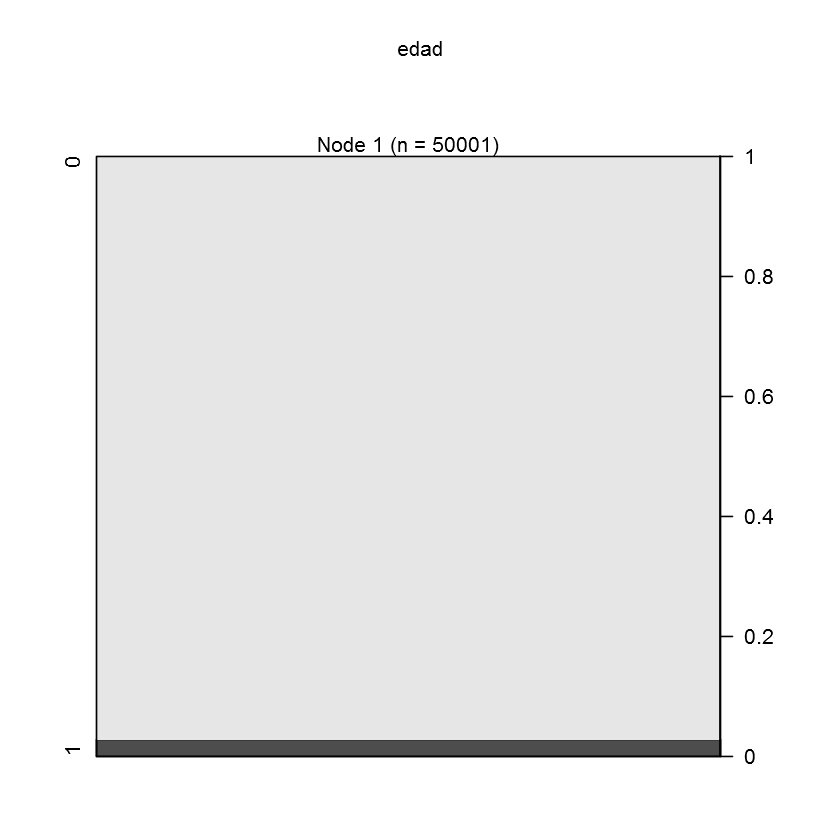

In [93]:
data=X_train
nm <- names(X_train)

for (i in seq_along(nm)) {
        if (!X_dic_dat$dat_type[i]=="factor"){
            print(X_dic_dat$nm_var[i])
            Xy_data=data.frame(as.numeric(data[,i]),y_train)
            colnames(Xy_data)=c("Variable","y_train")
            t_test_vars=t.test(Variable~y_train, Xy_data)
            print(t_test_vars)
            tree_dat=ctree(y_train ~ Variable, data=Xy_data)
            plot(tree_dat, main=nm[i])
            }
    }

In [96]:
(X_train$fech_exped[1:10])

 [1] "2006-11-04 COT" "2007-08-17 COT" "2008-05-08 COT" "2006-12-21 COT"
 [5] "2007-09-13 COT" "2006-11-25 COT" "2007-09-14 COT" "2007-09-21 COT"
 [9] "2006-11-11 COT" "2006-12-14 COT"

In [98]:
tst_dt=as.numeric(X_train$fech_exped[1:10])
tst_dt

[1] 1162616400 1187326800 1210222800 1166677200 1189659600 1164430800
 [7] 1189746000 1190350800 1163221200 1166072400

# ****************************
# ****************************
# TESTCODE
# ****************************
# ****************************

# 2 Pruebas de Variables
## Calculo de entropia e info_gain

,Variable,y_train
1,1522558800,0
2,1522558800,0
3,1522558800,0
4,1522558800,0
5,1522558800,0
6,1522558800,0


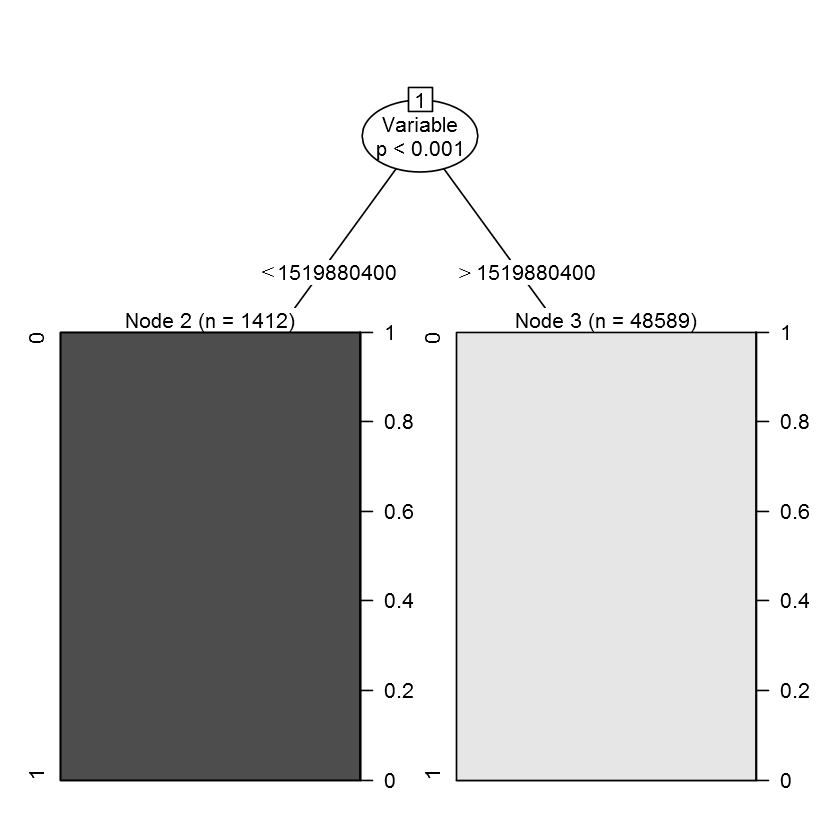

In [164]:
i=2
Xy_data=data.frame(as.numeric(X_train[,i]),y_train)
colnames(Xy_data)=c("Variable","y_train")
nm <- names(data)
head(Xy_data)

tree_dat=ctree(y_train ~ Variable, data=Xy_data)
plot(tree_dat)

In [192]:
(tree_dat)
as.POSIXct(1519880400, origin = "1970-01-01")


	 Conditional inference tree with 2 terminal nodes

Response:  y_train 
Input:  Variable 
Number of observations:  50001 

1) Variable <= 1519880400; criterion = 1, statistic = 39312.229
  2)*  weights = 1412 
1) Variable > 1519880400
  3)*  weights = 48589 

[1] "2018-03-01 COT"

### Conclusión:
Según el arbol de decisión, las cancelaciones se realizaron antes del primero de marzo de 2018

In [204]:
table(y_train,X_train$fech_proceso<"2018-03-01 COT")

       
y_train FALSE  TRUE
      0 48589     0
      1    77  1335

In [190]:
as.numeric(strptime("01/01/1970", "%d/%m/%Y"))
as.numeric(strptime("23/01/2018", "%d/%m/%Y"))
as.POSIXct(as.numeric(strptime("23/01/2018", "%d/%m/%Y")), origin="1970-01-01")
# as.numeric(as.Date("1970-01-01"))

[1] 18000

[1] 1516683600

[1] "2018-01-23 COT"

In [56]:
entropy_y= function(y_values){
    frecs=prop.table(table(y_values))
    p_val=frecs["1"]+1e-16# este decimal pequeño es para corregir el error logaritmo cero, da NAN y no deja avanzar
    q_val=frecs["0"]+1e-16# este decimal pequeño es para corregir el error logaritmo cero, da NAN y no deja avanzar
    return (as.numeric(-(q_val*log2(q_val))-(p_val*log2(p_val))))}

entropy_xy=function(true_condition,reactivo){ #La formula actualizada para calcular más de dos valores
    df_dat=data.frame("true_condition"=true_condition,"reactivo"=reactivo)
    df_dat=df_dat[rowSums(!is.na(df_dat))==2,]
    entr_xy=0
    for (val in unique(df_dat$reactivo)){
        entr_y=entropy_y(df_dat[df_dat$reactivo==val,"true_condition"])
        p_val=sum(df_dat$reactivo==val)/length(df_dat$reactivo)
        entr_xy=(entr_y*p_val)+entr_xy
    }
    return (entr_xy)
}    
info_gain=function(true_condition,reactivo){entropy_y(true_condition)-entropy_xy(true_condition,reactivo)}

In [36]:
prop.table(proporciones)

,Segemnto_Basico,Segmento_Alto,Segmento_Joven,Segmento_Medio,
0,0.1131575,0.00500,0.015965,0.1088175,0.24294
1,0.0033600,0.00017,0.000465,0.0030650,0.00706
,0.1165175,0.00517,0.016430,0.1118825,0.25000


[1] edad
35 Levels: bono_lonchera cancelacion cat_afil cons_ms_nt ... val_mora
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   30.00   41.00   41.45   53.00   65.00 
[1] "Desviación estándar 13.8688829347184"


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


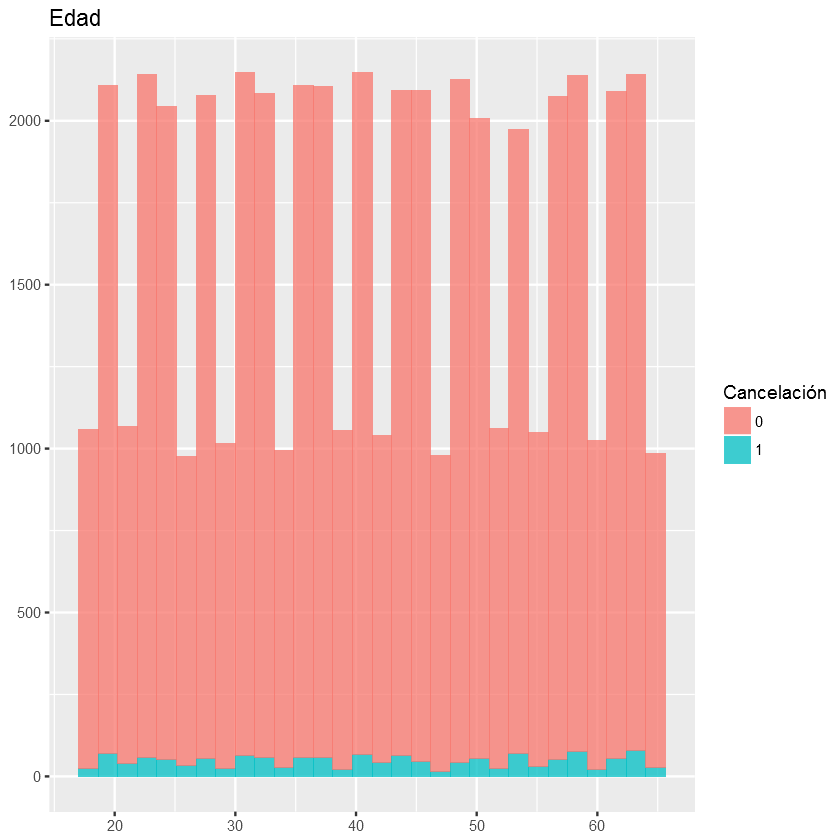

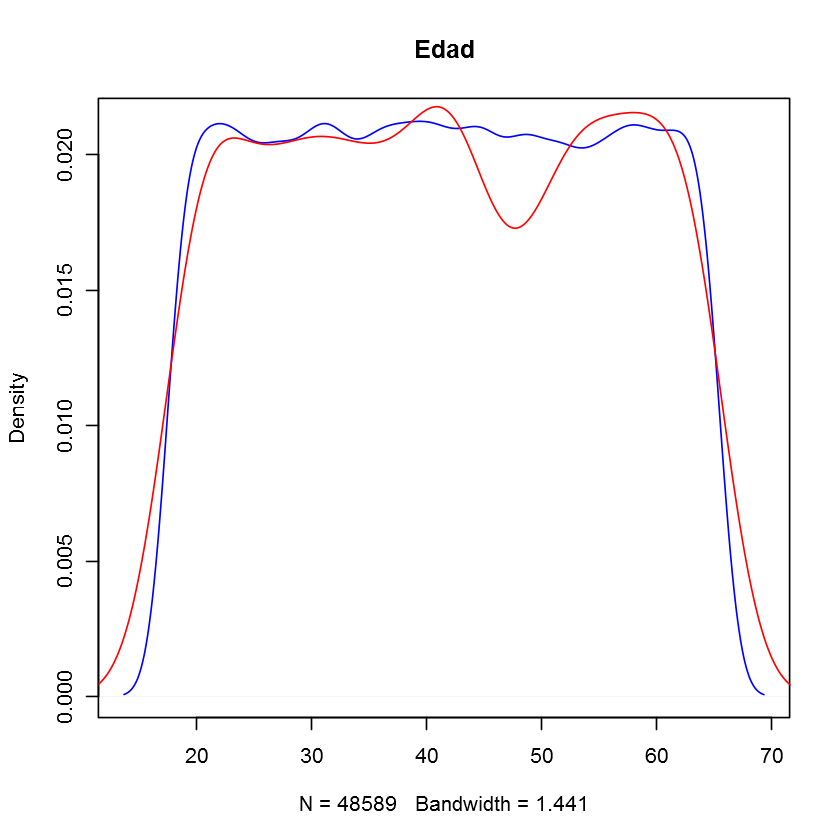

In [64]:
i=21
data=X_train
nm <- names(X_train)

data[,i]=as.numeric(data[,i])
            print(X_dic_dat$nm_var[i])
            print (summary(data[,i]))
            print (paste("Desviación estándar",sd(data[,i],na.rm=T)))
            print(
                ggplot(data,aes_string(x = nm[i]))+
                  geom_histogram(alpha = .75,aes(fill = y_train))+
                  guides(fill=guide_legend(title="Cancelación"))+
                  theme(axis.title.x=element_blank())+
                  theme(axis.title.y=element_blank())+
                  #coord_flip()+
                  labs(title=X_dic_dat$text_var[i])#, subtitle=estruct$Escala[i])
                )
            plot(density(as.numeric(data[,i])[y_train==0]), col="blue", main=X_dic_dat$text_var[i])
            lines(density(as.numeric(data[,i])[y_train==1]), col="red")


In [156]:
i=21

Xy_data=data.frame(X_train,y_train)
data=Xy_data
#data=X_train
nm <- names(X_train)

#             print(
#                 ggplot(data,aes_string(x = nm[i], y=y_train, shape=y_train, color=y_train))+
#                 geom_point()+
#                 scale_fill_brewer(palette="Set2")+
#                 theme(legend.title=element_blank())+
#                 theme(axis.title.x=element_blank())+
#                 theme(axis.title.y=element_blank())+
#                 scale_x_continuous(trans='log10') +
#                 #coord_flip()+
#                 labs(title=X_dic_dat$text_var[i])#, subtitle=estruct$Escala[i])
#                 )


# print(
#     ggplot(data, aes_string(sample = nm[i], shape=y_train, color=y_train))+
#     stat_qq()+
#     scale_fill_brewer(palette="Set2")+
#     theme(legend.title=element_blank())+
#     theme(axis.title.x=element_blank())+
#     theme(axis.title.y=element_blank())
#      )
norm_test=ks.test(data[,i], "pnorm", mean(data[,i]),sd(data[,i]))
norm_test

Warning message:
In ks.test(data[, i], "pnorm", mean(data[, i]), sd(data[, i])): ties should not be present for the Kolmogorov-Smirnov test


	One-sample Kolmogorov-Smirnov test

data:  data[, i]
D = 0.067233, p-value < 2.2e-16
alternative hypothesis: two-sided


package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Alexis\AppData\Local\Temp\RtmpMNDpIa\downloaded_packages


Warning message:
: package 'corrplot' was built under R version 3.3.3corrplot 0.84 loaded


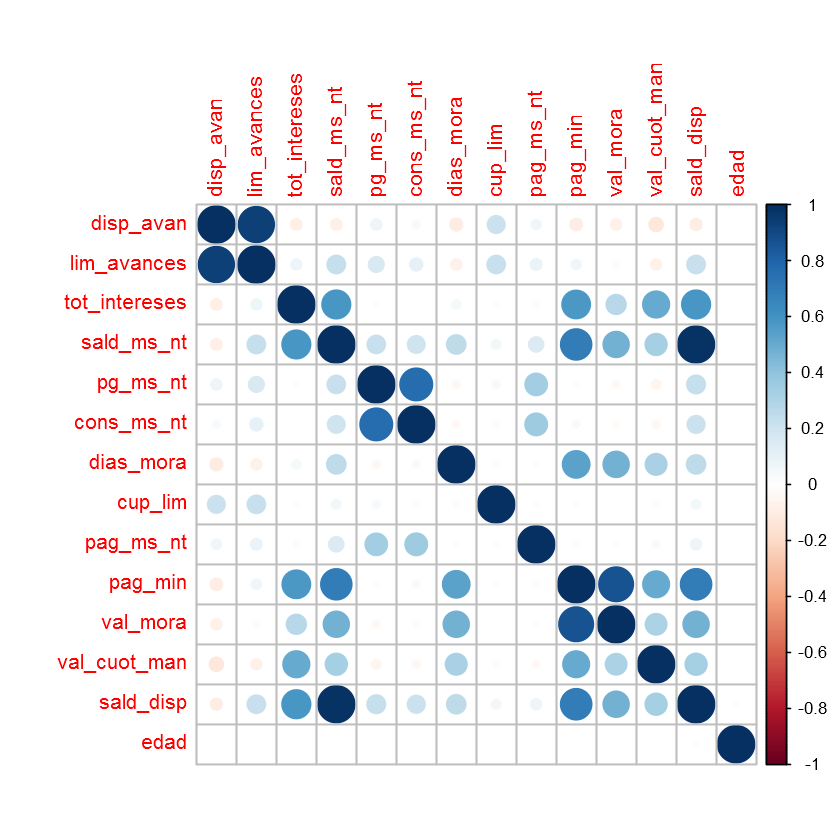

In [42]:
corrplot(cor(X_train[,X_dic_dat$dat_type=="num"]))

# TO-DO

- Pruebas de independencia para las variables
    - T para numéricas 
    - chisquare para categoricas

- balancear los casos por clase
- Comparativo algoritmos

- Preparar informe

